## D.</b></font> Compute performance metrics(for regression) for the given data 5_d.csv
<pre>    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [36]:
import numpy as np
from tqdm import tqdm
import seaborn as sns
df_a=np.loadtxt('5_a.csv',delimiter=',', dtype=str)
df_a=df_a[1:,:].astype('float64')
df_a=df_a[np.argsort(df_a[:,1])][::-1]
df_a#main Data

y_actual=df_a[:,0].copy()
y_proba=df_a[:,1].copy()
len(y_actual)
print(len(y_actual[y_actual==0]))

100


In [31]:
y_proba[y_proba>0.5]=1
y_proba[y_proba==0.5]=1


In [32]:
def confusion_matrix(y_actual,y_predicted):
    '''This function returns the confusion matrix
    '''
    TP=0
    FP=0
    TN=0
    FN=0
    for x in range(len(y_actual)):
        if y_actual[x]==1:
            if y_predicted[x]==1:
                TP+=1
            else:
                FN+=1
        if y_actual[x]==0:
            if y_predicted[x]==0:
                TN+=1
            else:
                FP+=1
    #print('TP={},FP={},TN={},FN={}'.format(TP,FP,TN,FN))
    return([TN,FN],[FP,TP])

X=confusion_matrix(y_actual,y_proba)
print(X)

([0, 0], [100, 10000])


In [21]:
import pdb

In [38]:

def array(sorted_array,prob_index,actual_y_index ):#pcolumn_name is a string with the name of the column with probabilities
    '''numpy code
    '''
    tpr_array=[]
    fpr_array=[]
    proba=sorted_array[:,prob_index]
    for p in tqdm(proba):
        y_actual=sorted_array[:,actual_y_index]
        y_predicted=proba.copy()
        y_predicted[y_predicted>p]=1
        y_predicted[y_predicted==p]=1
        y_predicted[y_predicted<p]=0
        cm=confusion_matrix(y_actual,y_predicted)
        TN,FN=cm[0]
        FP,TP=cm[1]
        TPR=TP/((TP+FN))
        FPR=FP/((TN +FP))
        tpr_array.append(TPR)
        fpr_array.append(FPR)
    return(tpr_array,fpr_array)

sorted_df=df_a.copy()
tpr,fpr=array(sorted_df,1,0)
AUC=np.trapz(tpr,fpr)

100%|████████████████████████████████████████████████████████████████████████████| 10100/10100 [02:09<00:00, 78.29it/s]


In [37]:
def array(sorted_array,prob_index,actual_y_index ):#pcolumn_name is a string with the name of the column with probabilities
    '''numpy code
    '''
    tpr_array=[]
    fpr_array=[]
    proba=sorted_array[:,prob_index]
    for p in tqdm(proba):
        y_actual=sorted_array[:,actual_y_index]
        y_predicted=proba.copy()
        y_predicted[y_predicted>p]=1
        y_predicted[y_predicted==p]=1
        y_predicted[y_predicted<p]=0
        cm=confusion_matrix(y_actual,y_predicted)
        TN,FN=cm[0]
        FP,TP=cm[1]
        print(TP,TN,FP,FN)

sorted_df=df_a.copy()
array(sorted_df,1,0)
#AUC=np.trapz(tpr,fpr)

  0%|                                                                                | 6/10100 [00:00<02:58, 56.64it/s]

1 100 0 9999
2 100 0 9998
3 100 0 9997
4 100 0 9996
5 100 0 9995
6 100 0 9994
7 100 0 9993
8 100 0 9992
9 100 0 9991
10 100 0 9990
11 100 0 9989
12 100 0 9988


  0%|▏                                                                              | 21/10100 [00:00<02:27, 68.19it/s]

13 100 0 9987
14 100 0 9986
15 100 0 9985
16 100 0 9984
17 100 0 9983
18 100 0 9982
19 100 0 9981
20 100 0 9980
21 100 0 9979
22 100 0 9978
23 100 0 9977
24 100 0 9976
25 100 0 9975
26 100 0 9974
27 100 0 9973


  0%|▎                                                                              | 37/10100 [00:00<02:16, 73.60it/s]

28 100 0 9972
29 100 0 9971
30 100 0 9970
31 100 0 9969
32 100 0 9968
33 100 0 9967
34 100 0 9966
35 100 0 9965
36 100 0 9964
37 100 0 9963
38 100 0 9962
39 100 0 9961
40 100 0 9960
41 100 0 9959
42 100 0 9958


  1%|▍                                                                              | 53/10100 [00:00<02:19, 72.23it/s]

43 100 0 9957
44 100 0 9956
45 100 0 9955
46 100 0 9954
47 100 0 9953
48 100 0 9952
49 100 0 9951
50 100 0 9950
51 100 0 9949
52 100 0 9948
53 100 0 9947
54 100 0 9946
55 100 0 9945
56 100 0 9944


  1%|▌                                                                              | 69/10100 [00:00<02:19, 71.90it/s]

57 100 0 9943
58 100 0 9942
59 100 0 9941
60 100 0 9940
61 100 0 9939
62 100 0 9938
63 100 0 9937
64 100 0 9936
65 100 0 9935
66 100 0 9934
67 100 0 9933
68 100 0 9932
69 100 0 9931
70

  1%|▌                                                                              | 77/10100 [00:01<02:31, 66.24it/s]

 100 0 9930
71 100 0 9929
72 100 0 9928
73 100 0 9927
74 100 0 9926
75 100 0 9925
76 100 0 9924
77 100 0 9923
78 100 0 9922
79 100 0 9921
80 100 0 9920
81 100 0 9919


  1%|▋                                                                              | 92/10100 [00:01<02:25, 68.62it/s]

82 100 0 9918
83 100 0 9917
84 100 0 9916
85 100 0 9915
86 100 0 9914
87 100 0 9913
88 100 0 9912
89 100 0 9911
90 100 0 9910
91 100 0 9909
92 100 0 9908
93 100 0 9907
94 100 0 9906
95 100 0 9905
96 100 0 

  1%|▊                                                                             | 107/10100 [00:01<02:20, 71.25it/s]

9904
97 100 0 9903
98 100 0 9902
99 100 0 9901
100 100 0 9900
101 100 0 9899
102 100 0 9898
103 100 0 9897
104 100 0 9896
105 100 0 9895
106 100 0 9894
107 100 0 9893
108 100 0 9892
109 100 0 9891
110 100

  1%|▉                                                                             | 123/10100 [00:01<02:15, 73.90it/s]

 0 9890
111 100 0 9889
112 100 0 9888
113 100 0 9887
114 100 0 9886
115 100 0 9885
116 100 0 9884
117 100 0 9883
118 100 0 9882
119 100 0 9881
120 100 0 9880
121 100 0 9879
122 100 0 9878
123 100 0 9877


  1%|█                                                                             | 131/10100 [00:01<02:15, 73.75it/s]

124 100 0 9876
125 100 0 9875
126 100 0 9874
127 100 0 9873
128 100 0 9872
129 100 0 9871
130 100 0 9870
131 100 0 9869
132 100 0 9868
133 100 0 9867
134 100 0 9866
135 100 0 9865
136 100 0 9864
137 100 0 9863
138 100 0 9862


  1%|█▏                                                                            | 147/10100 [00:02<02:25, 68.51it/s]

139 100 0 9861
140 100 0 9860
141 100 0 9859
142 100 0 9858
143 100 0 9857
144 100 0 9856
145 100 0 9855
146 100 0 9854
147 100 0 9853
148 100 0 9852
149 100 0 9851
150

  2%|█▏                                                                            | 161/10100 [00:02<02:34, 64.19it/s]

 100 0 9850
151 100 0 9849
152 100 0 9848
153 100 0 9847
154 100 0 9846
155 100 0 9845
156 100 0 9844
157 100 0 9843
158 100 0 9842
159 100 0 9841
160 100 0 9840
161 100 0 9839


  2%|█▎                                                                            | 169/10100 [00:02<02:28, 66.66it/s]

162 100 0 9838
163 100 0 9837
164 100 0 9836
165 100 0 9835
166 100 0 9834
167 100 0 9833
168 100 0 9832
169 100 0 9831
170 100 0 9830
171 100 0 9829
172 100 0 9828
172 99 1 9828
173 99 1 9827
174 99 1 9826
175 99 1 9825


  2%|█▍                                                                            | 185/10100 [00:02<02:21, 70.06it/s]

176 99 1 9824
177 99 1 9823
178 99 1 9822
179 99 1 9821
180 99 1 9820
181 99 1 9819
182 99 1 9818
183 99 1 9817
184 99 1 9816
185 99 1 9815
186 99 1 9814
187 99 1 9813
187 98 2 9813
188 98 2 9812
189 98 2 9811


  2%|█▌                                                                            | 201/10100 [00:02<02:16, 72.61it/s]

190 98 2 9810
191 98 2 9809
192 98 2 9808
193 98 2 9807
194 98 2 9806
195 98 2 9805
196 98 2 9804
197 98 2 9803
198 98 2 9802
199 98 2 9801
200 98 2 9800
201 98 2 9799
202 98 2 9798
203 98 2 9797
204 98 2 9796


  2%|█▋                                                                            | 217/10100 [00:03<02:13, 74.14it/s]

205 98 2 9795
206 98 2 9794
207 98 2 9793
208 98 2 9792
209 98 2 9791
210 98 2 9790
211 98 2 9789
212 98 2 9788
213 98 2 9787
214 98 2 9786
215 98 2 9785
216 98 2 9784
217 98 2 9783
218

  2%|█▊                                                                            | 233/10100 [00:03<02:11, 74.82it/s]

 98 2 9782
219 98 2 9781
220 98 2 9780
221 98 2 9779
222 98 2 9778
223 98 2 9777
224 98 2 9776
225 98 2 9775
226 98 2 9774
227 98 2 9773
228 98 2 9772
229 98 2 9771
230 98 2 9770
231 98 2 9769
232 98

  2%|█▊                                                                            | 241/10100 [00:03<02:13, 73.98it/s]

 2 9768
233 98 2 9767
234 98 2 9766
235 98 2 9765
236 98 2 9764
237 98 2 9763
238 98 2 9762
239 98 2 9761
240 98 2 9760
241 98 2 9759
242 98 2 9758
243 98 2 9757
244 98 2 9756
245 98 2 9755
246 98 2 

  3%|█▉                                                                            | 257/10100 [00:03<02:12, 74.25it/s]

9754
247 98 2 9753
248 98 2 9752
249 98 2 9751
250 98 2 9750
251 98 2 9749
252 98 2 9748
253 98 2 9747
253 97 3 9747
254 97 3 9746
255 97 3 9745
256 97 3 9744
257 97 3 9743
258 97 3 9742
259 97 

  3%|██                                                                            | 273/10100 [00:03<02:11, 74.67it/s]

3 9741
260 97 3 9740
261 97 3 9739
262 97 3 9738
263 97 3 9737
264 97 3 9736
265 97 3 9735
266 97 3 9734
267 97 3 9733
268 97 3 9732
269 97 3 9731
270 97 3 9730
271 97 3 9729
272 97 3 9728
273 97 3 9727


  3%|██▏                                                                           | 289/10100 [00:04<02:09, 75.80it/s]

274 97 3 9726
275 97 3 9725
276 97 3 9724
277 97 3 9723
278 97 3 9722
279 97 3 9721
280 97 3 9720
281 97 3 9719
282 97 3 9718
283 97 3 9717
284 97 3 9716
285 97 3 9715
286 97 3 9714
287 97 3 9713
288 97 3 9712


  3%|██▎                                                                           | 305/10100 [00:04<02:09, 75.79it/s]

289 97 3 9711
290 97 3 9710
291 97 3 9709
292 97 3 9708
293 97 3 9707
294 97 3 9706
295 97 3 9705
296 97 3 9704
297 97 3 9703
298 97 3 9702
299 97 3 9701
300 97 3 9700
301 97 3 9699
302 97 3 9698


  3%|██▍                                                                           | 313/10100 [00:04<02:11, 74.64it/s]

303 97 3 9697
304 97 3 9696
305 97 3 9695
306 97 3 9694
307 97 3 9693
308 97 3 9692
309 97 3 9691
310 97 3 9690
311 97 3 9689
312 97 3 9688
313 97 3 9687
314 97 3 9686
315 97 3 9685
316 97 3 9684
317 97 3 9683


  3%|██▌                                                                           | 329/10100 [00:04<02:11, 74.52it/s]

318 97 3 9682
319 97 3 9681
320 97 3 9680
321 97 3 9679
322 97 3 9678
323 97 3 9677
324 97 3 9676
325 97 3 9675
326 97 3 9674
327 97 3 9673
328 97 3 9672
329 97 3 9671
330 97 3 9670
331 97 3 9669
332 97 3 9668


  3%|██▋                                                                           | 345/10100 [00:04<02:09, 75.44it/s]

333 97 3 9667
334 97 3 9666
335 97 3 9665
336 97 3 9664
337 97 3 9663
338 97 3 9662
339 97 3 9661
340 97 3 9660
341 97 3 9659
342 97 3 9658
343 97 3 9657
344 97 3 9656
345 97 3 9655
346 97 3 9654


  4%|██▊                                                                           | 361/10100 [00:05<02:07, 76.41it/s]

347 97 3 9653
348 97 3 9652
349 97 3 9651
350 97 3 9650
351 97 3 9649
352 97 3 9648
353 97 3 9647
354 97 3 9646
354 96 4 9646
355 96 4 9645
356 96 4 9644
357 96 4 9643
358 96 4 9642
359 96 4 9641
360 96 4 9640
361 96 4 

  4%|██▉                                                                           | 377/10100 [00:05<02:07, 76.27it/s]

9639
362 96 4 9638
363 96 4 9637
364 96 4 9636
365 96 4 9635
366 96 4 9634
367 96 4 9633
368 96 4 9632
369 96 4 9631
370 96 4 9630
371 96 4 9629
372 96 4 9628
373 96 4 9627
374 96 4 9626
375 96 4

  4%|██▉                                                                           | 385/10100 [00:05<02:08, 75.61it/s]

 9625
376 96 4 9624
377 96 4 9623
378 96 4 9622
379 96 4 9621
380 96 4 9620
381 96 4 9619
382 96 4 9618
383 96 4 9617
384 96 4 9616
385 96 4 9615
386 96 4 9614
387 96 4 9613
388 96 4 9612
389 96 4

  4%|███                                                                           | 401/10100 [00:05<02:09, 74.74it/s]

 9611
390 96 4 9610
391 96 4 9609
392 96 4 9608
393 96 4 9607
394 96 4 9606
395 96 4 9605
396 96 4 9604
397 96 4 9603
398 96 4 9602
399 96 4 9601
400 96 4 9600
401 96 4 9599
402 96 4 9598
403 96 4 9597


  4%|███▏                                                                          | 417/10100 [00:05<02:08, 75.26it/s]

404 96 4 9596
405 96 4 9595
406 96 4 9594
407 96 4 9593
408 96 4 9592
409 96 4 9591
410 96 4 9590
411 96 4 9589
412 96 4 9588
413 96 4 9587
414 96 4 9586
415 96 4 9585
416 96 4 9584
417 96 4 9583
418 96 4 9582


  4%|███▎                                                                          | 433/10100 [00:05<02:08, 75.46it/s]

419 96 4 9581
420 96 4 9580
421 96 4 9579
422 96 4 9578
423 96 4 9577
424 96 4 9576
425 96 4 9575
426 96 4 9574
427 96 4 9573
428 96 4 9572
429 96 4 9571
430 96 4 9570
431 96 4 9569
432 96 4 9568
433 96 4 9567


  4%|███▍                                                                          | 449/10100 [00:06<02:08, 74.98it/s]

434 96 4 9566
435 96 4 9565
436 96 4 9564
437 96 4 9563
438 96 4 9562
439 96 4 9561
440 96 4 9560
441 96 4 9559
442 96 4 9558
442 95 5 9558
443 95 5 9557
444 95 5 9556
445 95 5 9555
446 95 5 9554
447 95 5 9553


  5%|███▌                                                                          | 465/10100 [00:06<02:07, 75.29it/s]

448 95 5 9552
449 95 5 9551
450 95 5 9550
451 95 5 9549
452 95 5 9548
453 95 5 9547
454 95 5 9546
455 95 5 9545
456 95 5 9544
457 95 5 9543
458 95 5 9542
459 95 5 9541
460 95 5 9540
461 95 5 9539
462 95 5 9538
463 95 5 9537


  5%|███▋                                                                          | 481/10100 [00:06<02:06, 75.90it/s]

464 95 5 9536
465 95 5 9535
466 95 5 9534
467 95 5 9533
468 95 5 9532
468 94 6 9532
469 94 6 9531
470 94 6 9530
471 94 6 9529
472 94 6 9528
473 94 6 9527
474 94 6 9526
475 94 6 9525
476 94 6 9524
477 94

  5%|███▊                                                                          | 497/10100 [00:06<02:08, 74.98it/s]

 6 9523
478 94 6 9522
479 94 6 9521
480 94 6 9520
481 94 6 9519
482 94 6 9518
483 94 6 9517
484 94 6 9516
485 94 6 9515
486 94 6 9514
487 94 6 9513
488 94 6 9512
489 94 6 9511
490 94 6 9510
491 94 6 9509


  5%|███▉                                                                          | 505/10100 [00:06<02:09, 73.89it/s]

492 94 6 9508
493 94 6 9507
494 94 6 9506
495 94 6 9505
496 94 6 9504
497 94 6 9503
498 94 6 9502
499 94 6 9501
499 93 7 9501
499 92 8 9501
500 92 8 9500
501 92 8 9499
502 92 8 9498
503 92 8 9497
504 92 8 9496


  5%|████                                                                          | 521/10100 [00:07<02:10, 73.17it/s]

505 92 8 9495
506 92 8 9494
507 92 8 9493
508 92 8 9492
509 92 8 9491
510 92 8 9490
511 92 8 9489
512 92 8 9488
513 92 8 9487
514 92 8 9486
515 92 8 9485
516 92 8 9484
517 92 8 9483
518 92 8 9482


  5%|████▏                                                                         | 537/10100 [00:07<02:13, 71.46it/s]

519 92 8 9481
520 92 8 9480
521 92 8 9479
522 92 8 9478
523 92 8 9477
524 92 8 9476
525 92 8 9475
526 92 8 9474
527 92 8 9473
528 92 8 9472
529 92 8 9471
530 92 8 9470
531 92 8 9469
532 92 8 9468


  5%|████▎                                                                         | 553/10100 [00:07<02:10, 73.25it/s]

533 92 8 9467
534 92 8 9466
535 92 8 9465
536 92 8 9464
537 92 8 9463
538 92 8 9462
539 92 8 9461
540 92 8 9460
541 92 8 9459
542 92 8 9458
543 92 8 9457
544 92 8 9456
545 92 8 9455
546 92 8 9454


  6%|████▎                                                                         | 561/10100 [00:07<02:11, 72.51it/s]

547 92 8 9453
548 92 8 9452
549 92 8 9451
550 92 8 9450
551 92 8 9449
552 92 8 9448
552 91 9 9448
553 91 9 9447
554 91 9 9446
555 91 9 9445
556 91 9 9444
557 91 9 9443
558 91 9 9442
559 91 9 9441
560 

  6%|████▍                                                                         | 577/10100 [00:07<02:14, 70.77it/s]

91 9 9440
561 91 9 9439
562 91 9 9438
563 91 9 9437
564 91 9 9436
565 91 9 9435
566 91 9 9434
567 91 9 9433
568 91 9 9432
569 91 9 9431
570 91 9 9430
571 91 9 9429
572 91 9 9428
573 91 9 9427


  6%|████▌                                                                         | 593/10100 [00:08<02:13, 71.05it/s]

574 91 9 9426
575 91 9 9425
576 91 9 9424
577 91 9 9423
578 91 9 9422
579 91 9 9421
580 91 9 9420
581 91 9 9419
582 91 9 9418
583 91 9 9417
584 91 9 9416
585 91 9 9415
586 91 9 9414
587 91 9 9413


  6%|████▋                                                                         | 609/10100 [00:08<02:15, 69.85it/s]

588 91 9 9412
589 91 9 9411
590 91 9 9410
591 91 9 9409
592 91 9 9408
593 91 9 9407
594 91 9 9406
595 91 9 9405
596 91 9 9404
597 91 9 9403
598 91 9 9402
599 91 9 9401
600 91 9 9400


  6%|████▊                                                                         | 624/10100 [00:08<02:14, 70.62it/s]

601 91 9 9399
602 91 9 9398
603 91 9 9397
604 91 9 9396
605 91 9 9395
606 91 9 9394
607 91 9 9393
608 91 9 9392
609 91 9 9391
610 91 9 9390
611 91 9 9389
612 91 9 9388
613 91 9 9387
614 91 9 9386
615 91 9 9385


  6%|████▉                                                                         | 632/10100 [00:08<02:14, 70.50it/s]

616 91 9 9384
617 91 9 9383
617 90 10 9383
618 90 10 9382
619 90 10 9381
620 90 10 9380
621 90 10 9379
622 90 10 9378
623 90 10 9377
624 90 10 9376
625 90 10 9375
626 90 10 9374
627 90 10 9373
628 

  6%|█████                                                                         | 648/10100 [00:08<02:11, 71.94it/s]

90 10 9372
629 90 10 9371
630 90 10 9370
631 90 10 9369
632 90 10 9368
633 90 10 9367
634 90 10 9366
635 90 10 9365
636 90 10 9364
637 90 10 9363
638 90 10 9362
639 90 10 9361
640 90 10 9360
641 90 10 9359
642 90 10 9358


  7%|█████▏                                                                        | 664/10100 [00:09<02:07, 73.85it/s]

643 90 10 9357
644 90 10 9356
645 90 10 9355
646 90 10 9354
647 90 10 9353
648 90 10 9352
649 90 10 9351
650 90 10 9350
651 90 10 9349
652 90 10 9348
653 90 10 9347
654 90 10 9346
655 90 10 9345
656 90 10 9344
657 90 10 9343


  7%|█████▎                                                                        | 680/10100 [00:09<02:05, 75.32it/s]

658 90 10 9342
659 90 10 9341
660 90 10 9340
661 90 10 9339
662 90 10 9338
663 90 10 9337
664 90 10 9336
665 90 10 9335
666 90 10 9334
667 90 10 9333
668 90 10 9332
669 90 10 9331
670 90 10 9330
671 90 10 9329
672 90 10

  7%|█████▍                                                                        | 696/10100 [00:09<02:05, 75.10it/s]

 9328
673 90 10 9327
674 90 10 9326
675 90 10 9325
676 90 10 9324
677 90 10 9323
678 90 10 9322
679 90 10 9321
680 90 10 9320
681 90 10 9319
682 90 10 9318
683 90 10 9317
684 90 10 9316
685 90 10 9315
686 90 10 9314
687

  7%|█████▍                                                                        | 704/10100 [00:09<02:08, 73.36it/s]

 90 10 9313
688 90 10 9312
688 89 11 9312
689 89 11 9311
690 89 11 9310
691 89 11 9309
692 89 11 9308
693 89 11 9307
694 89 11 9306
695 89 11 9305
696 89 11 9304
697 89 11 9303
698 89 11 9302
699 89 11 9301


  7%|█████▌                                                                        | 720/10100 [00:09<02:05, 74.76it/s]

700 89 11 9300
701 89 11 9299
702 89 11 9298
703 89 11 9297
704 89 11 9296
705 89 11 9295
706 89 11 9294
707 89 11 9293
708 89 11 9292
709 89 11 9291
710 89 11 9290
711 89 11 9289
712 89 11 9288
712 88 12 9288
713 88 12 9287
714 88 12 9286


  7%|█████▋                                                                        | 736/10100 [00:10<02:04, 75.29it/s]

715 88 12 9285
716 88 12 9284
717 88 12 9283
718 88 12 9282
719 88 12 9281
720 88 12 9280
721 88 12 9279
722 88 12 9278
723 88 12 9277
724 88 12 9276
725 88 12 9275
726 88 12 9274
727 88 12 9273
728 88 12 9272
729 88 

  7%|█████▊                                                                        | 752/10100 [00:10<02:06, 73.80it/s]

12 9271
730 88 12 9270
731 88 12 9269
732 88 12 9268
733 88 12 9267
734 88 12 9266
735 88 12 9265
736 88 12 9264
737 88 12 9263
738 88 12 9262
739 88 12 9261
740 88 12 9260
741 88 12 9259
742 88 12 9258
743 88 12 9257


  8%|█████▉                                                                        | 768/10100 [00:10<02:03, 75.27it/s]

744 88 12 9256
745 88 12 9255
746 88 12 9254
747 88 12 9253
748 88 12 9252
749 88 12 9251
750 88 12 9250
751 88 12 9249
752 88 12 9248
753 88 12 9247
754 88 12 9246
755 88 12 9245
756 88 12 9244
757 88 12 9243
758 88 12 9242
759 88 12 9241


  8%|██████                                                                        | 784/10100 [00:10<02:02, 76.32it/s]

760 88 12 9240
761 88 12 9239
762 88 12 9238
763 88 12 9237
764 88 12 9236
765 88 12 9235
766 88 12 9234
767 88 12 9233
768 88 12 9232
769 88 12 9231
770 88 12 9230
771 88 12 9229
772 88 12 9228
773 88 12 9227
774 88 12

  8%|██████▏                                                                       | 800/10100 [00:10<02:01, 76.29it/s]

 9226
775 88 12 9225
776 88 12 9224
777 88 12 9223
778 88 12 9222
779 88 12 9221
780 88 12 9220
781 88 12 9219
782 88 12 9218
783 88 12 9217
784 88 12 9216
785 88 12 9215
786 88 12 9214
787 88 12 9213
788 88 12 9212


  8%|██████▏                                                                       | 808/10100 [00:11<02:01, 76.49it/s]

789 88 12 9211
790 88 12 9210
791 88 12 9209
792 88 12 9208
793 88 12 9207
794 88 12 9206
795 88 12 9205
796 88 12 9204
797 88 12 9203
798 88 12 9202
799 88 12 9201
800 88 12 9200
801 88 12 9199
802 88 12 9198
803 88 12 9197


  8%|██████▎                                                                       | 824/10100 [00:11<02:02, 75.49it/s]

804 88 12 9196
805 88 12 9195
806 88 12 9194
807 88 12 9193
808 88 12 9192
809 88 12 9191
810 88 12 9190
811 88 12 9189
812 88 12 9188
813 88 12 9187
814 88 12 9186
815 88 12 9185
816 88 12 9184
817 88 12 9183
818 88 12 9182


  8%|██████▍                                                                       | 840/10100 [00:11<02:03, 75.04it/s]

819 88 12 9181
820 88 12 9180
821 88 12 9179
822 88 12 9178
823 88 12 9177
824 88 12 9176
825 88 12 9175
826 88 12 9174
827 88 12 9173
828 88 12 9172
829 88 12 9171
830 88 12 9170
831 88 12 9169
831 87 13 9169
832 87 13 9168


  8%|██████▌                                                                       | 856/10100 [00:11<02:02, 75.62it/s]

833 87 13 9167
834 87 13 9166
835 87 13 9165
836 87 13 9164
837 87 13 9163
838 87 13 9162
839 87 13 9161
840 87 13 9160
841 87 13 9159
842 87 13 9158
843 87 13 9157
844 87 13 9156
845 87 13 9155
846 87 13 9154
847 87 13 9153
848 87 13 9152


  9%|██████▋                                                                       | 872/10100 [00:11<02:01, 76.06it/s]

849 87 13 9151
850 87 13 9150
851 87 13 9149
852 87 13 9148
853 87 13 9147
854 87 13 9146
855 87 13 9145
856 87 13 9144
857 87 13 9143
858 87 13 9142
859 87 13 9141
860 87 13 9140
861 87 13 9139
862 87 13 9138
863 87 13 9137


  9%|██████▊                                                                       | 888/10100 [00:12<02:00, 76.43it/s]

864 87 13 9136
865 87 13 9135
866 87 13 9134
867 87 13 9133
868 87 13 9132
869 87 13 9131
870 87 13 9130
871 87 13 9129
872 87 13 9128
873 87 13 9127
874 87 13 9126
875 87 13 9125
876 87 13 9124
877 87 13 9123
878 87 13 9122
879 87 13 9121


  9%|██████▉                                                                       | 904/10100 [00:12<02:02, 75.25it/s]

880 87 13 9120
881 87 13 9119
882 87 13 9118
883 87 13 9117
884 87 13 9116
885 87 13 9115
886 87 13 9114
887 87 13 9113
888 87 13 9112
889 87 13 9111
890 87 13 9110
891 87 13 9109
892 87 13 9108
893 87 13 9107


  9%|███████                                                                       | 912/10100 [00:12<02:12, 69.09it/s]

894 87 13 9106
895 87 13 9105
896 87 13 9104
897 87 13 9103
898 87 13 9102
899 87 13 9101
900 87 13 9100
901 87 13 9099
902 87 13 9098
903 87 13 9097
904 87 13 9096
905 87 13 9095


  9%|███████▏                                                                      | 927/10100 [00:12<02:22, 64.52it/s]

906 87 13 9094
907 87 13 9093
908 87 13 9092
909 87 13 9091
910 87 13 9090
911 87 13 9089
912 87 13 9088
913 87 13 9087
914 87 13 9086
915 87 13 9085
916 87 13 9084
917 87 13 9083
918

  9%|███████▎                                                                      | 943/10100 [00:12<02:11, 69.41it/s]

 87 13 9082
919 87 13 9081
920 87 13 9080
921 87 13 9079
922 87 13 9078
923 87 13 9077
924 87 13 9076
925 87 13 9075
926 87 13 9074
927 87 13 9073
928 87 13 9072
929 87 13 9071
930 87 13 9070
931 87 13 9069
932 87 13 9068


  9%|███████▍                                                                      | 959/10100 [00:13<02:06, 72.54it/s]

933 87 13 9067
934 87 13 9066
935 87 13 9065
936 87 13 9064
937 87 13 9063
938 87 13 9062
939 87 13 9061
940 87 13 9060
941 87 13 9059
942 87 13 9058
943 87 13 9057
944 87 13 9056
945 87 13 9055
946 87 13 9054
947 87 13 9053


 10%|███████▌                                                                      | 975/10100 [00:13<02:03, 73.89it/s]

948 87 13 9052
949 87 13 9051
950 87 13 9050
951 87 13 9049
952 87 13 9048
953 87 13 9047
954 87 13 9046
955 87 13 9045
956 87 13 9044
957 87 13 9043
958 87 13 9042
959 87 13 9041
960 87 13 9040
961 87 13 9039
962 87 13 9038
963

 10%|███████▌                                                                      | 983/10100 [00:13<02:03, 73.69it/s]

 87 13 9037
964 87 13 9036
965 87 13 9035
966 87 13 9034
967 87 13 9033
968 87 13 9032
969 87 13 9031
970 87 13 9030
971 87 13 9029
972 87 13 9028
973 87 13 9027
974 87 13 9026
975 87 13 9025
976 87 13 9024
977 87 13 9023


 10%|███████▋                                                                      | 999/10100 [00:13<02:00, 75.67it/s]

978 87 13 9022
979 87 13 9021
980 87 13 9020
981 87 13 9019
982 87 13 9018
983 87 13 9017
984 87 13 9016
985 87 13 9015
986 87 13 9014
987 87 13 9013
988 87 13 9012
989 87 13 9011
990 87 13 9010
991 87 13 9009
992 87

 10%|███████▋                                                                     | 1015/10100 [00:13<01:58, 76.37it/s]

 13 9008
993 87 13 9007
994 87 13 9006
995 87 13 9005
996 87 13 9004
997 87 13 9003
998 87 13 9002
999 87 13 9001
1000 87 13 9000
1001 87 13 8999
1002 87 13 8998
1003 87 13 8997
1004 87 13 8996
1005 87 13 8995
1006 87 13 8994
1007 87 13

 10%|███████▊                                                                     | 1031/10100 [00:14<02:04, 72.62it/s]

 8993
1008 87 13 8992
1009 87 13 8991
1010 87 13 8990
1011 87 13 8989
1012 87 13 8988
1013 87 13 8987
1014 87 13 8986
1015 87 13 8985
1016 87 13 8984
1017 87 13 8983
1018 87 13 8982
1019 87 13 8981
1020 87 13 8980


 10%|███████▉                                                                     | 1047/10100 [00:14<02:04, 72.86it/s]

1021 87 13 8979
1022 87 13 8978
1023 87 13 8977
1024 87 13 8976
1025 87 13 8975
1026 87 13 8974
1027 87 13 8973
1028 87 13 8972
1029 87 13 8971
1030 87 13 8970
1031 87 13 8969
1032 87 13 8968
1033 87 13 8967
1034 87 13 8966


 10%|████████                                                                     | 1055/10100 [00:14<02:05, 72.24it/s]

1035 87 13 8965
1036 87 13 8964
1037 87 13 8963
1038 87 13 8962
1039 87 13 8961
1040 87 13 8960
1041 87 13 8959
1042 87 13 8958
1043 87 13 8957
1044 87 13 8956
1045 87 13 8955
1046 87 13 8954
1047 87 13 8953
1048 87 13 8952
1049 87 13 8951


 11%|████████▏                                                                    | 1071/10100 [00:14<02:02, 73.93it/s]

1050 87 13 8950
1051 87 13 8949
1052 87 13 8948
1053 87 13 8947
1054 87 13 8946
1055 87 13 8945
1056 87 13 8944
1057 87 13 8943
1058 87 13 8942
1059 87 13 8941
1060 87 13 8940
1061 87 13 8939
1062 87 13 8938
1063 87 13 8937
1064 87 13 8936
1065 87 13

 11%|████████▎                                                                    | 1088/10100 [00:14<01:59, 75.67it/s]

 8935
1066 87 13 8934
1067 87 13 8933
1068 87 13 8932
1069 87 13 8931
1070 87 13 8930
1071 87 13 8929
1072 87 13 8928
1073 87 13 8927
1074 87 13 8926
1075 87 13 8925
1076 87 13 8924
1077 87 13 8923
1078 87 13 

 11%|████████▍                                                                    | 1104/10100 [00:15<02:00, 74.60it/s]

8922
1079 87 13 8921
1080 87 13 8920
1081 87 13 8919
1082 87 13 8918
1083 87 13 8917
1084 87 13 8916
1085 87 13 8915
1086 87 13 8914
1087 87 13 8913
1088 87 13 8912
1089 87 13 8911
1090 87 13 8910
1091 87 13 8909
1092

 11%|████████▍                                                                    | 1112/10100 [00:15<02:02, 73.44it/s]

 87 13 8908
1093 87 13 8907
1094 87 13 8906
1095 87 13 8905
1096 87 13 8904
1097 87 13 8903
1098 87 13 8902
1099 87 13 8901
1100 87 13 8900
1101 87 13 8899
1102 87 13 8898
1103 87 13 8897
1104 87 13 8896
1105 87 13 8895
1106 87 13 8894


 11%|████████▌                                                                    | 1128/10100 [00:15<02:00, 74.15it/s]

1107 87 13 8893
1108 87 13 8892
1109 87 13 8891
1110 87 13 8890
1111 87 13 8889
1112 87 13 8888
1113 87 13 8887
1114 87 13 8886
1115 87 13 8885
1116 87 13 8884
1117 87 13 8883
1118 87 13 8882
1119 87 13 8881
1120 87 13 8880
1121 87 13 8879


 11%|████████▋                                                                    | 1144/10100 [00:15<02:00, 74.26it/s]

1122 87 13 8878
1123 87 13 8877
1124 87 13 8876
1125 87 13 8875
1126 87 13 8874
1127 87 13 8873
1128 87 13 8872
1129 87 13 8871
1130 87 13 8870
1131 87 13 8869
1132 87 13 8868
1133 87 13 8867
1134 87 13 8866
1135 87 13 8865
1136 87

 11%|████████▊                                                                    | 1160/10100 [00:15<02:00, 74.24it/s]

 13 8864
1137 87 13 8863
1138 87 13 8862
1139 87 13 8861
1140 87 13 8860
1141 87 13 8859
1142 87 13 8858
1143 87 13 8857
1144 87 13 8856
1145 87 13 8855
1146 87 13 8854
1147 87 13 8853
1148 87 13 8852
1149 87 13 8851
1150 87 13 8850


 12%|████████▉                                                                    | 1176/10100 [00:16<01:57, 76.11it/s]

1151 87 13 8849
1152 87 13 8848
1153 87 13 8847
1154 87 13 8846
1155 87 13 8845
1156 87 13 8844
1157 87 13 8843
1158 87 13 8842
1159 87 13 8841
1160 87 13 8840
1161 87 13 8839
1162 87 13 8838
1163 87 13 8837
1164 87 13 8836
1165 87 13 8835
1166 87 13 8834


 12%|█████████                                                                    | 1192/10100 [00:16<01:58, 75.14it/s]

1167 87 13 8833
1168 87 13 8832
1169 87 13 8831
1170 87 13 8830
1171 87 13 8829
1172 87 13 8828
1173 87 13 8827
1174 87 13 8826
1175 87 13 8825
1176 87 13 8824
1177 87 13 8823
1178 87 13 8822
1179 87 13 8821
1180 87 13 8820
1181 87 13 8819


 12%|█████████▏                                                                   | 1208/10100 [00:16<01:59, 74.60it/s]

1182 87 13 8818
1183 87 13 8817
1184 87 13 8816
1185 87 13 8815
1186 87 13 8814
1187 87 13 8813
1188 87 13 8812
1189 87 13 8811
1190 87 13 8810
1191 87 13 8809
1192 87 13 8808
1193 87 13 8807
1194 87 13 8806
1195 87 13 8805


 12%|█████████▎                                                                   | 1216/10100 [00:16<02:00, 73.83it/s]

1195 86 14 8805
1196 86 14 8804
1197 86 14 8803
1198 86 14 8802
1199 86 14 8801
1200 86 14 8800
1201 86 14 8799
1202 86 14 8798
1203 86 14 8797
1204 86 14 8796
1205 86 14 8795
1206 86 14 8794
1207 86 14 8793
1208 86 14 8792
1209 86 14 8791

 12%|█████████▍                                                                   | 1232/10100 [00:16<01:58, 75.10it/s]


1210 86 14 8790
1211 86 14 8789
1212 86 14 8788
1213 86 14 8787
1214 86 14 8786
1215 86 14 8785
1216 86 14 8784
1217 86 14 8783
1218 86 14 8782
1218 85 15 8782
1219 85 15 8781
1220 85 15 8780
1221 85 15 8779
1222 85 15 8778


 12%|█████████▌                                                                   | 1248/10100 [00:17<01:57, 75.16it/s]

1223 85 15 8777
1224 85 15 8776
1225 85 15 8775
1226 85 15 8774
1227 85 15 8773
1228 85 15 8772
1229 85 15 8771
1230 85 15 8770
1231 85 15 8769
1232 85 15 8768
1233 85 15 8767
1234 85 15 8766
1235 85 15 8765
1236 85 15 8764
1237 85 15 8763


 13%|█████████▋                                                                   | 1264/10100 [00:17<01:57, 75.05it/s]

1238 85 15 8762
1239 85 15 8761
1240 85 15 8760
1241 85 15 8759
1242 85 15 8758
1243 85 15 8757
1244 85 15 8756
1245 85 15 8755
1246 85 15 8754
1247 85 15 8753
1248 85 15 8752
1249 85 15 8751
1250 85 15 8750
1251 85 15 8749
1252 85 15 8748


 13%|█████████▊                                                                   | 1281/10100 [00:17<01:55, 76.51it/s]

1253 85 15 8747
1254 85 15 8746
1255 85 15 8745
1256 85 15 8744
1257 85 15 8743
1258 85 15 8742
1259 85 15 8741
1260 85 15 8740
1261 85 15 8739
1262 85 15 8738
1263 85 15 8737
1264 85 15 8736
1265 85 15 8735
1266 85 15 8734
1267 85 15 8733
1268 85 15 8732


 13%|█████████▉                                                                   | 1297/10100 [00:17<01:55, 75.99it/s]

1269 85 15 8731
1270 85 15 8730
1271 85 15 8729
1272 85 15 8728
1273 85 15 8727
1274 85 15 8726
1275 85 15 8725
1276 85 15 8724
1277 85 15 8723
1278 85 15 8722
1279 85 15 8721
1280 85 15 8720
1281 85 15 8719
1282 85 15 8718
1283

 13%|██████████                                                                   | 1313/10100 [00:17<01:54, 76.48it/s]

 85 15 8717
1284 85 15 8716
1285 85 15 8715
1286 85 15 8714
1287 85 15 8713
1288 85 15 8712
1289 85 15 8711
1290 85 15 8710
1291 85 15 8709
1292 85 15 8708
1293 85 15 8707
1294 85 15 8706
1295 85 15 8705
1296 85 15 8704
1297 85 15 8703
1298 85 15 8702


 13%|██████████                                                                   | 1321/10100 [00:18<01:54, 76.62it/s]

1299 85 15 8701
1300 85 15 8700
1301 85 15 8699
1302 85 15 8698
1303 85 15 8697
1304 85 15 8696
1305 85 15 8695
1306 85 15 8694
1307 85 15 8693
1308 85 15 8692
1309 85 15 8691
1310 85 15 8690
1311 85 15 8689
1312 85 15 8688
1313 85 15 8687


 13%|██████████▏                                                                  | 1337/10100 [00:18<01:54, 76.39it/s]

1314 85 15 8686
1315 85 15 8685
1316 85 15 8684
1317 85 15 8683
1318 85 15 8682
1319 85 15 8681
1320 85 15 8680
1321 85 15 8679
1322 85 15 8678
1323 85 15 8677
1324 85 15 8676
1325 85 15 8675
1326 85 15 8674
1327 85 15 8673
1328 85 15 8672
1329 85 15 8671


 13%|██████████▎                                                                  | 1353/10100 [00:18<01:53, 76.90it/s]

1330 85 15 8670
1331 85 15 8669
1332 85 15 8668
1333 85 15 8667
1334 85 15 8666
1335 85 15 8665
1336 85 15 8664
1337 85 15 8663
1338 85 15 8662
1339 85 15 8661
1340 85 15 8660
1341 85 15 8659
1342 85 15 8658
1343 85 15 8657
1344 85 15 8656
1345 85 15 8655


 14%|██████████▍                                                                  | 1369/10100 [00:18<01:55, 75.39it/s]

1346 85 15 8654
1347 85 15 8653
1348 85 15 8652
1349 85 15 8651
1350 85 15 8650
1351 85 15 8649
1352 85 15 8648
1353 85 15 8647
1354 85 15 8646
1355 85 15 8645
1356 85 15 8644
1357 85 15 8643
1358 85 15 8642
1359 85 15 8641
1360 85 15 8640


 14%|██████████▌                                                                  | 1385/10100 [00:18<01:56, 74.53it/s]

1361 85 15 8639
1362 85 15 8638
1363 85 15 8637
1364 85 15 8636
1364 84 16 8636
1365 84 16 8635
1366 84 16 8634
1366 83 17 8634
1367 83 17 8633
1368 83 17 8632
1369 83 17 8631
1370 83 17 8630
1371 83 17 8629
1372 83 17 8628


 14%|██████████▋                                                                  | 1401/10100 [00:19<01:56, 74.59it/s]

1373 83 17 8627
1374 83 17 8626
1375 83 17 8625
1376 83 17 8624
1377 83 17 8623
1378 83 17 8622
1379 83 17 8621
1380 83 17 8620
1381 83 17 8619
1382 83 17 8618
1383 83 17 8617
1384 83 17 8616
1385 83 17 8615
1386 83 17 8614
1387 83 17 8613
1388 83 17 8612

 14%|██████████▊                                                                  | 1417/10100 [00:19<01:55, 75.05it/s]


1389 83 17 8611
1390 83 17 8610
1391 83 17 8609
1392 83 17 8608
1393 83 17 8607
1394 83 17 8606
1395 83 17 8605
1396 83 17 8604
1397 83 17 8603
1398 83 17 8602
1399 83 17 8601
1400 83 17 8600
1401 83 17 8599


 14%|██████████▉                                                                  | 1433/10100 [00:19<01:54, 75.55it/s]

1402 83 17 8598
1403 83 17 8597
1404 83 17 8596
1405 83 17 8595
1406 83 17 8594
1407 83 17 8593
1408 83 17 8592
1409 83 17 8591
1410 83 17 8590
1411 83 17 8589
1412 83 17 8588
1413 83 17 8587
1414 83 17 8586
1415 83 17 8585
1416 83 17 8584
1417

 14%|██████████▉                                                                  | 1441/10100 [00:19<01:53, 75.97it/s]

 83 17 8583
1418 83 17 8582
1419 83 17 8581
1420 83 17 8580
1421 83 17 8579
1422 83 17 8578
1423 83 17 8577
1424 83 17 8576
1425 83 17 8575
1426 83 17 8574
1427 83 17 8573
1428 83 17 8572
1429 83 17 8571
1430 83 17 8570
1431 83 17 8569


 14%|███████████                                                                  | 1457/10100 [00:19<01:54, 75.36it/s]

1432 83 17 8568
1433 83 17 8567
1434 83 17 8566
1435 83 17 8565
1436 83 17 8564
1437 83 17 8563
1438 83 17 8562
1439 83 17 8561
1440 83 17 8560
1441 83 17 8559
1442 83 17 8558
1443 83 17 8557
1444 83 17 8556
1445 83 17 8555
1446 83 17 8554
1447 83

 15%|███████████▏                                                                 | 1473/10100 [00:20<01:53, 75.78it/s]

 17 8553
1448 83 17 8552
1449 83 17 8551
1450 83 17 8550
1451 83 17 8549
1452 83 17 8548
1453 83 17 8547
1454 83 17 8546
1455 83 17 8545
1456 83 17 8544
1457 83 17 8543
1458 83 17 8542
1459 83 17 8541
1460 83 17 8540
1461 83 17 8539


 15%|███████████▎                                                                 | 1489/10100 [00:20<01:53, 75.84it/s]

1462 83 17 8538
1463 83 17 8537
1464 83 17 8536
1465 83 17 8535
1466 83 17 8534
1467 83 17 8533
1468 83 17 8532
1469 83 17 8531
1470 83 17 8530
1471 83 17 8529
1472 83 17 8528
1473 83 17 8527
1474 83 17 8526
1475 83 17 8525
1476 83 17 8524


 15%|███████████▍                                                                 | 1505/10100 [00:20<01:52, 76.61it/s]

1477 83 17 8523
1478 83 17 8522
1479 83 17 8521
1480 83 17 8520
1481 83 17 8519
1482 83 17 8518
1483 83 17 8517
1484 83 17 8516
1485 83 17 8515
1486 83 17 8514
1487 83 17 8513
1488 83 17 8512
1489 83 17 8511
1490 83 17 8510
1491 83 17 8509
1492 83 17 8508


 15%|███████████▌                                                                 | 1522/10100 [00:20<01:51, 77.20it/s]

1493 83 17 8507
1494 83 17 8506
1495 83 17 8505
1496 83 17 8504
1497 83 17 8503
1498 83 17 8502
1499 83 17 8501
1500 83 17 8500
1501 83 17 8499
1502 83 17 8498
1503 83 17 8497
1503 82 18 8497
1504 82 18 8496
1505 82 18 8495
1506 82 18 8494


 15%|███████████▋                                                                 | 1538/10100 [00:20<01:51, 76.48it/s]

1507 82 18 8493
1508 82 18 8492
1509 82 18 8491
1510 82 18 8490
1511 82 18 8489
1512 82 18 8488
1513 82 18 8487
1514 82 18 8486
1515 82 18 8485
1516 82 18 8484
1517 82 18 8483
1518 82 18 8482
1519 82 18 8481
1520 82 18 8480
1521 82 18 8479


 15%|███████████▊                                                                 | 1554/10100 [00:21<01:52, 76.26it/s]

1522 82 18 8478
1523 82 18 8477
1524 82 18 8476
1525 82 18 8475
1526 82 18 8474
1527 82 18 8473
1528 82 18 8472
1529 82 18 8471
1530 82 18 8470
1531 82 18 8469
1532 82 18 8468
1533 82 18 8467
1534 82 18 8466
1535 82 18 8465
1536 82 18 8464


 15%|███████████▉                                                                 | 1562/10100 [00:21<01:52, 75.62it/s]

1537 82 18 8463
1538 82 18 8462
1539 82 18 8461
1540 82 18 8460
1541 82 18 8459
1542 82 18 8458
1543 82 18 8457
1544 82 18 8456
1545 82 18 8455
1546 82 18 8454
1547 82 18 8453
1548 82 18 8452
1549 82 18 8451
1550 82 18 8450
1551 82 18 8449


 16%|████████████                                                                 | 1578/10100 [00:21<02:02, 69.63it/s]

1552 82 18 8448
1553 82 18 8447
1554 82 18 8446
1555 82 18 8445
1556 82 18 8444
1557 82 18 8443
1558 82 18 8442
1559 82 18 8441
1560 82 18 8440
1561 82 18 8439
1562 82 18 8438
1563

 16%|████████████▏                                                                | 1594/10100 [00:21<02:00, 70.33it/s]

 82 18 8437
1564 82 18 8436
1565 82 18 8435
1566 82 18 8434
1567 82 18 8433
1568 82 18 8432
1569 82 18 8431
1570 82 18 8430
1571 82 18 8429
1572 82 18 8428
1573 82 18 8427
1574 82 18 8426
1575 82 18 8425
1576 82 18 8424


 16%|████████████▏                                                                | 1602/10100 [00:21<01:58, 71.81it/s]

1577 82 18 8423
1578 82 18 8422
1579 82 18 8421
1580 82 18 8420
1581 82 18 8419
1582 82 18 8418
1583 82 18 8417
1584 82 18 8416
1585 82 18 8415
1586 82 18 8414
1587 82 18 8413
1588 82 18 8412
1589 82 18 8411
1590 82 18 8410
1591 82 18 8409


 16%|████████████▎                                                                | 1618/10100 [00:21<01:54, 74.16it/s]

1592 82 18 8408
1593 82 18 8407
1594 82 18 8406
1595 82 18 8405
1596 82 18 8404
1597 82 18 8403
1598 82 18 8402
1599 82 18 8401
1600 82 18 8400
1601 82 18 8399
1602 82 18 8398
1603 82 18 8397
1604 82 18 8396
1605 82 18 8395
1606 82 18 8394


 16%|████████████▍                                                                | 1634/10100 [00:22<01:53, 74.55it/s]

1607 82 18 8393
1608 82 18 8392
1609 82 18 8391
1610 82 18 8390
1611 82 18 8389
1612 82 18 8388
1613 82 18 8387
1614 82 18 8386
1615 82 18 8385
1616 82 18 8384
1617 82 18 8383
1618 82 18 8382
1619 82

 16%|████████████▌                                                                | 1650/10100 [00:22<01:53, 74.75it/s]

 18 8381
1620 82 18 8380
1621 82 18 8379
1622 82 18 8378
1623 82 18 8377
1624 82 18 8376
1625 82 18 8375
1626 82 18 8374
1627 82 18 8373
1628 82 18 8372
1629 82 18 8371
1630 82 18 8370
1631 82 18 8369
1632 82 18 8368
1633 82 18 8367


 16%|████████████▋                                                                | 1666/10100 [00:22<01:51, 75.35it/s]

1634 82 18 8366
1635 82 18 8365
1636 82 18 8364
1637 82 18 8363
1638 82 18 8362
1639 82 18 8361
1640 82 18 8360
1641 82 18 8359
1642 82 18 8358
1643 82 18 8357
1644 82 18 8356
1645 82 18 8355
1646 82 18 8354
1647 82 18 8353
1648 82 18 8352


 17%|████████████▊                                                                | 1674/10100 [00:22<01:51, 75.40it/s]

1649 82 18 8351
1650 82 18 8350
1651 82 18 8349
1652 82 18 8348
1653 82 18 8347
1654 82 18 8346
1655 82 18 8345
1656 82 18 8344
1657 82 18 8343
1658 82 18 8342
1659 82 18 8341
1660 82 18 8340
1661 82 18 8339
1662 82 18 8338


 17%|████████████▉                                                                | 1690/10100 [00:22<02:05, 67.12it/s]

1663 82 18 8337
1664 82 18 8336
1665 82 18 8335
1666 82 18 8334
1667 82 18 8333
1668 82 18 8332
1669 82 18 8331
1670 82 18 8330
1671 82 18 8329
1672 82 18 8328
1673 82 18 8327


 17%|████████████▉                                                                | 1697/10100 [00:23<02:09, 65.14it/s]

1674 82 18 8326
1675 82 18 8325
1676 82 18 8324
1677 82 18 8323
1678 82 18 8322
1679 82 18 8321
1680 82 18 8320
1681 82 18 8319
1682 82 18 8318
1683 82 18 8317
1684 82 18 8316
1685 82 18 8315
1686 82 18 8314
1687 82 

 17%|█████████████                                                                | 1713/10100 [00:23<02:00, 69.55it/s]

18 8313
1688 82 18 8312
1689 82 18 8311
1690 82 18 8310
1691 82 18 8309
1692 82 18 8308
1693 82 18 8307
1694 82 18 8306
1695 82 18 8305
1696 82 18 8304
1697 82 18 8303
1698 82 18 8302
1699 82 18 8301
1700 82 18 8300
1701 82 18 8299


 17%|█████████████▏                                                               | 1729/10100 [00:23<01:55, 72.48it/s]

1702 82 18 8298
1703 82 18 8297
1704 82 18 8296
1705 82 18 8295
1706 82 18 8294
1707 82 18 8293
1708 82 18 8292
1709 82 18 8291
1710 82 18 8290
1711 82 18 8289
1712 82 18 8288
1713 82 18 8287
1714 82 18 8286
1715 82 18 8285


 17%|█████████████▎                                                               | 1745/10100 [00:23<01:55, 72.47it/s]

1716 82 18 8284
1717 82 18 8283
1718 82 18 8282
1719 82 18 8281
1720 82 18 8280
1721 82 18 8279
1722 82 18 8278
1723 82 18 8277
1724 82 18 8276
1725 82 18 8275
1726 82 18 8274
1727 82 18 8273
1728 82 18 8272
1729 82 18 8271
1730 82 18 8270


 17%|█████████████▍                                                               | 1761/10100 [00:24<02:01, 68.42it/s]

1731 82 18 8269
1732 82 18 8268
1733 82 18 8267
1734 82 18 8266
1735 82 18 8265
1736 82 18 8264
1737 82 18 8263
1738 82 18 8262
1739 82 18 8261
1740 82 18 8260
1741 82 18 8259
1742 82 18 8258
1743 82 18 8257


 18%|█████████████▍                                                               | 1768/10100 [00:24<02:07, 65.35it/s]

1744 82 18 8256
1745 82 18 8255
1746 82 18 8254
1747 82 18 8253
1748 82 18 8252
1749 82 18 8251
1750 82 18 8250
1751 82 18 8249
1752 82 18 8248
1753 82 18 8247
1754 82 18 8246
1755 82 18 8245


 18%|█████████████▌                                                               | 1782/10100 [00:24<02:15, 61.20it/s]

1756 82 18 8244
1757 82 18 8243
1758 82 18 8242
1759 82 18 8241
1760 82 18 8240
1761 82 18 8239
1762 82 18 8238
1763 82 18 8237
1764 82 18 8236
1765 82 18 8235
1766 82 18 8234
1767 82 18 8233


 18%|█████████████▋                                                               | 1797/10100 [00:24<02:08, 64.83it/s]

1768 82 18 8232
1769 82 18 8231
1770 82 18 8230
1771 82 18 8229
1772 82 18 8228
1773 82 18 8227
1774 82 18 8226
1775 82 18 8225
1776 82 18 8224
1777 82 18 8223
1778 82 18 8222
1779 82 18 8221
1780 82 18 8220
1781 82 18 8219
1782 82 18 8218
1783 82 18 8217


 18%|█████████████▊                                                               | 1814/10100 [00:24<01:56, 71.21it/s]

1784 82 18 8216
1785 82 18 8215
1786 82 18 8214
1787 82 18 8213
1788 82 18 8212
1789 82 18 8211
1790 82 18 8210
1791 82 18 8209
1792 82 18 8208
1793 82 18 8207
1794 82 18 8206
1795 82 18 8205
1796 82 18 8204
1797 82 18 8203


 18%|█████████████▉                                                               | 1830/10100 [00:25<01:52, 73.74it/s]

1798 82 18 8202
1799 82 18 8201
1800 82 18 8200
1801 82 18 8199
1802 82 18 8198
1803 82 18 8197
1804 82 18 8196
1805 82 18 8195
1806 82 18 8194
1807 82 18 8193
1808 82 18 8192
1809 82 18 8191
1810 82 18 8190
1811 82 18 8189
1812 82 18 8188
1813

 18%|██████████████                                                               | 1838/10100 [00:25<01:52, 73.65it/s]

 82 18 8187
1814 82 18 8186
1815 82 18 8185
1816 82 18 8184
1817 82 18 8183
1818 82 18 8182
1819 82 18 8181
1820 82 18 8180
1821 82 18 8179
1822 82 18 8178
1823 82 18 8177
1824 82 18 8176
1825 82 18 8175
1826 82 18 8174
1827 82 18 8173


 18%|██████████████▏                                                              | 1854/10100 [00:25<01:50, 74.51it/s]

1828 82 18 8172
1829 82 18 8171
1830 82 18 8170
1831 82 18 8169
1832 82 18 8168
1833 82 18 8167
1834 82 18 8166
1835 82 18 8165
1836 82 18 8164
1837 82 18 8163
1838 82 18 8162
1839 82 18 8161
1840 82 18 8160
1841 82 18 8159
1842 82 18 8158


 19%|██████████████▎                                                              | 1870/10100 [00:25<01:48, 75.59it/s]

1843 82 18 8157
1844 82 18 8156
1845 82 18 8155
1846 82 18 8154
1847 82 18 8153
1848 82 18 8152
1849 82 18 8151
1850 82 18 8150
1851 82 18 8149
1852 82 18 8148
1853 82 18 8147
1854 82 18 8146
1855 82 18 8145
1856 82 18 8144
1857 82 18 8143
1858 82 18 8142


 19%|██████████████▍                                                              | 1886/10100 [00:25<01:48, 76.03it/s]

1859 82 18 8141
1860 82 18 8140
1861 82 18 8139
1862 82 18 8138
1863 82 18 8137
1864 82 18 8136
1865 82 18 8135
1866 82 18 8134
1867 82 18 8133
1868 82 18 8132
1869 82 18 8131
1870 82 18 8130
1871 82 18 8129
1872 82 18 8128
1873 82 18 8127


 19%|██████████████▌                                                              | 1902/10100 [00:25<01:47, 76.42it/s]

1874 82 18 8126
1875 82 18 8125
1876 82 18 8124
1877 82 18 8123
1878 82 18 8122
1879 82 18 8121
1880 82 18 8120
1881 82 18 8119
1882 82 18 8118
1883 82 18 8117
1883 81 19 8117
1884 81 19 8116
1885 81 19 8115
1886 81 19 8114
1887 81 19 8113


 19%|██████████████▌                                                              | 1918/10100 [00:26<01:47, 76.21it/s]

1888 81 19 8112
1889 81 19 8111
1890 81 19 8110
1891 81 19 8109
1892 81 19 8108
1893 81 19 8107
1894 81 19 8106
1895 81 19 8105
1896 81 19 8104
1897 81 19 8103
1898 81 19 8102
1899 81 19 8101
1900 81 19 8100
1901 81 19 

 19%|██████████████▋                                                              | 1934/10100 [00:26<01:47, 75.96it/s]

8099
1902 81 19 8098
1903 81 19 8097
1904 81 19 8096
1905 81 19 8095
1906 81 19 8094
1907 81 19 8093
1908 81 19 8092
1909 81 19 8091
1910 81 19 8090
1911 81 19 8089
1912 81 19 8088
1913 81 19 8087
1914 81 19 8086
1915 81 19 8085
1916

 19%|██████████████▊                                                              | 1942/10100 [00:26<01:48, 75.40it/s]

 81 19 8084
1917 81 19 8083
1918 81 19 8082
1919 81 19 8081
1920 81 19 8080
1921 81 19 8079
1922 81 19 8078
1923 81 19 8077
1924 81 19 8076
1925 81 19 8075
1926 81 19 8074
1927 81 19 8073
1928 81 19 8072
1929 81 19 8071
1930 81 19 8070


 19%|██████████████▉                                                              | 1958/10100 [00:26<01:47, 75.91it/s]

1931 81 19 8069
1932 81 19 8068
1933 81 19 8067
1934 81 19 8066
1935 81 19 8065
1936 81 19 8064
1937 81 19 8063
1938 81 19 8062
1939 81 19 8061
1940 81 19 8060
1941 81 19 8059
1942 81 19 8058
1943 81 19 8057


 20%|███████████████                                                              | 1973/10100 [00:26<02:08, 63.41it/s]

1944 81 19 8056
1945 81 19 8055
1946 81 19 8054
1947 81 19 8053
1948 81 19 8052
1949 81 19 8051
1950 81 19 8050
1951 81 19 8049
1952 81 19 8048
1953 81 19 8047
1954 81 19 8046


 20%|███████████████                                                              | 1980/10100 [00:27<02:09, 62.84it/s]

1955 81 19 8045
1956 81 19 8044
1957 81 19 8043
1958 81 19 8042
1959 81 19 8041
1960 81 19 8040
1961 81 19 8039
1962 81 19 8038
1963 81 19 8037
1964 81 19 8036
1965 81 19 8035
1966 81

 20%|███████████████▏                                                             | 1994/10100 [00:27<02:12, 61.04it/s]

 19 8034
1967 81 19 8033
1968 81 19 8032
1969 81 19 8031
1970 81 19 8030
1971 81 19 8029
1972 81 19 8028
1973 81 19 8027
1974 81 19 8026
1975 81 19 8025
1976 81 19 8024
1977

 20%|███████████████▎                                                             | 2001/10100 [00:27<02:18, 58.61it/s]

 81 19 8023
1978 81 19 8022
1979 81 19 8021
1980 81 19 8020
1981 81 19 8019
1982 81 19 8018
1983 81 19 8017
1984 81 19 8016
1984 80 20 8016
1985 80 20 8015
1986 80 20 8014
1987 80 20 8013


 20%|███████████████▎                                                             | 2016/10100 [00:27<02:04, 64.70it/s]

1988 80 20 8012
1989 80 20 8011
1990 80 20 8010
1991 80 20 8009
1992 80 20 8008
1993 80 20 8007
1994 80 20 8006
1995 80 20 8005
1996 80 20 8004
1997 80 20 8003
1998 80 20 8002
1999 80 20 8001
2000 80 20 8000
2001 80 20 7999
2002 80 20 7998


 20%|███████████████▍                                                             | 2032/10100 [00:27<01:55, 70.05it/s]

2003 80 20 7997
2004 80 20 7996
2005 80 20 7995
2006 80 20 7994
2007 80 20 7993
2008 80 20 7992
2009 80 20 7991
2010 80 20 7990
2011 80 20 7989
2012 80 20 7988
2013 80 20 7987
2014 80 20 7986
2015 80 20 7985
2016 80 20 7984
2017 80 20 7983


 20%|███████████████▌                                                             | 2048/10100 [00:28<01:50, 73.11it/s]

2018 80 20 7982
2019 80 20 7981
2020 80 20 7980
2021 80 20 7979
2022 80 20 7978
2023 80 20 7977
2024 80 20 7976
2025 80 20 7975
2026 80 20 7974
2027 80 20 7973
2028 80 20 7972
2029 80 20 7971
2030 80 20 7970


 20%|███████████████▋                                                             | 2064/10100 [00:28<01:54, 69.98it/s]

2031 80 20 7969
2032 80 20 7968
2033 80 20 7967
2034 80 20 7966
2035 80 20 7965
2036 80 20 7964
2037 80 20 7963
2038 80 20 7962
2039 80 20 7961
2040 80 20 7960
2041 80 20 7959
2042 80 20 7958
2043 80 20 7957
2044 80 20 7956
2045

 21%|███████████████▊                                                             | 2080/10100 [00:28<01:49, 73.17it/s]

 80 20 7955
2046 80 20 7954
2047 80 20 7953
2048 80 20 7952
2049 80 20 7951
2050 80 20 7950
2051 80 20 7949
2052 80 20 7948
2053 80 20 7947
2054 80 20 7946
2055 80 20 7945
2056 80 20 7944
2057 80 20 7943
2058 80 20 7942
2059 80 20 7941
2060 80 20 7940


 21%|███████████████▉                                                             | 2088/10100 [00:28<01:49, 73.45it/s]

2061 80 20 7939
2062 80 20 7938
2063 80 20 7937
2064 80 20 7936
2065 80 20 7935
2066 80 20 7934
2067 80 20 7933
2068 80 20 7932
2069 80 20 7931
2070 80 20 7930
2071 80 20 7929
2072 80 20 7928
2073 80 20 7927
2074 80 20 7926
2075 80 20 7925
2076 80 20

 21%|████████████████                                                             | 2105/10100 [00:28<01:45, 75.96it/s]

 7924
2077 80 20 7923
2078 80 20 7922
2079 80 20 7921
2080 80 20 7920
2081 80 20 7919
2082 80 20 7918
2083 80 20 7917
2084 80 20 7916
2085 80 20 7915
2086 80 20 7914
2087 80 20 7913
2088 80 20 7912
2089 80 20 7911
2090 80 20 7910
2091 80 20 7909


 21%|████████████████▏                                                            | 2121/10100 [00:29<01:44, 76.08it/s]

2092 80 20 7908
2093 80 20 7907
2094 80 20 7906
2095 80 20 7905
2096 80 20 7904
2097 80 20 7903
2098 80 20 7902
2099 80 20 7901
2100 80 20 7900
2101 80 20 7899
2102 80 20 7898
2103 80 20 7897
2104 80 20 7896
2105 80 20 7895
2106 80 20 7894


 21%|████████████████▎                                                            | 2137/10100 [00:29<01:45, 75.41it/s]

2107 80 20 7893
2108 80 20 7892
2109 80 20 7891
2110 80 20 7890
2111 80 20 7889
2112 80 20 7888
2113 80 20 7887
2114 80 20 7886
2115 80 20 7885
2116 80 20 7884
2117 80 20 7883
2118 80 20 7882
2119 80 20 7881
2120 80 20 7880
2121 80 20 7879
2122 80 20 7878


 21%|████████████████▍                                                            | 2153/10100 [00:29<01:45, 75.68it/s]

2123 80 20 7877
2124 80 20 7876
2125 80 20 7875
2126 80 20 7874
2127 80 20 7873
2128 80 20 7872
2129 80 20 7871
2130 80 20 7870
2131 80 20 7869
2132 80 20 7868
2133 80 20 7867
2134 80 20 7866
2135 80 20 7865
2136 80 20 7864
2137 80 20 7863


 21%|████████████████▌                                                            | 2169/10100 [00:29<01:44, 75.72it/s]

2138 80 20 7862
2139 80 20 7861
2139 79 21 7861
2140 79 21 7860
2141 79 21 7859
2142 79 21 7858
2143 79 21 7857
2144 79 21 7856
2145 79 21 7855
2146 79 21 7854
2147 79 21 7853
2148 79 21 7852
2149 79 21 7851
2150 79 21 7850
2151 79 21 7849


 22%|████████████████▋                                                            | 2185/10100 [00:29<01:44, 75.45it/s]

2152 79 21 7848
2153 79 21 7847
2154 79 21 7846
2155 79 21 7845
2156 79 21 7844
2157 79 21 7843
2158 79 21 7842
2159 79 21 7841
2160 79 21 7840
2161 79 21 7839
2162 79 21 7838
2163 79 21 7837
2164 79 21 7836
2165 79 21 7835
2166 79 

 22%|████████████████▊                                                            | 2201/10100 [00:30<01:44, 75.27it/s]

21 7834
2167 79 21 7833
2168 79 21 7832
2169 79 21 7831
2170 79 21 7830
2171 79 21 7829
2172 79 21 7828
2173 79 21 7827
2174 79 21 7826
2175 79 21 7825
2176 79 21 7824
2177 79 21 7823
2177 78 22 7823
2178 78 22 7822
2179 78 22 7821
2180 78 22 7820


 22%|████████████████▉                                                            | 2217/10100 [00:30<01:47, 73.61it/s]

2181 78 22 7819
2182 78 22 7818
2183 78 22 7817
2184 78 22 7816
2185 78 22 7815
2186 78 22 7814
2187 78 22 7813
2188 78 22 7812
2189 78 22 7811
2190 78 22 7810
2191 78 22 7809
2192 78 22 7808
2193 78 22 7807
2194 78 22 7806
2195 78 22 7805


 22%|█████████████████                                                            | 2233/10100 [00:30<01:45, 74.75it/s]

2196 78 22 7804
2197 78 22 7803
2198 78 22 7802
2199 78 22 7801
2200 78 22 7800
2201 78 22 7799
2202 78 22 7798
2203 78 22 7797
2204 78 22 7796
2205 78 22 7795
2206 78 22 7794
2207 78 22 7793
2208 78 22 7792
2209 78 22 7791
2210 78 22 7790
2211 78 22 7789


 22%|█████████████████                                                            | 2241/10100 [00:30<01:45, 74.15it/s]

2212 78 22 7788
2213 78 22 7787
2214 78 22 7786
2215 78 22 7785
2216 78 22 7784
2217 78 22 7783
2218 78 22 7782
2219 78 22 7781
2220 78 22 7780
2221 78 22 7779
2222 78 22 7778
2223 78 22 7777
2224 78 22 7776
2225 78 22 7775
2226 78

 22%|█████████████████▏                                                           | 2257/10100 [00:30<01:45, 74.59it/s]

 22 7774
2227 78 22 7773
2228 78 22 7772
2229 78 22 7771
2230 78 22 7770
2231 78 22 7769
2232 78 22 7768
2233 78 22 7767
2234 78 22 7766
2235 78 22 7765
2236 78 22 7764
2237 78 22 7763
2238 78 22 7762
2239 78 22 7761
2240 78

 23%|█████████████████▎                                                           | 2273/10100 [00:31<01:43, 75.69it/s]

 22 7760
2241 78 22 7759
2242 78 22 7758
2243 78 22 7757
2244 78 22 7756
2245 78 22 7755
2246 78 22 7754
2247 78 22 7753
2248 78 22 7752
2249 78 22 7751
2250 78 22 7750
2251 78 22 7749
2252 78 22 7748
2253 78 22 7747
2254 78

 23%|█████████████████▍                                                           | 2289/10100 [00:31<01:43, 75.50it/s]

 22 7746
2255 78 22 7745
2256 78 22 7744
2257 78 22 7743
2258 78 22 7742
2259 78 22 7741
2260 78 22 7740
2261 78 22 7739
2262 78 22 7738
2263 78 22 7737
2264 78 22 7736
2265 78 22 7735
2266 78 22 7734
2267 78 22 7733
2268

 23%|█████████████████▌                                                           | 2305/10100 [00:31<01:42, 76.09it/s]

 78 22 7732
2269 78 22 7731
2270 78 22 7730
2271 78 22 7729
2272 78 22 7728
2273 78 22 7727
2273 77 23 7727
2274 77 23 7726
2275 77 23 7725
2276 77 23 7724
2277 77 23 7723
2278 77 23 7722
2279 77 23 7721
2280 77 23 7720
2281 77 23 7719
2282 77 23 7718


 23%|█████████████████▋                                                           | 2321/10100 [00:31<01:43, 75.37it/s]

2283 77 23 7717
2284 77 23 7716
2285 77 23 7715
2286 77 23 7714
2287 77 23 7713
2288 77 23 7712
2289 77 23 7711
2290 77 23 7710
2291 77 23 7709
2292 77 23 7708
2293 77 23 7707
2294 77 23 7706
2295 77 23 7705
2296 77 23 7704
2297 77 23 7703
2298 77 23 7702


 23%|█████████████████▊                                                           | 2329/10100 [00:31<01:44, 74.57it/s]

2299 77 23 7701
2300 77 23 7700
2301 77 23 7699
2302 77 23 7698
2303 77 23 7697
2304 77 23 7696
2305 77 23 7695
2306 77 23 7694
2307 77 23 7693
2308 77 23 7692
2309 77 23 7691
2310 77 23 7690
2311 77 23 7689
2312 77 23 7688
2313 77 23 7687


 23%|█████████████████▉                                                           | 2345/10100 [00:32<01:42, 75.39it/s]

2314 77 23 7686
2315 77 23 7685
2316 77 23 7684
2317 77 23 7683
2318 77 23 7682
2319 77 23 7681
2319 76 24 7681
2320 76 24 7680
2321 76 24 7679
2322 76 24 7678
2323 76 24 7677
2324 76 24 7676
2325 76 24 7675
2326 76 24 7674
2327 76

 23%|█████████████████▉                                                           | 2361/10100 [00:32<01:43, 74.82it/s]

 24 7673
2328 76 24 7672
2329 76 24 7671
2330 76 24 7670
2331 76 24 7669
2332 76 24 7668
2333 76 24 7667
2334 76 24 7666
2335 76 24 7665
2336 76 24 7664
2337 76 24 7663
2337 75 25 7663
2338 75 25 7662
2339 75 25 7661
2340 75 25 7660


 24%|██████████████████                                                           | 2377/10100 [00:32<01:42, 75.30it/s]

2341 75 25 7659
2342 75 25 7658
2343 75 25 7657
2344 75 25 7656
2345 75 25 7655
2346 75 25 7654
2347 75 25 7653
2348 75 25 7652
2349 75 25 7651
2350 75 25 7650
2351 75 25 7649
2352 75 25 7648
2353 75 25 7647
2354 75 25 7646
2355 75 25 7645


 24%|██████████████████▏                                                          | 2393/10100 [00:32<01:42, 75.45it/s]

2356 75 25 7644
2357 75 25 7643
2358 75 25 7642
2359 75 25 7641
2360 75 25 7640
2361 75 25 7639
2362 75 25 7638
2363 75 25 7637
2364 75 25 7636
2365 75 25 7635
2366 75 25 7634
2367 75 25 7633
2368 75 25 7632
2369 75 25 7631
2370 75

 24%|██████████████████▎                                                          | 2409/10100 [00:32<01:41, 75.59it/s]

 25 7630
2371 75 25 7629
2372 75 25 7628
2373 75 25 7627
2374 75 25 7626
2375 75 25 7625
2376 75 25 7624
2377 75 25 7623
2378 75 25 7622
2379 75 25 7621
2380 75 25 7620
2381 75 25 7619
2382 75 25 7618
2383 75 25 7617
2384 75 25 7616
2385 

 24%|██████████████████▍                                                          | 2417/10100 [00:33<01:43, 74.51it/s]

75 25 7615
2386 75 25 7614
2387 75 25 7613
2388 75 25 7612
2389 75 25 7611
2390 75 25 7610
2391 75 25 7609
2392 75 25 7608
2393 75 25 7607
2394 75 25 7606
2395 75 25 7605
2396 75 25 7604
2397 75 25 7603
2398 75

 24%|██████████████████▌                                                          | 2433/10100 [00:33<01:56, 65.99it/s]

 25 7602
2399 75 25 7601
2400 75 25 7600
2401 75 25 7599
2402 75 25 7598
2403 75 25 7597
2404 75 25 7596
2405 75 25 7595
2406 75 25 7594
2407 75 25 7593
2408 75 25 7592
2409 75 25 7591


 24%|██████████████████▋                                                          | 2447/10100 [00:33<01:57, 64.95it/s]

2410 75 25 7590
2411 75 25 7589
2412 75 25 7588
2413 75 25 7587
2414 75 25 7586
2415 75 25 7585
2416 75 25 7584
2417 75 25 7583
2418 75 25 7582
2419 75 25 7581
2420 75 25 7580
2421 75 25 7579
2422 75 25 7578


 24%|██████████████████▋                                                          | 2455/10100 [00:33<01:54, 66.69it/s]

2423 75 25 7577
2424 75 25 7576
2425 75 25 7575
2426 75 25 7574
2427 75 25 7573
2428 75 25 7572
2429 75 25 7571
2430 75 25 7570
2431 75 25 7569
2432 75 25 7568
2433 75 25 7567
2434 75 25 7566
2435 75 25 7565
2436 75 25 7564
2437 75 25

 24%|██████████████████▊                                                          | 2471/10100 [00:33<01:46, 71.71it/s]

 7563
2438 75 25 7562
2439 75 25 7561
2440 75 25 7560
2441 75 25 7559
2442 75 25 7558
2443 75 25 7557
2444 75 25 7556
2445 75 25 7555
2446 75 25 7554
2447 75 25 7553
2448 75 25 7552
2449 75 25 7551
2450 75 25 7550
2451 75 25 7549
2452 75 25 7548


 25%|██████████████████▉                                                          | 2487/10100 [00:34<01:42, 74.02it/s]

2453 75 25 7547
2454 75 25 7546
2455 75 25 7545
2456 75 25 7544
2457 75 25 7543
2458 75 25 7542
2459 75 25 7541
2460 75 25 7540
2461 75 25 7539
2462 75 25 7538
2463 75 25 7537
2464 75 25 7536
2465 75 25 7535
2466 75 25 7534


 25%|███████████████████                                                          | 2503/10100 [00:34<01:41, 74.49it/s]

2467 75 25 7533
2468 75 25 7532
2469 75 25 7531
2470 75 25 7530
2471 75 25 7529
2472 75 25 7528
2473 75 25 7527
2474 75 25 7526
2475 75 25 7525
2476 75 25 7524
2477 75 25 7523
2478 75 25 7522
2479 75 25 7521
2480 75 25 7520


 25%|███████████████████▏                                                         | 2519/10100 [00:34<01:41, 74.77it/s]

2481 75 25 7519
2482 75 25 7518
2483 75 25 7517
2484 75 25 7516
2485 75 25 7515
2486 75 25 7514
2487 75 25 7513
2488 75 25 7512
2489 75 25 7511
2490 75 25 7510
2491 75 25 7509
2491 74 26 7509
2492 74 26 7508
2493 74 26 7507


 25%|███████████████████▎                                                         | 2527/10100 [00:34<01:41, 74.37it/s]

2494 74 26 7506
2495 74 26 7505
2496 74 26 7504
2497 74 26 7503
2498 74 26 7502
2499 74 26 7501
2500 74 26 7500
2501 74 26 7499
2502 74 26 7498
2503 74 26 7497
2504 74 26 7496
2505 74 26 7495
2506 74 26 7494
2507 74 26 7493
2508 74 26 7492


 25%|███████████████████▍                                                         | 2543/10100 [00:34<01:40, 75.06it/s]

2509 74 26 7491
2510 74 26 7490
2511 74 26 7489
2512 74 26 7488
2513 74 26 7487
2514 74 26 7486
2515 74 26 7485
2516 74 26 7484
2517 74 26 7483
2518 74 26 7482
2519 74 26 7481
2520 74 26 7480
2521 74 26 7479
2522 74 26 7478
2523 74

 25%|███████████████████▌                                                         | 2559/10100 [00:35<01:45, 71.22it/s]

 26 7477
2524 74 26 7476
2525 74 26 7475
2526 74 26 7474
2527 74 26 7473
2528 74 26 7472
2529 74 26 7471
2530 74 26 7470
2531 74 26 7469
2532 74 26 7468
2533 74 26 7467
2534 74 26 7466
2535 74 26

 25%|███████████████████▋                                                         | 2575/10100 [00:35<01:42, 73.19it/s]

 7465
2536 74 26 7464
2537 74 26 7463
2538 74 26 7462
2539 74 26 7461
2540 74 26 7460
2541 74 26 7459
2541 73 27 7459
2542 73 27 7458
2543 73 27 7457
2544 73 27 7456
2545 73 27 7455
2546 73 27 7454
2547 73 27 7453
2548 73 27 7452


 26%|███████████████████▋                                                         | 2583/10100 [00:35<01:42, 73.06it/s]

2549 73 27 7451
2550 73 27 7450
2551 73 27 7449
2552 73 27 7448
2553 73 27 7447
2554 73 27 7446
2555 73 27 7445
2556 73 27 7444
2557 73 27 7443
2558 73 27 7442
2559 73 27 7441
2560 73 27 7440
2561 73 27 7439
2562 73 27 7438
2563 73 27 7437


 26%|███████████████████▊                                                         | 2599/10100 [00:35<01:40, 74.50it/s]

2564 73 27 7436
2565 73 27 7435
2566 73 27 7434
2567 73 27 7433
2568 73 27 7432
2569 73 27 7431
2570 73 27 7430
2571 73 27 7429
2572 73 27 7428
2573 73 27 7427
2574 73 27 7426
2575 73 27 7425
2576 73 27 7424
2577 73 27 7423
2578 73 27 7422


 26%|███████████████████▉                                                         | 2615/10100 [00:35<01:40, 74.22it/s]

2579 73 27 7421
2580 73 27 7420
2581 73 27 7419
2582 73 27 7418
2583 73 27 7417
2584 73 27 7416
2585 73 27 7415
2586 73 27 7414
2587 73 27 7413
2588 73 27 7412
2589 73 27 7411
2590 73 27 7410
2591 73 27 7409
2592 73 27 7408
2593 73 27 7407


 26%|████████████████████                                                         | 2631/10100 [00:36<01:40, 74.64it/s]

2594 73 27 7406
2595 73 27 7405
2596 73 27 7404
2597 73 27 7403
2597 72 28 7403
2598 72 28 7402
2599 72 28 7401
2600 72 28 7400
2601 72 28 7399
2602 72 28 7398
2603 72 28 7397
2604 72 28 7396
2605 72 28 7395
2606 72 28 7394
2607 72

 26%|████████████████████▏                                                        | 2647/10100 [00:36<01:40, 74.39it/s]

 28 7393
2608 72 28 7392
2609 72 28 7391
2610 72 28 7390
2611 72 28 7389
2612 72 28 7388
2613 72 28 7387
2614 72 28 7386
2615 72 28 7385
2616 72 28 7384
2617 72 28 7383
2618 72 28 7382
2619 72 28 7381
2620 72 28 7380


 26%|████████████████████▏                                                        | 2655/10100 [00:36<01:40, 74.11it/s]

2621 72 28 7379
2622 72 28 7378
2623 72 28 7377
2624 72 28 7376
2625 72 28 7375
2626 72 28 7374
2627 72 28 7373
2628 72 28 7372
2629 72 28 7371
2630 72 28 7370
2631 72 28 7369
2632 72 28 7368
2633 72 28 7367
2634 72 28 7366
2635 72 28 7365
2636 72

 26%|████████████████████▎                                                        | 2672/10100 [00:36<01:40, 73.90it/s]

 28 7364
2637 72 28 7363
2638 72 28 7362
2639 72 28 7361
2640 72 28 7360
2641 72 28 7359
2642 72 28 7358
2643 72 28 7357
2644 72 28 7356
2645 72 28 7355
2646 72 28 7354
2647 72 28 7353
2648 72 28 7352
2649 72 28 7351


 27%|████████████████████▍                                                        | 2688/10100 [00:36<01:42, 72.21it/s]

2650 72 28 7350
2651 72 28 7349
2652 72 28 7348
2653 72 28 7347
2654 72 28 7346
2655 72 28 7345
2656 72 28 7344
2657 72 28 7343
2658 72 28 7342
2659 72 28 7341
2660 72 28 7340
2661 72 28 7339
2662 72 28 7338
2663 72 28 7337


 27%|████████████████████▌                                                        | 2704/10100 [00:37<01:44, 70.96it/s]

2664 72 28 7336
2665 72 28 7335
2666 72 28 7334
2667 72 28 7333
2668 72 28 7332
2669 72 28 7331
2670 72 28 7330
2671 72 28 7329
2672 72 28 7328
2673 72 28 7327
2674 72 28 7326
2675 72 28 7325
2676 72 28 7324
2677 72

 27%|████████████████████▋                                                        | 2712/10100 [00:37<01:43, 71.11it/s]

 28 7323
2678 72 28 7322
2679 72 28 7321
2680 72 28 7320
2681 72 28 7319
2682 72 28 7318
2683 72 28 7317
2684 72 28 7316
2685 72 28 7315
2686 72 28 7314
2687 72 28 7313
2688 72 28 7312
2689 72 28 7311
2690 72 28 7310
2691 72 28 7309


 27%|████████████████████▊                                                        | 2728/10100 [00:37<01:40, 73.12it/s]

2692 72 28 7308
2693 72 28 7307
2694 72 28 7306
2695 72 28 7305
2696 72 28 7304
2697 72 28 7303
2698 72 28 7302
2699 72 28 7301
2700 72 28 7300
2701 72 28 7299
2702 72 28 7298
2703 72 28 7297
2704 72 28 7296
2705 72 28 7295
2706 72 28 7294


 27%|████████████████████▉                                                        | 2744/10100 [00:37<01:41, 72.13it/s]

2707 72 28 7293
2708 72 28 7292
2709 72 28 7291
2710 72 28 7290
2711 72 28 7289
2712 72 28 7288
2713 72 28 7287
2714 72 28 7286
2715 72 28 7285
2716 72 28 7284
2717 72 28 7283
2718 72 28 7282
2719 72 28 7281
2720 72 28 7280
2721 72 28 7279


 27%|█████████████████████                                                        | 2760/10100 [00:37<01:40, 73.17it/s]

2722 72 28 7278
2723 72 28 7277
2724 72 28 7276
2725 72 28 7275
2726 72 28 7274
2727 72 28 7273
2728 72 28 7272
2729 72 28 7271
2730 72 28 7270
2730 71 29 7270
2731 71 29 7269
2732 71 29 7268
2733 71 29 7267
2734 71 29 

 27%|█████████████████████                                                        | 2768/10100 [00:37<01:40, 72.85it/s]

7266
2735 71 29 7265
2736 71 29 7264
2737 71 29 7263
2738 71 29 7262
2739 71 29 7261
2740 71 29 7260
2741 71 29 7259
2742 71 29 7258
2743 71 29 7257
2744 71 29 7256
2745 71 29 7255
2746 71 29 7254
2747

 28%|█████████████████████▏                                                       | 2784/10100 [00:38<01:48, 67.27it/s]

 71 29 7253
2748 71 29 7252
2749 71 29 7251
2750 71 29 7250
2751 71 29 7249
2752 71 29 7248
2753 71 29 7247
2754 71 29 7246
2755 71 29 7245
2756 71 29 7244
2757 71 29 7243
2758 71 29 7242
2759 71 29 7241


 28%|█████████████████████▎                                                       | 2800/10100 [00:38<01:42, 71.33it/s]

2760 71 29 7240
2761 71 29 7239
2762 71 29 7238
2763 71 29 7237
2764 71 29 7236
2765 71 29 7235
2766 71 29 7234
2767 71 29 7233
2768 71 29 7232
2769 71 29 7231
2770 71 29 7230
2771 71 29 7229
2772 71 29 7228
2773 71 29 7227
2774 71 29 7226


 28%|█████████████████████▍                                                       | 2816/10100 [00:38<01:38, 73.65it/s]

2775 71 29 7225
2776 71 29 7224
2777 71 29 7223
2778 71 29 7222
2779 71 29 7221
2780 71 29 7220
2781 71 29 7219
2782 71 29 7218
2783 71 29 7217
2784 71 29 7216
2785 71 29 7215
2786 71 29 7214
2787 71 29 7213
2788 71 29 7212
2789 71 29 7211
2790 71 29 7210


 28%|█████████████████████▌                                                       | 2832/10100 [00:38<01:36, 75.58it/s]

2791 71 29 7209
2792 71 29 7208
2793 71 29 7207
2794 71 29 7206
2795 71 29 7205
2796 71 29 7204
2797 71 29 7203
2798 71 29 7202
2799 71 29 7201
2800 71 29 7200
2801 71 29 7199
2802 71 29 7198
2803 71 29 7197
2804 71 29 7196
2805 71 29 7195


 28%|█████████████████████▋                                                       | 2848/10100 [00:39<01:35, 75.87it/s]

2806 71 29 7194
2807 71 29 7193
2808 71 29 7192
2809 71 29 7191
2810 71 29 7190
2811 71 29 7189
2812 71 29 7188
2813 71 29 7187
2814 71 29 7186
2815 71 29 7185
2816 71 29 7184
2817 71 29 7183
2818 71 29 7182
2819 71 29 7181
2820 71 29 7180
2821 71 29

 28%|█████████████████████▊                                                       | 2864/10100 [00:39<01:36, 74.61it/s]

 7179
2822 71 29 7178
2823 71 29 7177
2824 71 29 7176
2825 71 29 7175
2826 71 29 7174
2827 71 29 7173
2828 71 29 7172
2829 71 29 7171
2830 71 29 7170
2831 71 29 7169
2832 71 29 7168
2833 71 29 7167
2834 71 29 7166
2835 71 29 7165


 28%|█████████████████████▉                                                       | 2872/10100 [00:39<01:37, 74.25it/s]

2836 71 29 7164
2837 71 29 7163
2838 71 29 7162
2839 71 29 7161
2840 71 29 7160
2841 71 29 7159
2842 71 29 7158
2843 71 29 7157
2844 71 29 7156
2845 71 29 7155
2846 71 29 7154
2847 71 29 7153
2848 71 29 7152
2849 71 29 7151
2850 71 29 7150


 29%|██████████████████████                                                       | 2888/10100 [00:39<01:42, 70.04it/s]

2851 71 29 7149
2852 71 29 7148
2853 71 29 7147
2854 71 29 7146
2855 71 29 7145
2856 71 29 7144
2857 71 29 7143
2858 71 29 7142
2859 71 29 7141
2860 71 29 7140


 29%|██████████████████████                                                       | 2896/10100 [00:39<02:00, 59.73it/s]

2861 71 29 7139
2862 71 29 7138
2863 71 29 7137
2864 71 29 7136
2865 71 29 7135
2866 71 29 7134
2867 71 29 7133
2868 71 29 7132
2869 71 29 7131
2870 71 29 7130
2871 71 29 7129


 29%|██████████████████████▏                                                      | 2911/10100 [00:39<01:49, 65.90it/s]

2872 71 29 7128
2873 71 29 7127
2874 71 29 7126
2875 71 29 7125
2876 71 29 7124
2877 71 29 7123
2878 71 29 7122
2879 71 29 7121
2880 71 29 7120
2881 71 29 7119
2882 71 29 7118
2883 71 29 7117
2884 71 29 7116
2885 71 29 7115
2886 71 29 7114
2887 71 29 7113


 29%|██████████████████████▎                                                      | 2927/10100 [00:40<01:40, 71.50it/s]

2888 71 29 7112
2889 71 29 7111
2890 71 29 7110
2891 71 29 7109
2892 71 29 7108
2893 71 29 7107
2894 71 29 7106
2895 71 29 7105
2896 71 29 7104
2897 71 29 7103
2898 71 29 7102
2899 71 29 7101
2900 71 29 7100
2901 71 29 7099
2902 71 29 7098


 29%|██████████████████████▍                                                      | 2943/10100 [00:40<01:37, 73.32it/s]

2903 71 29 7097
2904 71 29 7096
2905 71 29 7095
2906 71 29 7094
2907 71 29 7093
2908 71 29 7092
2909 71 29 7091
2910 71 29 7090
2911 71 29 7089
2912 71 29 7088
2913 71 29 7087
2914 71 29 7086
2915 71 29 7085
2916 71 29 7084
2917 71 29 7083


 29%|██████████████████████▌                                                      | 2959/10100 [00:40<01:35, 74.55it/s]

2918 71 29 7082
2919 71 29 7081
2920 71 29 7080
2921 71 29 7079
2922 71 29 7078
2923 71 29 7077
2924 71 29 7076
2925 71 29 7075
2926 71 29 7074
2927 71 29 7073
2928 71 29 7072
2929 71 29 7071
2930 71 29 7070
2931 71 29 7069
2932 71 29 7068


 29%|██████████████████████▋                                                      | 2975/10100 [00:40<01:34, 75.47it/s]

2933 71 29 7067
2934 71 29 7066
2935 71 29 7065
2936 71 29 7064
2937 71 29 7063
2938 71 29 7062
2939 71 29 7061
2940 71 29 7060
2941 71 29 7059
2942 71 29 7058
2943 71 29 7057
2944 71 29 7056
2945 71 29 7055
2946 71 29 7054
2947 71

 30%|██████████████████████▋                                                      | 2983/10100 [00:40<01:35, 74.85it/s]

 29 7053
2948 71 29 7052
2949 71 29 7051
2950 71 29 7050
2951 71 29 7049
2952 71 29 7048
2953 71 29 7047
2954 71 29 7046
2955 71 29 7045
2956 71 29 7044
2957 71 29 7043
2958 71 29 7042
2959 71 29 7041
2960 71 29 7040
2961 71 29 7039


 30%|██████████████████████▊                                                      | 2999/10100 [00:41<01:34, 75.01it/s]

2962 71 29 7038
2963 71 29 7037
2964 71 29 7036
2965 71 29 7035
2966 71 29 7034
2967 71 29 7033
2968 71 29 7032
2969 71 29 7031
2970 71 29 7030
2971 71 29 7029
2972 71 29 7028
2973 71 29 7027
2974 71 29 7026
2975 71 29 7025
2976 71 29 7024


 30%|██████████████████████▉                                                      | 3015/10100 [00:41<01:36, 73.55it/s]

2977 71 29 7023
2978 71 29 7022
2979 71 29 7021
2980 71 29 7020
2981 71 29 7019
2982 71 29 7018
2983 71 29 7017
2984 71 29 7016
2985 71 29 7015
2986 71 29 7014
2987 71 29 7013
2988 71 29 7012
2989 71 29 7011
2990 71 29 7010
2991 71 29 7009


 30%|███████████████████████                                                      | 3031/10100 [00:41<01:35, 74.14it/s]

2992 71 29 7008
2993 71 29 7007
2994 71 29 7006
2995 71 29 7005
2996 71 29 7004
2997 71 29 7003
2998 71 29 7002
2999 71 29 7001
3000 71 29 7000
3001 71 29 6999
3002 71 29 6998
3003 71 29 6997
3004 71 29 6996


 30%|███████████████████████▏                                                     | 3039/10100 [00:41<01:44, 67.57it/s]

3005 71 29 6995
3006 71 29 6994
3007 71 29 6993
3008 71 29 6992
3009 71 29 6991
3010 71 29 6990
3011 71 29 6989
3012 71 29 6988
3013 71 29 6987
3014 71 29 6986
3015 71 29 6985
3016 71 29 6984


 30%|███████████████████████▎                                                     | 3055/10100 [00:41<01:39, 70.96it/s]

3017 71 29 6983
3018 71 29 6982
3019 71 29 6981
3020 71 29 6980
3021 71 29 6979
3022 71 29 6978
3023 71 29 6977
3024 71 29 6976
3025 71 29 6975
3026 71 29 6974
3027 71 29 6973
3028 71 29 6972
3029 71 29 6971
3030 71 29 6970
3031 71 29 6969
3032 71 29 6968


 30%|███████████████████████▍                                                     | 3071/10100 [00:42<01:36, 73.07it/s]

3033 71 29 6967
3034 71 29 6966
3034 70 30 6966
3035 70 30 6965
3036 70 30 6964
3037 70 30 6963
3038 70 30 6962
3039 70 30 6961
3040 70 30 6960
3041 70 30 6959
3042 70 30 6958
3043 70 30 6957
3044 70 30 6956
3045 70 30 6955
3046 

 31%|███████████████████████▌                                                     | 3087/10100 [00:42<01:35, 73.70it/s]

70 30 6954
3047 70 30 6953
3048 70 30 6952
3049 70 30 6951
3050 70 30 6950
3051 70 30 6949
3052 70 30 6948
3053 70 30 6947
3054 70 30 6946
3055 70 30 6945
3056 70 30 6944
3057 70 30 6943
3058 70 30 6942
3059 70 30 6941
3060 70 30 6940


 31%|███████████████████████▋                                                     | 3103/10100 [00:42<01:33, 74.51it/s]

3061 70 30 6939
3062 70 30 6938
3063 70 30 6937
3064 70 30 6936
3065 70 30 6935
3066 70 30 6934
3067 70 30 6933
3068 70 30 6932
3069 70 30 6931
3070 70 30 6930
3071 70 30 6929
3072 70 30 6928
3073 70 30 6927
3074 70 30 6926
3075 70 30 

 31%|███████████████████████▊                                                     | 3119/10100 [00:42<01:33, 74.58it/s]

6925
3076 70 30 6924
3077 70 30 6923
3078 70 30 6922
3079 70 30 6921
3080 70 30 6920
3081 70 30 6919
3082 70 30 6918
3083 70 30 6917
3084 70 30 6916
3085 70 30 6915
3086 70 30 6914
3087 70 30 6913
3088 70 30 6912
3089 70 30 6911


 31%|███████████████████████▉                                                     | 3135/10100 [00:42<01:31, 75.84it/s]

3090 70 30 6910
3091 70 30 6909
3092 70 30 6908
3093 70 30 6907
3094 70 30 6906
3095 70 30 6905
3096 70 30 6904
3097 70 30 6903
3098 70 30 6902
3099 70 30 6901
3100 70 30 6900
3101 70 30 6899
3102 70 30 6898
3103 70 30 6897
3104 70 30 6896
3105 70 30 6895


 31%|███████████████████████▉                                                     | 3143/10100 [00:43<01:32, 75.31it/s]

3106 70 30 6894
3107 70 30 6893
3108 70 30 6892
3109 70 30 6891
3110 70 30 6890
3111 70 30 6889
3112 70 30 6888
3113 70 30 6887
3114 70 30 6886
3115 70 30 6885
3116 70 30 6884
3117 70 30 6883
3118 70 30 6882
3119 70 30 6881
3120 70

 31%|████████████████████████                                                     | 3159/10100 [00:43<01:32, 74.97it/s]

 30 6880
3121 70 30 6879
3122 70 30 6878
3123 70 30 6877
3124 70 30 6876
3125 70 30 6875
3126 70 30 6874
3127 70 30 6873
3128 70 30 6872
3129 70 30 6871
3130 70 30 6870
3131 70 30 6869
3132 70 30 6868
3133 70 30 6867
3134 70 30 6866


 31%|████████████████████████▏                                                    | 3175/10100 [00:43<01:34, 73.45it/s]

3135 70 30 6865
3136 70 30 6864
3137 70 30 6863
3138 70 30 6862
3139 70 30 6861
3140 70 30 6860
3141 70 30 6859
3142 70 30 6858
3143 70 30 6857
3144 70 30 6856
3145 70 30 6855
3146 70 30 6854
3147 70 30 6853


 32%|████████████████████████▎                                                    | 3183/10100 [00:43<01:42, 67.33it/s]

3148 70 30 6852
3149 70 30 6851
3150 70 30 6850
3151 70 30 6849
3152 70 30 6848
3153 70 30 6847
3154 70 30 6846
3155 70 30 6845
3156 70 30 6844
3157 70 30 6843
3158 70 30 6842


 32%|████████████████████████▎                                                    | 3197/10100 [00:43<01:45, 65.16it/s]

3159 70 30 6841
3160 70 30 6840
3161 70 30 6839
3162 70 30 6838
3163 70 30 6837
3164 70 30 6836
3165 70 30 6835
3166 70 30 6834
3167 70 30 6833
3168 70 30 6832
3169 70 30 6831
3170 70 30 6830
3171 70 30 6829


 32%|████████████████████████▍                                                    | 3213/10100 [00:44<01:37, 70.60it/s]

3172 70 30 6828
3173 70 30 6827
3174 70 30 6826
3175 70 30 6825
3176 70 30 6824
3177 70 30 6823
3178 70 30 6822
3179 70 30 6821
3180 70 30 6820
3181 70 30 6819
3182 70 30 6818
3183 70 30 6817
3183 69 31 6817
3184 69 31 6816
3185 69 31 6815
3186 69 31 6814


 32%|████████████████████████▌                                                    | 3229/10100 [00:44<01:35, 72.12it/s]

3187 69 31 6813
3188 69 31 6812
3189 69 31 6811
3190 69 31 6810
3191 69 31 6809
3192 69 31 6808
3193 69 31 6807
3194 69 31 6806
3195 69 31 6805
3196 69 31 6804
3197 69 31 6803
3198 69 31 6802
3199 69 31 6801
3200 69 

 32%|████████████████████████▋                                                    | 3245/10100 [00:44<01:32, 74.36it/s]

31 6800
3201 69 31 6799
3202 69 31 6798
3203 69 31 6797
3204 69 31 6796
3205 69 31 6795
3206 69 31 6794
3207 69 31 6793
3208 69 31 6792
3209 69 31 6791
3210 69 31 6790
3211 69 31 6789
3212 69 31 6788
3213 69 31 6787
3214 69 31 6786


 32%|████████████████████████▊                                                    | 3253/10100 [00:44<01:32, 73.67it/s]

3215 69 31 6785
3216 69 31 6784
3217 69 31 6783
3218 69 31 6782
3219 69 31 6781
3220 69 31 6780
3221 69 31 6779
3222 69 31 6778
3223 69 31 6777
3224 69 31 6776
3225 69 31 6775
3226 69 31 6774
3227 69 31 6773
3228 69 31 6772
3229 69 31 6771
3230 69 31 6770


 32%|████████████████████████▉                                                    | 3270/10100 [00:44<01:31, 74.88it/s]

3231 69 31 6769
3232 69 31 6768
3233 69 31 6767
3234 69 31 6766
3235 69 31 6765
3235 68 32 6765
3236 68 32 6764
3237 68 32 6763
3238 68 32 6762
3239 68 32 6761
3240 68 32 6760
3241 68 32 6759
3242 68 32 6758
3243 68 32 6757
3244 68 32 6756


 33%|█████████████████████████                                                    | 3286/10100 [00:45<01:30, 75.54it/s]

3245 68 32 6755
3246 68 32 6754
3247 68 32 6753
3248 68 32 6752
3249 68 32 6751
3250 68 32 6750
3251 68 32 6749
3252 68 32 6748
3253 68 32 6747
3254 68 32 6746
3255 68 32 6745
3256 68 32 6744
3257 68 32 6743
3258 68 32 6742
3259 68 32 6741
3260 68 32 6740


 33%|█████████████████████████▏                                                   | 3302/10100 [00:45<01:30, 75.00it/s]

3261 68 32 6739
3262 68 32 6738
3263 68 32 6737
3264 68 32 6736
3265 68 32 6735
3266 68 32 6734
3267 68 32 6733
3268 68 32 6732
3269 68 32 6731
3270 68 32 6730
3271 68 32 6729
3272 68 32 6728
3273 68 32 6727
3274 68 32 6726
3275 68 32 6725


 33%|█████████████████████████▎                                                   | 3318/10100 [00:45<01:29, 75.45it/s]

3276 68 32 6724
3277 68 32 6723
3278 68 32 6722
3279 68 32 6721
3280 68 32 6720
3281 68 32 6719
3282 68 32 6718
3283 68 32 6717
3284 68 32 6716
3285 68 32 6715
3286 68 32 6714
3287 68 32 6713
3288 68 32 6712
3289 68 32 6711
3290 68 32 6710


 33%|█████████████████████████▍                                                   | 3335/10100 [00:45<01:28, 76.06it/s]

3291 68 32 6709
3292 68 32 6708
3293 68 32 6707
3294 68 32 6706
3295 68 32 6705
3296 68 32 6704
3297 68 32 6703
3298 68 32 6702
3299 68 32 6701
3300 68 32 6700
3301 68 32 6699
3302 68 32 6698
3303 68 32 6697
3304 68 32 6696
3305 68 32 6695


 33%|█████████████████████████▌                                                   | 3351/10100 [00:45<01:29, 75.53it/s]

3306 68 32 6694
3307 68 32 6693
3308 68 32 6692
3309 68 32 6691
3310 68 32 6690
3311 68 32 6689
3312 68 32 6688
3313 68 32 6687
3314 68 32 6686
3315 68 32 6685
3316 68 32 6684
3317 68 32 6683
3318 68 32 6682
3319 68 32 6681
3320 68 32 6680


 33%|█████████████████████████▋                                                   | 3367/10100 [00:46<01:28, 75.80it/s]

3321 68 32 6679
3322 68 32 6678
3323 68 32 6677
3324 68 32 6676
3325 68 32 6675
3326 68 32 6674
3327 68 32 6673
3327 67 33 6673
3328 67 33 6672
3329 67 33 6671
3330 67 33 6670
3331 67 33 6669
3331 66 34 6669
3332 66 34 6668
3333 66 34 6667


 33%|█████████████████████████▋                                                   | 3375/10100 [00:46<01:30, 74.25it/s]

3334 66 34 6666
3335 66 34 6665
3336 66 34 6664
3337 66 34 6663
3338 66 34 6662
3339 66 34 6661
3340 66 34 6660
3341 66 34 6659
3342 66 34 6658
3343 66 34 6657
3344 66 34 6656
3345 66 34 6655
3346 66 34 6654
3347 66 34 6653
3348 66 34 6652


 34%|█████████████████████████▊                                                   | 3391/10100 [00:46<01:28, 75.46it/s]

3349 66 34 6651
3350 66 34 6650
3351 66 34 6649
3352 66 34 6648
3353 66 34 6647
3354 66 34 6646
3355 66 34 6645
3356 66 34 6644
3357 66 34 6643
3358 66 34 6642
3359 66 34 6641
3360 66 34 6640
3361 66 34 6639
3362 66 34 6638
3363 66 34 6637


 34%|█████████████████████████▉                                                   | 3407/10100 [00:46<01:29, 74.54it/s]

3364 66 34 6636
3364 65 35 6636
3365 65 35 6635
3365 64 36 6635
3366 64 36 6634
3367 64 36 6633
3368 64 36 6632
3369 64 36 6631
3370 64 36 6630
3371 64 36 6629
3372 64 36 6628
3373 64 36 6627
3374 64 36 6626
3375 64 36 6625
3376 64 36 6624


 34%|██████████████████████████                                                   | 3423/10100 [00:46<01:29, 74.95it/s]

3377 64 36 6623
3378 64 36 6622
3379 64 36 6621
3380 64 36 6620
3381 64 36 6619
3382 64 36 6618
3383 64 36 6617
3384 64 36 6616
3385 64 36 6615
3386 64 36 6614
3387 64 36 6613
3388 64 36 6612
3389 64 36 6611
3390 64 36 6610
3391 64 36 6609


 34%|██████████████████████████▏                                                  | 3439/10100 [00:47<01:28, 75.50it/s]

3392 64 36 6608
3393 64 36 6607
3394 64 36 6606
3395 64 36 6605
3396 64 36 6604
3397 64 36 6603
3398 64 36 6602
3399 64 36 6601
3400 64 36 6600
3401 64 36 6599
3402 64 36 6598
3403 64 36 6597
3404 64 36 6596
3405 64 36 6595
3406 64 36 6594
3407 64 36 6593


 34%|██████████████████████████▎                                                  | 3455/10100 [00:47<01:30, 73.67it/s]

3408 64 36 6592
3409 64 36 6591
3410 64 36 6590
3411 64 36 6589
3412 64 36 6588
3413 64 36 6587
3414 64 36 6586
3415 64 36 6585
3416 64 36 6584
3417 64 36 6583
3418 64 36 6582
3419 64 36 6581
3420 64 36 6580
3421 64 36 6579


 34%|██████████████████████████▍                                                  | 3471/10100 [00:47<01:29, 74.27it/s]

3422 64 36 6578
3423 64 36 6577
3424 64 36 6576
3425 64 36 6575
3426 64 36 6574
3427 64 36 6573
3428 64 36 6572
3429 64 36 6571
3430 64 36 6570
3431 64 36 6569
3432 64 36 6568
3433 64 36 6567
3434 64 36 6566
3435 64 36 6565
3436

 34%|██████████████████████████▌                                                  | 3479/10100 [00:47<01:31, 72.61it/s]

 64 36 6564
3437 64 36 6563
3438 64 36 6562
3439 64 36 6561
3440 64 36 6560
3441 64 36 6559
3442 64 36 6558
3443 64 36 6557
3444 64 36 6556
3445 64 36 6555
3446 64 36 6554
3447 64 36 6553
3448 64 36 6552
3449 64 36 6551
3450 64 36 6550


 35%|██████████████████████████▋                                                  | 3495/10100 [00:47<01:28, 74.89it/s]

3451 64 36 6549
3452 64 36 6548
3453 64 36 6547
3454 64 36 6546
3455 64 36 6545
3456 64 36 6544
3457 64 36 6543
3458 64 36 6542
3459 64 36 6541
3460 64 36 6540
3461 64 36 6539
3462 64 36 6538
3463 64 36 6537
3464 64 36 6536
3465 64 36 6535


 35%|██████████████████████████▊                                                  | 3511/10100 [00:48<01:26, 75.82it/s]

3466 64 36 6534
3467 64 36 6533
3468 64 36 6532
3469 64 36 6531
3469 63 37 6531
3470 63 37 6530
3471 63 37 6529
3472 63 37 6528
3473 63 37 6527
3474 63 37 6526
3475 63 37 6525
3476 63 37 6524
3477 63 37 6523
3478 63 37 6522
3479 63 37 6521


 35%|██████████████████████████▉                                                  | 3527/10100 [00:48<01:27, 74.88it/s]

3480 63 37 6520
3481 63 37 6519
3482 63 37 6518
3483 63 37 6517
3484 63 37 6516
3485 63 37 6515
3486 63 37 6514
3487 63 37 6513
3488 63 37 6512
3489 63 37 6511
3490 63 37 6510
3491 63 37 6509
3492 63 37 6508
3493 63 37 6507
3494 63

 35%|███████████████████████████                                                  | 3543/10100 [00:48<01:27, 74.82it/s]

 37 6506
3495 63 37 6505
3496 63 37 6504
3497 63 37 6503
3498 63 37 6502
3499 63 37 6501
3500 63 37 6500
3501 63 37 6499
3502 63 37 6498
3503 63 37 6497
3504 63 37 6496
3505 63 37 6495
3506 63 37 6494
3507 63 37 6493
3508 63 37 6492


 35%|███████████████████████████▏                                                 | 3559/10100 [00:48<01:26, 75.73it/s]

3509 63 37 6491
3510 63 37 6490
3511 63 37 6489
3512 63 37 6488
3513 63 37 6487
3514 63 37 6486
3515 63 37 6485
3516 63 37 6484
3517 63 37 6483
3518 63 37 6482
3519 63 37 6481
3520 63 37 6480
3521 63 37 6479
3522 63 37 6478
3523 63 37 6477
3524 63 37 6476


 35%|███████████████████████████▎                                                 | 3575/10100 [00:48<01:25, 76.10it/s]

3525 63 37 6475
3526 63 37 6474
3527 63 37 6473
3528 63 37 6472
3529 63 37 6471
3530 63 37 6470
3531 63 37 6469
3532 63 37 6468
3533 63 37 6467
3534 63 37 6466
3535 63 37 6465
3536 63 37 6464
3537 63 37 6463
3538 63 37 6462
3539 63 37 6461


 36%|███████████████████████████▍                                                 | 3591/10100 [00:49<01:25, 76.27it/s]

3540 63 37 6460
3541 63 37 6459
3542 63 37 6458
3543 63 37 6457
3544 63 37 6456
3545 63 37 6455
3546 63 37 6454
3547 63 37 6453
3548 63 37 6452
3549 63 37 6451
3550 63 37 6450
3551 63 37 6449
3552 63 37 6448
3553 63 37 6447
3554 63 37 6446
3555

 36%|███████████████████████████▍                                                 | 3599/10100 [00:49<01:28, 73.33it/s]

 63 37 6445
3555 62 38 6445
3556 62 38 6444
3557 62 38 6443
3558 62 38 6442
3559 62 38 6441
3560 62 38 6440
3561 62 38 6439
3562 62 38 6438
3563 62 38 6437
3564 62 38 6436
3565 62 38 6435
3566 62 38 6434
3567 62 38 6433


 36%|███████████████████████████▌                                                 | 3615/10100 [00:49<01:27, 74.05it/s]

3568 62 38 6432
3569 62 38 6431
3570 62 38 6430
3571 62 38 6429
3572 62 38 6428
3573 62 38 6427
3574 62 38 6426
3575 62 38 6425
3576 62 38 6424
3577 62 38 6423
3578 62 38 6422
3579 62 38 6421
3580 62 38 6420
3581 62 38 6419
3582 62 38

 36%|███████████████████████████▋                                                 | 3631/10100 [00:49<01:26, 74.54it/s]

 6418
3583 62 38 6417
3584 62 38 6416
3585 62 38 6415
3586 62 38 6414
3587 62 38 6413
3588 62 38 6412
3589 62 38 6411
3590 62 38 6410
3591 62 38 6409
3592 62 38 6408
3593 62 38 6407
3593 61 39 6407
3594 61 39 6406
3595 61 39 6405


 36%|███████████████████████████▊                                                 | 3647/10100 [00:49<01:25, 75.34it/s]

3596 61 39 6404
3597 61 39 6403
3598 61 39 6402
3599 61 39 6401
3600 61 39 6400
3601 61 39 6399
3602 61 39 6398
3603 61 39 6397
3604 61 39 6396
3605 61 39 6395
3606 61 39 6394
3607 61 39 6393
3608 61 39 6392
3609 61 39 6391
3610 61 39 6390


 36%|███████████████████████████▉                                                 | 3663/10100 [00:50<01:25, 75.13it/s]

3611 61 39 6389
3612 61 39 6388
3613 61 39 6387
3614 61 39 6386
3615 61 39 6385
3616 61 39 6384
3617 61 39 6383
3618 61 39 6382
3619 61 39 6381
3620 61 39 6380
3621 61 39 6379
3622 61 39 6378
3623 61 39 6377
3624 61 39 6376
3625 61 39 6375


 36%|███████████████████████████▉                                                 | 3671/10100 [00:50<01:26, 74.41it/s]

3626 61 39 6374
3627 61 39 6373
3628 61 39 6372
3629 61 39 6371
3630 61 39 6370
3631 61 39 6369
3632 61 39 6368
3633 61 39 6367
3634 61 39 6366
3635 61 39 6365
3636 61 39 6364
3637 61 39 6363
3638 61 39 6362
3639 61 39 6361
3640 61 39 6360


 37%|████████████████████████████                                                 | 3687/10100 [00:50<01:27, 73.68it/s]

3641 61 39 6359
3642 61 39 6358
3643 61 39 6357
3644 61 39 6356
3645 61 39 6355
3646 61 39 6354
3647 61 39 6353
3648 61 39 6352
3649 61 39 6351
3650 61 39 6350
3651 61 39 6349
3652 61 39 6348
3653 61 39 6347


 37%|████████████████████████████▏                                                | 3703/10100 [00:50<01:25, 74.58it/s]

3654 61 39 6346
3655 61 39 6345
3656 61 39 6344
3657 61 39 6343
3658 61 39 6342
3659 61 39 6341
3660 61 39 6340
3661 61 39 6339
3662 61 39 6338
3663 61 39 6337
3664 61 39 6336
3665 61 39 6335
3666 61 39 6334
3667 61 39 6333
3668 61 39 6332


 37%|████████████████████████████▎                                                | 3719/10100 [00:50<01:25, 75.01it/s]

3669 61 39 6331
3670 61 39 6330
3671 61 39 6329
3672 61 39 6328
3673 61 39 6327
3674 61 39 6326
3675 61 39 6325
3676 61 39 6324
3677 61 39 6323
3678 61 39 6322
3679 61 39 6321
3680 61 39 6320
3681 61 39 6319
3682 61 39 6318
3683 61 39 6317
3684 61 39 6316


 37%|████████████████████████████▍                                                | 3735/10100 [00:51<01:26, 73.89it/s]

3685 61 39 6315
3686 61 39 6314
3687 61 39 6313
3688 61 39 6312
3689 61 39 6311
3690 61 39 6310
3691 61 39 6309
3692 61 39 6308
3693 61 39 6307
3694 61 39 6306
3695 61 39 6305
3696 61 39 6304
3697 61 39 6303
3698 61 39 6302
3699 61 39 6301


 37%|████████████████████████████▌                                                | 3751/10100 [00:51<01:27, 72.28it/s]

3700 61 39 6300
3701 61 39 6299
3702 61 39 6298
3703 61 39 6297
3704 61 39 6296
3705 61 39 6295
3706 61 39 6294
3707 61 39 6293
3708 61 39 6292
3709 61 39 6291
3710 61 39 6290
3711 61 39 6289
3712 61 39 6288
3713 61 39 6287


 37%|████████████████████████████▋                                                | 3759/10100 [00:51<01:30, 69.96it/s]

3714 61 39 6286
3715 61 39 6285
3716 61 39 6284
3717 61 39 6283
3718 61 39 6282
3719 61 39 6281
3720 61 39 6280
3720 60 40 6280
3721 60 40 6279
3722 60 40 6278
3723 60 40 6277
3724 60 40 6276
3725 60 40 6275
3726 60 40 6274


 37%|████████████████████████████▊                                                | 3774/10100 [00:51<01:39, 63.27it/s]

3727 60 40 6273
3728 60 40 6272
3729 60 40 6271
3730 60 40 6270
3731 60 40 6269
3732 60 40 6268
3733 60 40 6267
3733 59 41 6267
3733 58 42 6267
3734 58 42 6266
3735 58 42 6265


 38%|████████████████████████████▉                                                | 3788/10100 [00:51<01:45, 59.69it/s]

3736 58 42 6264
3737 58 42 6263
3738 58 42 6262
3739 58 42 6261
3740 58 42 6260
3741 58 42 6259
3742 58 42 6258
3743 58 42 6257
3744 58 42 6256
3745 58 42 6255
3746 58 42 6254


 38%|████████████████████████████▉                                                | 3796/10100 [00:52<01:39, 63.31it/s]

3747 58 42 6253
3748 58 42 6252
3749 58 42 6251
3750 58 42 6250
3751 58 42 6249
3752 58 42 6248
3753 58 42 6247
3754 58 42 6246
3755 58 42 6245
3756 58 42 6244
3757 58 42 6243
3758 58 42 6242
3759 58 42 6241
3760 58 42 6240
3761 58 42 6239


 38%|█████████████████████████████                                                | 3812/10100 [00:52<01:31, 68.45it/s]

3762 58 42 6238
3763 58 42 6237
3764 58 42 6236
3765 58 42 6235
3766 58 42 6234
3767 58 42 6233
3768 58 42 6232
3769 58 42 6231
3770 58 42 6230
3771 58 42 6229
3772 58 42 6228
3773 58 42 6227
3774 58 42 6226
3775 58 42 6225
3776 58 42 6224


 38%|█████████████████████████████▏                                               | 3828/10100 [00:52<01:27, 71.42it/s]

3777 58 42 6223
3778 58 42 6222
3779 58 42 6221
3780 58 42 6220
3781 58 42 6219
3782 58 42 6218
3783 58 42 6217
3784 58 42 6216
3785 58 42 6215
3786 58 42 6214
3787 58 42 6213
3788 58 42 6212
3789 58 42 6211
3790 58 42 6210


 38%|█████████████████████████████▎                                               | 3844/10100 [00:52<01:25, 72.76it/s]

3791 58 42 6209
3792 58 42 6208
3793 58 42 6207
3794 58 42 6206
3795 58 42 6205
3796 58 42 6204
3797 58 42 6203
3798 58 42 6202
3799 58 42 6201
3800 58 42 6200
3801 58 42 6199
3802 58 42 6198
3803 58 42 6197
3804 58 42 6196
3805 58 42 6195


 38%|█████████████████████████████▍                                               | 3860/10100 [00:52<01:23, 74.89it/s]

3806 58 42 6194
3807 58 42 6193
3808 58 42 6192
3809 58 42 6191
3810 58 42 6190
3811 58 42 6189
3812 58 42 6188
3813 58 42 6187
3814 58 42 6186
3815 58 42 6185
3816 58 42 6184
3817 58 42 6183
3818 58 42 6182
3818 57 43 6182
3819 57 43 6181


 38%|█████████████████████████████▌                                               | 3876/10100 [00:53<01:22, 75.41it/s]

3820 57 43 6180
3821 57 43 6179
3822 57 43 6178
3823 57 43 6177
3824 57 43 6176
3825 57 43 6175
3826 57 43 6174
3827 57 43 6173
3828 57 43 6172
3829 57 43 6171
3830 57 43 6170
3831 57 43 6169
3832 57 43 6168
3833 57 43 6167
3834

 39%|█████████████████████████████▋                                               | 3892/10100 [00:53<01:21, 75.72it/s]

 57 43 6166
3835 57 43 6165
3836 57 43 6164
3837 57 43 6163
3838 57 43 6162
3839 57 43 6161
3840 57 43 6160
3841 57 43 6159
3842 57 43 6158
3843 57 43 6157
3844 57 43 6156
3845 57 43 6155
3846 57 43 6154
3847 57 43 6153
3848 57 43 6152
3849 57 43 6151


 39%|█████████████████████████████▋                                               | 3900/10100 [00:53<01:21, 76.52it/s]

3850 57 43 6150
3851 57 43 6149
3852 57 43 6148
3853 57 43 6147
3854 57 43 6146
3855 57 43 6145
3856 57 43 6144
3857 57 43 6143
3858 57 43 6142
3859 57 43 6141
3860 57 43 6140
3861 57 43 6139
3862 57 43 6138
3863 57 43 6137
3864 57 43 6136


 39%|█████████████████████████████▊                                               | 3916/10100 [00:53<01:23, 74.08it/s]

3865 57 43 6135
3866 57 43 6134
3867 57 43 6133
3868 57 43 6132
3869 57 43 6131
3870 57 43 6130
3871 57 43 6129
3872 57 43 6128
3873 57 43 6127
3874 57 43 6126
3875 57 43 6125
3876 57 43 6124
3877 57 43 6123
3878 57 43 6122
3879 57 43 6121


 39%|█████████████████████████████▉                                               | 3932/10100 [00:53<01:25, 71.85it/s]

3880 57 43 6120
3881 57 43 6119
3882 57 43 6118
3883 57 43 6117
3884 57 43 6116
3885 57 43 6115
3886 57 43 6114
3887 57 43 6113
3888 57 43 6112
3889 57 43 6111
3890 57 43 6110
3891 57 43 6109


 39%|██████████████████████████████                                               | 3940/10100 [00:54<01:31, 67.55it/s]

3892 57 43 6108
3893 57 43 6107
3894 57 43 6106
3895 57 43 6105
3896 57 43 6104
3897 57 43 6103
3898 57 43 6102
3899 57 43 6101
3900 57 43 6100
3901 57 43 6099
3902 57 43 6098
3903 57 43 6097
3904

 39%|██████████████████████████████▏                                              | 3954/10100 [00:54<01:36, 63.62it/s]

 57 43 6096
3905 57 43 6095
3906 57 43 6094
3907 57 43 6093
3908 57 43 6092
3909 57 43 6091
3910 57 43 6090
3911 57 43 6089
3912 57 43 6088
3913 57 43 6087
3914 57 43 6086
3915 57 43 6085


 39%|██████████████████████████████▎                                              | 3970/10100 [00:54<01:28, 69.60it/s]

3916 57 43 6084
3917 57 43 6083
3918 57 43 6082
3919 57 43 6081
3920 57 43 6080
3921 57 43 6079
3922 57 43 6078
3923 57 43 6077
3924 57 43 6076
3925 57 43 6075
3926 57 43 6074
3927 57 43 6073
3928 57 43 6072
3929 57 43 6071
3930 57 43 6070
3931 57 43 6069


 39%|██████████████████████████████▍                                              | 3986/10100 [00:54<01:31, 66.98it/s]

3932 57 43 6068
3933 57 43 6067
3934 57 43 6066
3935 57 43 6065
3936 57 43 6064
3937 57 43 6063
3938 57 43 6062
3939 57 43 6061
3940 57 43 6060
3941 57 43 6059
3942 57 43 6058
3943 57 43 6057


 40%|██████████████████████████████▍                                              | 3994/10100 [00:54<01:28, 69.17it/s]

3944 57 43 6056
3945 57 43 6055
3946 57 43 6054
3947 57 43 6053
3948 57 43 6052
3949 57 43 6051
3950 57 43 6050
3951 57 43 6049
3952 57 43 6048
3953 57 43 6047
3954 57 43 6046
3955 57 43 6045
3956 57 43 6044
3957 57 43 6043
3958 

 40%|██████████████████████████████▌                                              | 4010/10100 [00:55<01:24, 72.07it/s]

57 43 6042
3959 57 43 6041
3960 57 43 6040
3961 57 43 6039
3962 57 43 6038
3963 57 43 6037
3964 57 43 6036
3965 57 43 6035
3966 57 43 6034
3967 57 43 6033
3968 57 43 6032
3969 57 43 6031
3970 57 43 6030
3971 57 43 6029
3972 57 43 6028


 40%|██████████████████████████████▋                                              | 4026/10100 [00:55<01:22, 74.04it/s]

3973 57 43 6027
3974 57 43 6026
3975 57 43 6025
3976 57 43 6024
3977 57 43 6023
3978 57 43 6022
3979 57 43 6021
3980 57 43 6020
3981 57 43 6019
3982 57 43 6018
3983 57 43 6017
3984 57 43 6016
3985 57 43 6015
3986 57 43 6014
3987 57 43 6013


 40%|██████████████████████████████▊                                              | 4042/10100 [00:55<01:20, 74.95it/s]

3988 57 43 6012
3989 57 43 6011
3990 57 43 6010
3991 57 43 6009
3992 57 43 6008
3993 57 43 6007
3994 57 43 6006
3995 57 43 6005
3996 57 43 6004
3997 57 43 6003
3998 57 43 6002
3999 57 43 6001
4000 57 43 6000
4001 57 43 5999
4002 57 43 5998


 40%|██████████████████████████████▉                                              | 4058/10100 [00:55<01:20, 75.28it/s]

4003 57 43 5997
4004 57 43 5996
4005 57 43 5995
4006 57 43 5994
4007 57 43 5993
4008 57 43 5992
4009 57 43 5991
4010 57 43 5990
4011 57 43 5989
4012 57 43 5988
4013 57 43 5987
4014 57 43 5986
4015 57 43 5985
4016 57 43 5984
4017 57 43 5983
4018 57 43 5982


 40%|███████████████████████████████                                              | 4074/10100 [00:55<01:21, 73.71it/s]

4019 57 43 5981
4020 57 43 5980
4021 57 43 5979
4022 57 43 5978
4023 57 43 5977
4024 57 43 5976
4025 57 43 5975
4026 57 43 5974
4027 57 43 5973
4028 57 43 5972
4029 57 43 5971
4030 57 43 5970
4031 57 43 5969
4032 57 43 5968


 40%|███████████████████████████████▏                                             | 4090/10100 [00:56<01:21, 73.84it/s]

4033 57 43 5967
4034 57 43 5966
4035 57 43 5965
4036 57 43 5964
4037 57 43 5963
4038 57 43 5962
4039 57 43 5961
4040 57 43 5960
4041 57 43 5959
4042 57 43 5958
4043 57 43 5957
4044 57 43 5956
4045 57 43 5955
4046 57 43 5954
4047 57 43 5953


 41%|███████████████████████████████▏                                             | 4098/10100 [00:56<01:21, 73.51it/s]

4048 57 43 5952
4049 57 43 5951
4050 57 43 5950
4051 57 43 5949
4052 57 43 5948
4053 57 43 5947
4054 57 43 5946
4055 57 43 5945
4056 57 43 5944
4057 57 43 5943
4058 57 43 5942
4059 57 43 5941
4060 57 43 5940
4061 57 43 5939


 41%|███████████████████████████████▎                                             | 4114/10100 [00:56<01:21, 73.07it/s]

4062 57 43 5938
4063 57 43 5937
4064 57 43 5936
4065 57 43 5935
4066 57 43 5934
4067 57 43 5933
4068 57 43 5932
4069 57 43 5931
4070 57 43 5930
4071 57 43 5929
4072 57 43 5928
4073 57 43 5927
4074 57 43 5926
4075 57 43 5925
4076 57 43 5924


 41%|███████████████████████████████▍                                             | 4130/10100 [00:56<01:21, 73.64it/s]

4077 57 43 5923
4078 57 43 5922
4079 57 43 5921
4080 57 43 5920
4081 57 43 5919
4082 57 43 5918
4083 57 43 5917
4084 57 43 5916
4085 57 43 5915
4086 57 43 5914
4087 57 43 5913
4088 57 43 5912
4089 57 43 5911
4090 57 43 5910
4091 57 43 5909


 41%|███████████████████████████████▌                                             | 4147/10100 [00:56<01:19, 75.18it/s]

4092 57 43 5908
4093 57 43 5907
4094 57 43 5906
4095 57 43 5905
4096 57 43 5904
4097 57 43 5903
4098 57 43 5902
4099 57 43 5901
4100 57 43 5900
4101 57 43 5899
4102 57 43 5898
4103 57 43 5897
4103 56 44 5897
4104 56 44 5896
4105 56

 41%|███████████████████████████████▋                                             | 4163/10100 [00:57<01:18, 75.89it/s]

 44 5895
4106 56 44 5894
4107 56 44 5893
4108 56 44 5892
4109 56 44 5891
4110 56 44 5890
4111 56 44 5889
4112 56 44 5888
4113 56 44 5887
4114 56 44 5886
4115 56 44 5885
4116 56 44 5884
4117 56 44 5883
4118 56 44 5882
4119 56 44 5881


 41%|███████████████████████████████▊                                             | 4171/10100 [00:57<01:20, 73.92it/s]

4120 56 44 5880
4121 56 44 5879
4122 56 44 5878
4123 56 44 5877
4124 56 44 5876
4125 56 44 5875
4126 56 44 5874
4127 56 44 5873
4128 56 44 5872
4129 56 44 5871
4130 56 44 5870
4131 56 44 5869
4132 56 44 5868
4133 56 44 5867
4134 56 44 5866


 41%|███████████████████████████████▉                                             | 4187/10100 [00:57<01:18, 75.35it/s]

4135 56 44 5865
4136 56 44 5864
4137 56 44 5863
4138 56 44 5862
4139 56 44 5861
4140 56 44 5860
4141 56 44 5859
4142 56 44 5858
4143 56 44 5857
4144 56 44 5856
4145 56 44 5855
4146 56 44 5854
4147 56 44 5853
4148 56 44 5852
4149 56 44 5851


 42%|████████████████████████████████                                             | 4203/10100 [00:57<01:17, 76.45it/s]

4150 56 44 5850
4151 56 44 5849
4152 56 44 5848
4153 56 44 5847
4154 56 44 5846
4155 56 44 5845
4156 56 44 5844
4157 56 44 5843
4158 56 44 5842
4159 56 44 5841
4160 56 44 5840
4161 56 44 5839
4162 56 44 5838
4163 56 44 5837
4164 56 44 5836
4165 56 44 5835


 42%|████████████████████████████████▏                                            | 4219/10100 [00:57<01:16, 76.91it/s]

4166 56 44 5834
4167 56 44 5833
4168 56 44 5832
4169 56 44 5831
4170 56 44 5830
4171 56 44 5829
4172 56 44 5828
4173 56 44 5827
4174 56 44 5826
4175 56 44 5825
4176 56 44 5824
4177 56 44 5823
4178 56 44 5822
4179 56 44 5821
4180 56 44 5820


 42%|████████████████████████████████▎                                            | 4236/10100 [00:58<01:15, 77.26it/s]

4181 56 44 5819
4182 56 44 5818
4183 56 44 5817
4184 56 44 5816
4185 56 44 5815
4186 56 44 5814
4187 56 44 5813
4188 56 44 5812
4189 56 44 5811
4190 56 44 5810
4191 56 44 5809
4192 56 44 5808
4193 56 44 5807
4194 56 44 5806
4195 56 44 5805
4196 56 44 5804


 42%|████████████████████████████████▍                                            | 4252/10100 [00:58<01:16, 75.97it/s]

4197 56 44 5803
4198 56 44 5802
4199 56 44 5801
4200 56 44 5800
4201 56 44 5799
4202 56 44 5798
4203 56 44 5797
4204 56 44 5796
4205 56 44 5795
4206 56 44 5794
4207 56 44 5793
4208 56 44 5792
4209 56 44 5791
4210 56 44 5790
4211 56

 42%|████████████████████████████████▌                                            | 4269/10100 [00:58<01:15, 76.95it/s]

 44 5789
4212 56 44 5788
4213 56 44 5787
4214 56 44 5786
4215 56 44 5785
4216 56 44 5784
4217 56 44 5783
4218 56 44 5782
4219 56 44 5781
4220 56 44 5780
4221 56 44 5779
4222 56 44 5778
4223 56 44 5777
4224 56 44 5776
4225 56 44 5775


 42%|████████████████████████████████▋                                            | 4285/10100 [00:58<01:16, 76.42it/s]

4226 56 44 5774
4227 56 44 5773
4228 56 44 5772
4229 56 44 5771
4230 56 44 5770
4231 56 44 5769
4232 56 44 5768
4233 56 44 5767
4234 56 44 5766
4235 56 44 5765
4236 56 44 5764
4237 56 44 5763
4238 56 44 5762
4239 56 44 5761
4240 56 44 5760
4241 56 44 5759


 43%|████████████████████████████████▋                                            | 4293/10100 [00:58<01:16, 76.15it/s]

4242 56 44 5758
4243 56 44 5757
4244 56 44 5756
4245 56 44 5755
4246 56 44 5754
4247 56 44 5753
4248 56 44 5752
4249 56 44 5751
4250 56 44 5750
4251 56 44 5749
4252 56 44 5748
4253 56 44 5747
4254 56 44 5746
4254 55 45 5746
4255 55 45 5745


 43%|████████████████████████████████▊                                            | 4309/10100 [00:59<01:15, 76.39it/s]

4256 55 45 5744
4257 55 45 5743
4258 55 45 5742
4259 55 45 5741
4260 55 45 5740
4261 55 45 5739
4262 55 45 5738
4263 55 45 5737
4264 55 45 5736
4265 55 45 5735
4266 55 45 5734
4267 55 45 5733
4268 55 45 5732
4269 55 45 5731
4270 55 45 5730
4271 55 45 5729


 43%|████████████████████████████████▉                                            | 4325/10100 [00:59<01:15, 76.20it/s]

4272 55 45 5728
4273 55 45 5727
4274 55 45 5726
4275 55 45 5725
4276 55 45 5724
4277 55 45 5723
4278 55 45 5722
4279 55 45 5721
4280 55 45 5720
4281 55 45 5719
4282 55 45 5718
4283 55 45 5717
4284 55 45 5716
4285 55 45 5715
4286 55 45 5714


 43%|█████████████████████████████████                                            | 4341/10100 [00:59<01:15, 76.13it/s]

4287 55 45 5713
4288 55 45 5712
4289 55 45 5711
4290 55 45 5710
4291 55 45 5709
4292 55 45 5708
4293 55 45 5707
4294 55 45 5706
4295 55 45 5705
4296 55 45 5704
4297 55 45 5703
4298 55 45 5702
4299 55 45 5701
4300 55 45 5700
4301 55 45 5699


 43%|█████████████████████████████████▏                                           | 4357/10100 [00:59<01:15, 75.71it/s]

4302 55 45 5698
4303 55 45 5697
4304 55 45 5696
4305 55 45 5695
4306 55 45 5694
4307 55 45 5693
4308 55 45 5692
4309 55 45 5691
4310 55 45 5690
4311 55 45 5689
4312 55 45 5688
4313 55 45 5687
4314 55 45 5686
4315 55 45 5685
4316 55 45 5684


 43%|█████████████████████████████████▎                                           | 4373/10100 [00:59<01:16, 74.87it/s]

4317 55 45 5683
4318 55 45 5682
4319 55 45 5681
4320 55 45 5680
4321 55 45 5679
4322 55 45 5678
4323 55 45 5677
4324 55 45 5676
4325 55 45 5675
4326 55 45 5674
4327 55 45 5673
4328 55 45 5672
4329 55 45 5671
4330 55 45 5670
4331 55 45 5669


 43%|█████████████████████████████████▍                                           | 4389/10100 [01:00<01:16, 74.84it/s]

4332 55 45 5668
4333 55 45 5667
4334 55 45 5666
4335 55 45 5665
4336 55 45 5664
4337 55 45 5663
4338 55 45 5662
4339 55 45 5661
4340 55 45 5660
4341 55 45 5659
4342 55 45 5658
4343 55 45 5657
4344 55 45 5656
4345 55 45 5655


 44%|█████████████████████████████████▌                                           | 4405/10100 [01:00<01:17, 73.93it/s]

4346 55 45 5654
4347 55 45 5653
4348 55 45 5652
4349 55 45 5651
4350 55 45 5650
4351 55 45 5649
4352 55 45 5648
4353 55 45 5647
4354 55 45 5646
4355 55 45 5645
4356 55 45 5644
4357 55 45 5643
4358 55 45 5642
4359 55 45 5641
4360 55 45 5640


 44%|█████████████████████████████████▋                                           | 4413/10100 [01:00<01:17, 73.78it/s]

4361 55 45 5639
4362 55 45 5638
4363 55 45 5637
4364 55 45 5636
4365 55 45 5635
4366 55 45 5634
4367 55 45 5633
4368 55 45 5632
4369 55 45 5631
4370 55 45 5630
4371 55 45 5629
4372 55 45 5628
4373 55 45 5627
4374 55 45 5626
4375 55 45 5625


 44%|█████████████████████████████████▊                                           | 4429/10100 [01:00<01:17, 73.45it/s]

4376 55 45 5624
4377 55 45 5623
4378 55 45 5622
4379 55 45 5621
4380 55 45 5620
4381 55 45 5619
4382 55 45 5618
4383 55 45 5617
4384 55 45 5616
4385 55 45 5615
4386 55 45 5614
4387 55 45 5613
4388 55 45 5612
4389 55 45 5611
4390 55 45 5610


 44%|█████████████████████████████████▉                                           | 4445/10100 [01:00<01:16, 74.03it/s]

4391 55 45 5609
4392 55 45 5608
4393 55 45 5607
4394 55 45 5606
4395 55 45 5605
4396 55 45 5604
4397 55 45 5603
4398 55 45 5602
4399 55 45 5601
4400 55 45 5600
4401 55 45 5599
4402 55 45 5598
4403 55 45 5597
4404 55 45 5596
4405 55 45 5595


 44%|██████████████████████████████████                                           | 4461/10100 [01:01<01:14, 75.39it/s]

4406 55 45 5594
4407 55 45 5593
4408 55 45 5592
4409 55 45 5591
4410 55 45 5590
4411 55 45 5589
4412 55 45 5588
4413 55 45 5587
4414 55 45 5586
4415 55 45 5585
4416 55 45 5584
4417 55 45 5583
4418 55 45 5582
4419 55 45 5581
4420 55 45 5580
4421 55 45 

 44%|██████████████████████████████████▏                                          | 4477/10100 [01:01<01:14, 75.88it/s]

5579
4422 55 45 5578
4423 55 45 5577
4424 55 45 5576
4425 55 45 5575
4426 55 45 5574
4427 55 45 5573
4428 55 45 5572
4429 55 45 5571
4430 55 45 5570
4431 55 45 5569
4431 54 46 5569
4432 54 46 5568
4433 54 46 5567
4434 54 46 5566


 44%|██████████████████████████████████▎                                          | 4493/10100 [01:01<01:13, 76.26it/s]

4435 54 46 5565
4436 54 46 5564
4437 54 46 5563
4438 54 46 5562
4439 54 46 5561
4440 54 46 5560
4441 54 46 5559
4442 54 46 5558
4443 54 46 5557
4444 54 46 5556
4445 54 46 5555
4446 54 46 5554
4447 54 46 5553
4448 54 46 5552
4449 54 46 5551


 45%|██████████████████████████████████▍                                          | 4510/10100 [01:01<01:13, 76.06it/s]

4450 54 46 5550
4451 54 46 5549
4452 54 46 5548
4453 54 46 5547
4454 54 46 5546
4455 54 46 5545
4456 54 46 5544
4457 54 46 5543
4458 54 46 5542
4459 54 46 5541
4460 54 46 5540
4461 54 46 5539
4462 54 46 5538
4463 54 46 5537
4464 54 46 5536
4465

 45%|██████████████████████████████████▌                                          | 4526/10100 [01:01<01:14, 74.87it/s]

 54 46 5535
4466 54 46 5534
4467 54 46 5533
4468 54 46 5532
4469 54 46 5531
4470 54 46 5530
4471 54 46 5529
4472 54 46 5528
4473 54 46 5527
4474 54 46 5526
4475 54 46 5525
4476 54 46 5524
4477 54 46 5523
4478 54 46 5522
4479 54 46 5521
4480 54 46 5520


 45%|██████████████████████████████████▌                                          | 4534/10100 [01:02<01:14, 74.85it/s]

4481 54 46 5519
4482 54 46 5518
4483 54 46 5517
4484 54 46 5516
4485 54 46 5515
4486 54 46 5514
4487 54 46 5513
4488 54 46 5512
4489 54 46 5511
4490 54 46 5510
4491 54 46 5509
4492 54 46 5508
4493 54 46 5507
4494 54 46 5506
4495 54

 45%|██████████████████████████████████▋                                          | 4550/10100 [01:02<01:15, 73.90it/s]

 46 5505
4496 54 46 5504
4497 54 46 5503
4498 54 46 5502
4499 54 46 5501
4500 54 46 5500
4501 54 46 5499
4502 54 46 5498
4503 54 46 5497
4504 54 46 5496
4505 54 46 5495
4506 54 46 5494
4507 54 46 5493
4508 54 46 5492


 45%|██████████████████████████████████▊                                          | 4566/10100 [01:02<01:13, 74.90it/s]

4509 54 46 5491
4510 54 46 5490
4511 54 46 5489
4512 54 46 5488
4513 54 46 5487
4514 54 46 5486
4515 54 46 5485
4516 54 46 5484
4517 54 46 5483
4518 54 46 5482
4519 54 46 5481
4520 54 46 5480
4521 54 46 5479
4522 54 46 5478
4523 54 46 5477
4524 54 46 5476


 45%|██████████████████████████████████▉                                          | 4582/10100 [01:02<01:14, 74.42it/s]

4525 54 46 5475
4526 54 46 5474
4527 54 46 5473
4528 54 46 5472
4529 54 46 5471
4530 54 46 5470
4531 54 46 5469
4532 54 46 5468
4533 54 46 5467
4534 54 46 5466
4535 54 46 5465
4536 54 46 5464
4537 54 46 5463
4538 54 46 5462
4539 54 46 

 46%|███████████████████████████████████                                          | 4598/10100 [01:02<01:12, 75.55it/s]

5461
4540 54 46 5460
4541 54 46 5459
4542 54 46 5458
4543 54 46 5457
4544 54 46 5456
4545 54 46 5455
4546 54 46 5454
4547 54 46 5453
4548 54 46 5452
4549 54 46 5451
4550 54 46 5450
4551 54 46 5449
4552 54 46 5448


 46%|███████████████████████████████████                                          | 4606/10100 [01:03<01:12, 75.32it/s]

4553 54 46 5447
4554 54 46 5446
4555 54 46 5445
4556 54 46 5444
4557 54 46 5443
4558 54 46 5442
4559 54 46 5441
4560 54 46 5440
4561 54 46 5439
4562 54 46 5438
4563 54 46 5437
4564 54 46 5436
4565 54 46 5435
4566 54 46 5434
4567 54 46 5433

 46%|███████████████████████████████████▏                                         | 4622/10100 [01:03<01:13, 74.62it/s]


4568 54 46 5432
4569 54 46 5431
4570 54 46 5430
4571 54 46 5429
4572 54 46 5428
4573 54 46 5427
4574 54 46 5426
4575 54 46 5425
4576 54 46 5424
4577 54 46 5423
4578 54 46 5422
4579 54 46 5421
4580 54 46 5420
4581 54 46 5419


 46%|███████████████████████████████████▎                                         | 4638/10100 [01:03<01:13, 74.09it/s]

4582 54 46 5418
4583 54 46 5417
4584 54 46 5416
4585 54 46 5415
4586 54 46 5414
4587 54 46 5413
4588 54 46 5412
4589 54 46 5411
4590 54 46 5410
4591 54 46 5409
4592 54 46 5408
4593 54 46 5407
4594 54 46 5406
4595 54 46 5405
4596 54 46 

 46%|███████████████████████████████████▍                                         | 4654/10100 [01:03<01:12, 75.08it/s]

5404
4597 54 46 5403
4598 54 46 5402
4599 54 46 5401
4600 54 46 5400
4601 54 46 5399
4602 54 46 5398
4603 54 46 5397
4604 54 46 5396
4605 54 46 5395
4606 54 46 5394
4607 54 46 5393
4608 54 46 5392
4609 54 46 5391
4610 54 46 5390


 46%|███████████████████████████████████▌                                         | 4670/10100 [01:03<01:12, 75.35it/s]

4611 54 46 5389
4612 54 46 5388
4613 54 46 5387
4614 54 46 5386
4615 54 46 5385
4616 54 46 5384
4617 54 46 5383
4618 54 46 5382
4619 54 46 5381
4620 54 46 5380
4621 54 46 5379
4621 53 47 5379
4622 53 47 5378
4623 53 47 5377


 46%|███████████████████████████████████▋                                         | 4678/10100 [01:03<01:12, 74.34it/s]

4624 53 47 5376
4625 53 47 5375
4626 53 47 5374
4627 53 47 5373
4628 53 47 5372
4629 53 47 5371
4630 53 47 5370
4631 53 47 5369
4632 53 47 5368
4633 53 47 5367
4634 53 47 5366
4635 53 47 5365
4636 53 47 5364
4637 53 47 5363
4638 53 47 5362


 46%|███████████████████████████████████▊                                         | 4694/10100 [01:04<01:13, 73.72it/s]

4639 53 47 5361
4640 53 47 5360
4641 53 47 5359
4642 53 47 5358
4643 53 47 5357
4644 53 47 5356
4645 53 47 5355
4646 53 47 5354
4647 53 47 5353
4648 53 47 5352
4649 53 47 5351
4650 53 47 5350
4651 53 47 5349
4652 53 47 5348


 47%|███████████████████████████████████▉                                         | 4710/10100 [01:04<01:22, 65.15it/s]

4653 53 47 5347
4654 53 47 5346
4655 53 47 5345
4656 53 47 5344
4657 53 47 5343
4658 53 47 5342
4659 53 47 5341
4660 53 47 5340
4661 53 47 5339
4662 53 47 5338
4663 53 47 5337
4664 53 47 5336


 47%|████████████████████████████████████                                         | 4724/10100 [01:04<01:23, 64.45it/s]

4665 53 47 5335
4666 53 47 5334
4667 53 47 5333
4668 53 47 5332
4669 53 47 5331
4670 53 47 5330
4671 53 47 5329
4672 53 47 5328
4673 53 47 5327
4674 53 47 5326
4675 53 47 5325
4676 53 47 5324
4677 53 47 5323


 47%|████████████████████████████████████▏                                        | 4740/10100 [01:04<01:17, 69.56it/s]

4677 52 48 5323
4678 52 48 5322
4679 52 48 5321
4680 52 48 5320
4681 52 48 5319
4682 52 48 5318
4683 52 48 5317
4684 52 48 5316
4685 52 48 5315
4686 52 48 5314
4687 52 48 5313
4688 52 48 5312
4689 52 48 5311
4690 52 48 5310
4691 52 48 5309
4692 52 48 5308


 47%|████████████████████████████████████▏                                        | 4748/10100 [01:05<01:14, 71.67it/s]

4693 52 48 5307
4694 52 48 5306
4695 52 48 5305
4696 52 48 5304
4697 52 48 5303
4698 52 48 5302
4699 52 48 5301
4700 52 48 5300
4701 52 48 5299
4702 52 48 5298
4703 52 48 5297
4704 52 48 5296
4705 52 48 5295
4706 52 48 5294
4707 52 48 5293


 47%|████████████████████████████████████▎                                        | 4764/10100 [01:05<01:13, 72.89it/s]

4708 52 48 5292
4709 52 48 5291
4710 52 48 5290
4711 52 48 5289
4712 52 48 5288
4713 52 48 5287
4714 52 48 5286
4715 52 48 5285
4716 52 48 5284
4717 52 48 5283
4718 52 48 5282
4719 52 48 5281
4720 52 48 5280
4721 52 48 5279
4722 52 48 5278
4723 52 48 5277


 47%|████████████████████████████████████▍                                        | 4780/10100 [01:05<01:11, 74.72it/s]

4724 52 48 5276
4725 52 48 5275
4726 52 48 5274
4727 52 48 5273
4728 52 48 5272
4729 52 48 5271
4730 52 48 5270
4731 52 48 5269
4732 52 48 5268
4733 52 48 5267
4734 52 48 5266
4735 52 48 5265
4736 52 48 5264
4737 52 48 5263
4738 52 48 5262


 47%|████████████████████████████████████▌                                        | 4796/10100 [01:05<01:10, 75.12it/s]

4739 52 48 5261
4740 52 48 5260
4741 52 48 5259
4742 52 48 5258
4743 52 48 5257
4744 52 48 5256
4745 52 48 5255
4746 52 48 5254
4747 52 48 5253
4748 52 48 5252
4749 52 48 5251
4750 52 48 5250
4751 52 48 5249
4752 52 48 5248
4753 52 48 5247


 48%|████████████████████████████████████▋                                        | 4812/10100 [01:05<01:10, 75.34it/s]

4754 52 48 5246
4755 52 48 5245
4756 52 48 5244
4757 52 48 5243
4758 52 48 5242
4759 52 48 5241
4760 52 48 5240
4761 52 48 5239
4762 52 48 5238
4763 52 48 5237
4764 52 48 5236
4765 52 48 5235
4766 52 48 5234
4767 52 48 5233
4768 52 48 5232


 48%|████████████████████████████████████▊                                        | 4828/10100 [01:06<01:09, 75.39it/s]

4769 52 48 5231
4770 52 48 5230
4771 52 48 5229
4772 52 48 5228
4773 52 48 5227
4774 52 48 5226
4775 52 48 5225
4776 52 48 5224
4777 52 48 5223
4778 52 48 5222
4779 52 48 5221
4780 52 48 5220
4781 52 48 5219
4782 52 48 5218


 48%|████████████████████████████████████▉                                        | 4844/10100 [01:06<01:12, 72.58it/s]

4783 52 48 5217
4784 52 48 5216
4785 52 48 5215
4786 52 48 5214
4787 52 48 5213
4788 52 48 5212
4789 52 48 5211
4790 52 48 5210
4791 52 48 5209
4792 52 48 5208
4793 52 48 5207
4794 52 48 5206
4795 52 48 5205
4796 52 48 5204
4797

 48%|████████████████████████████████████▉                                        | 4852/10100 [01:06<01:12, 72.05it/s]

 52 48 5203
4798 52 48 5202
4799 52 48 5201
4800 52 48 5200
4801 52 48 5199
4802 52 48 5198
4803 52 48 5197
4804 52 48 5196
4805 52 48 5195
4806 52 48 5194
4807 52 48 5193
4808 52 48 5192
4809 52 48 5191
4810 52 48 5190


 48%|█████████████████████████████████████                                        | 4868/10100 [01:06<01:11, 73.67it/s]

4810 51 49 5190
4811 51 49 5189
4812 51 49 5188
4813 51 49 5187
4814 51 49 5186
4815 51 49 5185
4816 51 49 5184
4817 51 49 5183
4818 51 49 5182
4819 51 49 5181
4820 51 49 5180
4821 51 49 5179
4822 51 49 5178


 48%|█████████████████████████████████████▏                                       | 4884/10100 [01:06<01:15, 68.95it/s]

4823 51 49 5177
4824 51 49 5176
4825 51 49 5175
4826 51 49 5174
4827 51 49 5173
4828 51 49 5172
4829 51 49 5171
4830 51 49 5170
4831 51 49 5169
4832 51 49 5168
4833 51 49 5167
4834 51 49 5166
4835 51 49 5165
4836

 49%|█████████████████████████████████████▎                                       | 4900/10100 [01:07<01:11, 72.48it/s]

 51 49 5164
4837 51 49 5163
4838 51 49 5162
4839 51 49 5161
4840 51 49 5160
4841 51 49 5159
4842 51 49 5158
4843 51 49 5157
4844 51 49 5156
4845 51 49 5155
4846 51 49 5154
4847 51 49 5153
4848 51 49 5152
4849 51 49 5151
4850 51 49 5150
4851 51 49 5149


 49%|█████████████████████████████████████▍                                       | 4908/10100 [01:07<01:10, 73.16it/s]

4852 51 49 5148
4853 51 49 5147
4854 51 49 5146
4855 51 49 5145
4856 51 49 5144
4857 51 49 5143
4858 51 49 5142
4859 51 49 5141
4860 51 49 5140
4861 51 49 5139
4862 51 49 5138
4863 51 49 5137
4864 51 49 5136
4865 51 49 5135
4866 51 49 5134


 49%|█████████████████████████████████████▌                                       | 4925/10100 [01:07<01:08, 76.01it/s]

4867 51 49 5133
4868 51 49 5132
4869 51 49 5131
4870 51 49 5130
4871 51 49 5129
4872 51 49 5128
4873 51 49 5127
4874 51 49 5126
4875 51 49 5125
4876 51 49 5124
4877 51 49 5123
4878 51 49 5122
4879 51 49 5121
4880 51 49 5120
4881 51 49 5119
4882 51 49 5118


 49%|█████████████████████████████████████▋                                       | 4941/10100 [01:07<01:09, 74.63it/s]

4883 51 49 5117
4884 51 49 5116
4885 51 49 5115
4886 51 49 5114
4887 51 49 5113
4888 51 49 5112
4889 51 49 5111
4890 51 49 5110
4891 51 49 5109
4892 51 49 5108
4893 51 49 5107
4894 51 49 5106
4895 51 49 5105
4896 51 49 

 49%|█████████████████████████████████████▊                                       | 4957/10100 [01:07<01:10, 73.30it/s]

5104
4897 51 49 5103
4898 51 49 5102
4899 51 49 5101
4900 51 49 5100
4901 51 49 5099
4902 51 49 5098
4903 51 49 5097
4904 51 49 5096
4905 51 49 5095
4906 51 49 5094
4907 51 49 5093
4908 51 49 5092
4909 51 49 5091
4910 51 49 5090


 49%|█████████████████████████████████████▉                                       | 4973/10100 [01:08<01:08, 74.74it/s]

4911 51 49 5089
4912 51 49 5088
4913 51 49 5087
4914 51 49 5086
4915 51 49 5085
4916 51 49 5084
4917 51 49 5083
4918 51 49 5082
4919 51 49 5081
4920 51 49 5080
4921 51 49 5079
4922 51 49 5078
4923 51 49 5077
4924 51 49 5076
4925

 49%|█████████████████████████████████████▉                                       | 4981/10100 [01:08<01:09, 73.13it/s]

 51 49 5075
4926 51 49 5074
4927 51 49 5073
4928 51 49 5072
4928 50 50 5072
4928 49 51 5072
4929 49 51 5071
4930 49 51 5070
4931 49 51 5069
4932 49 51 5068
4933 49 51 5067
4934 49 51 5066
4935 49 51 5065
4936 49 51 5064
4937 49 51 5063


 49%|██████████████████████████████████████                                       | 4998/10100 [01:08<01:08, 74.98it/s]

4938 49 51 5062
4939 49 51 5061
4940 49 51 5060
4941 49 51 5059
4942 49 51 5058
4943 49 51 5057
4944 49 51 5056
4945 49 51 5055
4946 49 51 5054
4947 49 51 5053
4948 49 51 5052
4949 49 51 5051
4950 49 51 5050
4951 49

 50%|██████████████████████████████████████▏                                      | 5014/10100 [01:08<01:07, 75.25it/s]

 51 5049
4952 49 51 5048
4953 49 51 5047
4954 49 51 5046
4955 49 51 5045
4956 49 51 5044
4957 49 51 5043
4958 49 51 5042
4959 49 51 5041
4960 49 51 5040
4961 49 51 5039
4962 49 51 5038
4963 49 51 5037
4964 49 51 5036
4965 49 51 5035


 50%|██████████████████████████████████████▎                                      | 5030/10100 [01:08<01:08, 73.63it/s]

4966 49 51 5034
4967 49 51 5033
4968 49 51 5032
4969 49 51 5031
4970 49 51 5030
4971 49 51 5029
4972 49 51 5028
4973 49 51 5027
4974 49 51 5026
4975 49 51 5025
4976 49 51 5024
4977 49 51 5023
4978 49 51 5022
4979 49 51 5021
4980 49 51 5020


 50%|██████████████████████████████████████▍                                      | 5046/10100 [01:09<01:07, 74.70it/s]

4981 49 51 5019
4982 49 51 5018
4983 49 51 5017
4984 49 51 5016
4985 49 51 5015
4986 49 51 5014
4987 49 51 5013
4988 49 51 5012
4989 49 51 5011
4990 49 51 5010
4990 48 52 5010
4991 48 52 5009
4992 48 52 5008
4993 48 52 5007
4994 48 52 5006


 50%|██████████████████████████████████████▌                                      | 5054/10100 [01:09<01:08, 73.50it/s]

4995 48 52 5005
4996 48 52 5004
4997 48 52 5003
4998 48 52 5002
4999 48 52 5001
5000 48 52 5000
5001 48 52 4999
5002 48 52 4998
5003 48 52 4997
5004 48 52 4996
5005 48 52 4995
5006 48 52 4994
5007 48 52 4993
5008 48 52 4992
5009 48 52 4991


 50%|██████████████████████████████████████▋                                      | 5070/10100 [01:09<01:09, 72.69it/s]

5010 48 52 4990
5011 48 52 4989
5012 48 52 4988
5013 48 52 4987
5014 48 52 4986
5015 48 52 4985
5016 48 52 4984
5017 48 52 4983
5018 48 52 4982
5019 48 52 4981
5020 48 52 4980
5021 48 52 4979
5022 48 52 4978
5023 48 52 4977


 50%|██████████████████████████████████████▊                                      | 5086/10100 [01:09<01:07, 74.21it/s]

5024 48 52 4976
5025 48 52 4975
5026 48 52 4974
5027 48 52 4973
5028 48 52 4972
5029 48 52 4971
5030 48 52 4970
5031 48 52 4969
5032 48 52 4968
5033 48 52 4967
5034 48 52 4966
5035 48 52 4965
5036 48 52 4964
5037 48 52 4963


 51%|██████████████████████████████████████▉                                      | 5102/10100 [01:09<01:08, 72.94it/s]

5038 48 52 4962
5039 48 52 4961
5040 48 52 4960
5041 48 52 4959
5042 48 52 4958
5043 48 52 4957
5043 47 53 4957
5044 47 53 4956
5045 47 53 4955
5046 47 53 4954
5047 47 53 4953
5048 47 53 4952
5049 47 53 4951
5050 47 53 4950
5051 47

 51%|██████████████████████████████████████▉                                      | 5110/10100 [01:09<01:09, 71.91it/s]

 53 4949
5052 47 53 4948
5053 47 53 4947
5054 47 53 4946
5055 47 53 4945
5056 47 53 4944
5057 47 53 4943
5058 47 53 4942
5059 47 53 4941
5060 47 53 4940
5061 47 53 4939
5062 47 53 4938
5063 47 53 4937
5064 47 53 4936


 51%|███████████████████████████████████████                                      | 5126/10100 [01:10<01:08, 73.06it/s]

5065 47 53 4935
5066 47 53 4934
5067 47 53 4933
5068 47 53 4932
5069 47 53 4931
5070 47 53 4930
5071 47 53 4929
5072 47 53 4928
5073 47 53 4927
5074 47 53 4926
5075 47 53 4925
5076 47 53 4924
5077 47 53 4923
5078 47 53 4922
5079 47 53 

 51%|███████████████████████████████████████▏                                     | 5142/10100 [01:10<01:06, 74.16it/s]

4921
5080 47 53 4920
5081 47 53 4919
5082 47 53 4918
5083 47 53 4917
5084 47 53 4916
5085 47 53 4915
5086 47 53 4914
5087 47 53 4913
5088 47 53 4912
5089 47 53 4911
5090 47 53 4910
5091 47 53 4909
5092 47 53 4908
5093 47 53

 51%|███████████████████████████████████████▎                                     | 5158/10100 [01:10<01:05, 75.31it/s]

 4907
5094 47 53 4906
5095 47 53 4905
5096 47 53 4904
5097 47 53 4903
5098 47 53 4902
5099 47 53 4901
5100 47 53 4900
5101 47 53 4899
5102 47 53 4898
5103 47 53 4897
5103 46 54 4897
5104 46 54 4896
5105 46 54 4895
5106 46 54 4894


 51%|███████████████████████████████████████▍                                     | 5174/10100 [01:10<01:05, 75.14it/s]

5107 46 54 4893
5108 46 54 4892
5109 46 54 4891
5110 46 54 4890
5111 46 54 4889
5112 46 54 4888
5113 46 54 4887
5114 46 54 4886
5115 46 54 4885
5116 46 54 4884
5117 46 54 4883
5118 46 54 4882
5119 46 54 4881
5120 46 54 4880
5121 46 54 4879


 51%|███████████████████████████████████████▌                                     | 5190/10100 [01:11<01:05, 74.72it/s]

5122 46 54 4878
5123 46 54 4877
5124 46 54 4876
5125 46 54 4875
5126 46 54 4874
5127 46 54 4873
5128 46 54 4872
5129 46 54 4871
5130 46 54 4870
5131 46 54 4869
5132 46 54 4868
5133 46 54 4867
5134 46 54 4866
5135 46 54 4865
5136 46 54 4864


 51%|███████████████████████████████████████▋                                     | 5198/10100 [01:11<01:06, 73.51it/s]

5137 46 54 4863
5138 46 54 4862
5139 46 54 4861
5140 46 54 4860
5141 46 54 4859
5142 46 54 4858
5143 46 54 4857
5143 45 55 4857
5144 45 55 4856
5145 45 55 4855
5146 45 55 4854
5147 45 55 4853
5148 45 55 4852
5149 45 55 4851
5150 45 55 4850


 52%|███████████████████████████████████████▊                                     | 5214/10100 [01:11<01:05, 74.13it/s]

5151 45 55 4849
5152 45 55 4848
5153 45 55 4847
5154 45 55 4846
5155 45 55 4845
5156 45 55 4844
5157 45 55 4843
5158 45 55 4842
5159 45 55 4841
5160 45 55 4840
5161 45 55 4839
5162 45 55 4838
5163 45 55 4837
5164 45 55 4836
5165 45 55 4835
5166 45 55 4834


 52%|███████████████████████████████████████▊                                     | 5230/10100 [01:11<01:04, 75.38it/s]

5167 45 55 4833
5168 45 55 4832
5168 44 56 4832
5169 44 56 4831
5170 44 56 4830
5171 44 56 4829
5172 44 56 4828
5173 44 56 4827
5174 44 56 4826
5175 44 56 4825
5176 44 56 4824
5177 44 56 4823
5178 44 56 4822
5179 44 56 4821
5180 44 56 4820


 52%|███████████████████████████████████████▉                                     | 5246/10100 [01:11<01:05, 73.86it/s]

5181 44 56 4819
5182 44 56 4818
5183 44 56 4817
5184 44 56 4816
5185 44 56 4815
5186 44 56 4814
5187 44 56 4813
5188 44 56 4812
5189 44 56 4811
5190 44 56 4810
5191 44 56 4809
5192 44 56 4808
5193 44 56 4807
5194 44 56 4806


 52%|████████████████████████████████████████                                     | 5262/10100 [01:11<01:03, 75.60it/s]

5195 44 56 4805
5196 44 56 4804
5197 44 56 4803
5198 44 56 4802
5199 44 56 4801
5200 44 56 4800
5201 44 56 4799
5202 44 56 4798
5203 44 56 4797
5204 44 56 4796
5205 44 56 4795
5206 44 56 4794
5207 44 56 4793
5208 44 56 4792
5209 44 56 4791
5210 44 56 4790


 52%|████████████████████████████████████████▏                                    | 5278/10100 [01:12<01:04, 74.75it/s]

5211 44 56 4789
5212 44 56 4788
5213 44 56 4787
5214 44 56 4786
5215 44 56 4785
5216 44 56 4784
5217 44 56 4783
5218 44 56 4782
5219 44 56 4781
5220 44 56 4780
5221 44 56 4779
5222 44 56 4778
5223 44 56 4777
5224 44 56 4776
5225 44 56 4775


 52%|████████████████████████████████████████▎                                    | 5294/10100 [01:12<01:03, 75.36it/s]

5226 44 56 4774
5227 44 56 4773
5228 44 56 4772
5229 44 56 4771
5230 44 56 4770
5231 44 56 4769
5232 44 56 4768
5233 44 56 4767
5234 44 56 4766
5235 44 56 4765
5236 44 56 4764
5237 44 56 4763
5238 44 56 4762
5239 44 56 4761
5240 44 56 4760


 53%|████████████████████████████████████████▍                                    | 5310/10100 [01:12<01:04, 74.08it/s]

5241 44 56 4759
5242 44 56 4758
5243 44 56 4757
5244 44 56 4756
5245 44 56 4755
5246 44 56 4754
5247 44 56 4753
5248 44 56 4752
5249 44 56 4751
5250 44 56 4750
5251 44 56 4749
5252 44 56 4748
5253 44 56 4747
5254 44 56 4746
5255 44 56 4745


 53%|████████████████████████████████████████▌                                    | 5326/10100 [01:12<01:03, 75.07it/s]

5256 44 56 4744
5257 44 56 4743
5258 44 56 4742
5259 44 56 4741
5260 44 56 4740
5261 44 56 4739
5262 44 56 4738
5263 44 56 4737
5264 44 56 4736
5265 44 56 4735
5266 44 56 4734
5267 44 56 4733
5268 44 56 4732
5269 44 56 4731
5270 44 56 4730
5271 44 56 4729


 53%|████████████████████████████████████████▋                                    | 5334/10100 [01:12<01:03, 74.78it/s]

5272 44 56 4728
5273 44 56 4727
5274 44 56 4726
5275 44 56 4725
5276 44 56 4724
5277 44 56 4723
5278 44 56 4722
5279 44 56 4721
5280 44 56 4720
5281 44 56 4719
5282 44 56 4718
5283 44 56 4717
5284 44 56 4716
5285 44 56 4715
5286 44 56

 53%|████████████████████████████████████████▊                                    | 5350/10100 [01:13<01:04, 73.12it/s]

 4714
5287 44 56 4713
5288 44 56 4712
5289 44 56 4711
5290 44 56 4710
5291 44 56 4709
5292 44 56 4708
5293 44 56 4707
5294 44 56 4706
5295 44 56 4705
5296 44 56 4704
5297 44 56 4703
5298 44 56 4702
5299 44 56 4701


 53%|████████████████████████████████████████▉                                    | 5366/10100 [01:13<01:05, 71.80it/s]

5300 44 56 4700
5301 44 56 4699
5302 44 56 4698
5303 44 56 4697
5304 44 56 4696
5305 44 56 4695
5306 44 56 4694
5307 44 56 4693
5308 44 56 4692
5309 44 56 4691
5310 44 56 4690
5311 44 56 4689
5312 44 56 4688
5313 44 56 4687


 53%|█████████████████████████████████████████                                    | 5382/10100 [01:13<01:04, 73.08it/s]

5314 44 56 4686
5315 44 56 4685
5316 44 56 4684
5317 44 56 4683
5318 44 56 4682
5319 44 56 4681
5320 44 56 4680
5321 44 56 4679
5322 44 56 4678
5323 44 56 4677
5324 44 56 4676
5325 44 56 4675
5326 44 56 4674
5327 44 56 4673


 53%|█████████████████████████████████████████▏                                   | 5398/10100 [01:13<01:05, 71.90it/s]

5328 44 56 4672
5329 44 56 4671
5330 44 56 4670
5331 44 56 4669
5332 44 56 4668
5333 44 56 4667
5334 44 56 4666
5335 44 56 4665
5336 44 56 4664
5337 44 56 4663
5338 44 56 4662
5339 44 56 4661
5340 44 56 4660
5341 44 56 4659
5342 44 56 4658


 54%|█████████████████████████████████████████▏                                   | 5406/10100 [01:13<01:05, 72.16it/s]

5343 44 56 4657
5344 44 56 4656
5345 44 56 4655
5346 44 56 4654
5347 44 56 4653
5348 44 56 4652
5349 44 56 4651
5350 44 56 4650
5351 44 56 4649
5352 44 56 4648
5353 44 56 4647
5354 44 56 4646
5355 44 56 4645
5356 44 56 4644
5357 44

 54%|█████████████████████████████████████████▎                                   | 5422/10100 [01:14<01:03, 73.27it/s]

 56 4643
5358 44 56 4642
5359 44 56 4641
5360 44 56 4640
5361 44 56 4639
5362 44 56 4638
5363 44 56 4637
5364 44 56 4636
5365 44 56 4635
5366 44 56 4634
5367 44 56 4633
5368 44 56 4632
5369 44 56 4631
5370 44

 54%|█████████████████████████████████████████▍                                   | 5438/10100 [01:14<01:02, 74.21it/s]

 56 4630
5371 44 56 4629
5372 44 56 4628
5373 44 56 4627
5374 44 56 4626
5374 43 57 4626
5375 43 57 4625
5376 43 57 4624
5377 43 57 4623
5378 43 57 4622
5379 43 57 4621
5380 43 57 4620
5381 43 57 4619
5382 43 57 4618
5383 43 57 4617


 54%|█████████████████████████████████████████▌                                   | 5454/10100 [01:14<01:02, 74.64it/s]

5384 43 57 4616
5385 43 57 4615
5386 43 57 4614
5387 43 57 4613
5388 43 57 4612
5389 43 57 4611
5390 43 57 4610
5391 43 57 4609
5392 43 57 4608
5393 43 57 4607
5394 43 57 4606
5395 43 57 4605
5396 43 57 4604
5397 43 57 4603
5398 43 57 4602


 54%|█████████████████████████████████████████▋                                   | 5462/10100 [01:14<01:04, 71.49it/s]

5399 43 57 4601
5400 43 57 4600
5401 43 57 4599
5402 43 57 4598
5403 43 57 4597
5404 43 57 4596
5405 43 57 4595
5406 43 57 4594
5407 43 57 4593
5408 43 57 4592
5409 43 57 4591
5410 43 57 4590


 54%|█████████████████████████████████████████▊                                   | 5477/10100 [01:14<01:11, 65.00it/s]

5411 43 57 4589
5412 43 57 4588
5413 43 57 4587
5414 43 57 4586
5415 43 57 4585
5416 43 57 4584
5417 43 57 4583
5418 43 57 4582
5419 43 57 4581
5420 43 57 4580
5421 43 57 4579


 54%|█████████████████████████████████████████▊                                   | 5484/10100 [01:15<01:11, 64.79it/s]

5422 43 57 4578
5423 43 57 4577
5424 43 57 4576
5425 43 57 4575
5426 43 57 4574
5427 43 57 4573
5428 43 57 4572
5429 43 57 4571
5430 43 57 4570
5431 43 57 4569
5432 43 57 4568
5433 43 57 4567
5434 43 57 4566
5435 

 54%|█████████████████████████████████████████▉                                   | 5500/10100 [01:15<01:06, 69.06it/s]

43 57 4565
5436 43 57 4564
5437 43 57 4563
5438 43 57 4562
5439 43 57 4561
5440 43 57 4560
5441 43 57 4559
5442 43 57 4558
5443 43 57 4557
5444 43 57 4556
5445 43 57 4555
5446 43 57 4554
5447 43 57 4553
5448 43 57 4552
5449 43 57 4551


 55%|██████████████████████████████████████████                                   | 5516/10100 [01:15<01:05, 70.04it/s]

5450 43 57 4550
5451 43 57 4549
5452 43 57 4548
5453 43 57 4547
5454 43 57 4546
5455 43 57 4545
5456 43 57 4544
5457 43 57 4543
5458 43 57 4542
5459 43 57 4541
5460 43 57 4540
5461 43 57 4539
5462 43 57 4538


 55%|██████████████████████████████████████████▏                                  | 5532/10100 [01:15<01:02, 72.79it/s]

5463 43 57 4537
5464 43 57 4536
5465 43 57 4535
5466 43 57 4534
5467 43 57 4533
5468 43 57 4532
5469 43 57 4531
5470 43 57 4530
5471 43 57 4529
5472 43 57 4528
5473 43 57 4527
5474 43 57 4526
5475 43 57 4525
5476

 55%|██████████████████████████████████████████▏                                  | 5540/10100 [01:15<01:03, 71.80it/s]

 43 57 4524
5477 43 57 4523
5478 43 57 4522
5479 43 57 4521
5479 42 58 4521
5480 42 58 4520
5481 42 58 4519
5482 42 58 4518
5483 42 58 4517
5484 42 58 4516
5485 42 58 4515
5486 42 58 4514
5487 42 58 4513
5488 42 58 4512
5489 42 58 4511


 55%|██████████████████████████████████████████▎                                  | 5556/10100 [01:16<01:02, 72.52it/s]

5490 42 58 4510
5491 42 58 4509
5492 42 58 4508
5493 42 58 4507
5494 42 58 4506
5495 42 58 4505
5496 42 58 4504
5497 42 58 4503
5498 42 58 4502
5499 42 58 4501
5500 42 58 4500
5501 42 58 4499
5502 42 58 4498
5503 42 58

 55%|██████████████████████████████████████████▍                                  | 5572/10100 [01:16<01:02, 72.79it/s]

 4497
5504 42 58 4496
5505 42 58 4495
5506 42 58 4494
5507 42 58 4493
5508 42 58 4492
5509 42 58 4491
5510 42 58 4490
5511 42 58 4489
5512 42 58 4488
5513 42 58 4487
5514 42 58 4486
5515 42 58 4485
5516 42 58 4484
5517 42 58 4483


 55%|██████████████████████████████████████████▌                                  | 5588/10100 [01:16<01:00, 74.03it/s]

5518 42 58 4482
5519 42 58 4481
5520 42 58 4480
5521 42 58 4479
5522 42 58 4478
5523 42 58 4477
5524 42 58 4476
5525 42 58 4475
5526 42 58 4474
5527 42 58 4473
5528 42 58 4472
5529 42 58 4471
5530 42 58 4470
5531

 55%|██████████████████████████████████████████▋                                  | 5596/10100 [01:16<01:01, 73.65it/s]

 42 58 4469
5532 42 58 4468
5533 42 58 4467
5534 42 58 4466
5535 42 58 4465
5536 42 58 4464
5537 42 58 4463
5538 42 58 4462
5539 42 58 4461
5540 42 58 4460
5541 42 58 4459
5542 42 58 4458
5543 42 58 4457
5544 42 58 4456
5545 42 58 4455


 56%|██████████████████████████████████████████▊                                  | 5612/10100 [01:16<01:01, 72.48it/s]

5546 42 58 4454
5547 42 58 4453
5548 42 58 4452
5549 42 58 4451
5550 42 58 4450
5551 42 58 4449
5552 42 58 4448
5553 42 58 4447
5554 42 58 4446
5555 42 58 4445
5556 42 58 4444
5557 42 58 4443
5558 42 58 4442
5558 41 59 4442
5559 41 59 4441


 56%|██████████████████████████████████████████▉                                  | 5628/10100 [01:17<01:00, 74.39it/s]

5560 41 59 4440
5561 41 59 4439
5562 41 59 4438
5563 41 59 4437
5564 41 59 4436
5565 41 59 4435
5566 41 59 4434
5567 41 59 4433
5568 41 59 4432
5569 41 59 4431
5570 41 59 4430
5571 41 59 4429
5572 41 59 4428
5573 41 59 4427
5574 41 59 4426


 56%|███████████████████████████████████████████                                  | 5644/10100 [01:17<01:01, 72.93it/s]

5575 41 59 4425
5576 41 59 4424
5577 41 59 4423
5578 41 59 4422
5579 41 59 4421
5580 41 59 4420
5581 41 59 4419
5582 41 59 4418
5583 41 59 4417
5584 41 59 4416
5585 41 59 4415
5586 41 59 4414
5587 41 59 4413
5588 41 59 4412


 56%|███████████████████████████████████████████▏                                 | 5660/10100 [01:17<01:00, 73.59it/s]

5589 41 59 4411
5590 41 59 4410
5591 41 59 4409
5592 41 59 4408
5593 41 59 4407
5594 41 59 4406
5595 41 59 4405
5596 41 59 4404
5597 41 59 4403
5598 41 59 4402
5599 41 59 4401
5600 41 59 4400
5601 41 59 4399
5602

 56%|███████████████████████████████████████████▏                                 | 5668/10100 [01:17<01:01, 71.77it/s]

 41 59 4398
5603 41 59 4397
5604 41 59 4396
5605 41 59 4395
5606 41 59 4394
5607 41 59 4393
5608 41 59 4392
5609 41 59 4391
5610 41 59 4390
5611 41 59 4389
5612 41 59 4388
5613 41 59 4387
5614 41 59 4386
5615 41 59 4385
5616 41 59 4384


 56%|███████████████████████████████████████████▎                                 | 5684/10100 [01:17<01:01, 72.39it/s]

5617 41 59 4383
5618 41 59 4382
5619 41 59 4381
5620 41 59 4380
5621 41 59 4379
5622 41 59 4378
5623 41 59 4377
5624 41 59 4376
5625 41 59 4375
5626 41 59 4374
5627 41 59 4373
5628 41 59 4372
5629 41 59 4371
5630 41 59 4370


 56%|███████████████████████████████████████████▍                                 | 5700/10100 [01:18<01:00, 72.37it/s]

5631 41 59 4369
5632 41 59 4368
5633 41 59 4367
5634 41 59 4366
5635 41 59 4365
5636 41 59 4364
5637 41 59 4363
5638 41 59 4362
5639 41 59 4361
5640 41 59 4360
5641 41 59 4359
5642 41 59 4358
5643 41 59 4357


 57%|███████████████████████████████████████████▌                                 | 5716/10100 [01:18<01:03, 68.67it/s]

5644 41 59 4356
5645 41 59 4355
5646 41 59 4354
5647 41 59 4353
5648 41 59 4352
5649 41 59 4351
5650 41 59 4350
5651 41 59 4349
5652 41 59 4348
5653 41 59 4347
5654 41 59 4346
5655 41 59 4345
5656 41 59 4344
5657 41 59 4343


 57%|███████████████████████████████████████████▋                                 | 5724/10100 [01:18<01:02, 69.49it/s]

5658 41 59 4342
5659 41 59 4341
5660 41 59 4340
5661 41 59 4339
5662 41 59 4338
5663 41 59 4337
5664 41 59 4336
5665 41 59 4335
5666 41 59 4334
5667 41 59 4333
5668 41 59 4332
5669 41 59 4331
5670 41 59 4330
5671 41 59 4329
5672 41 59 4328


 57%|███████████████████████████████████████████▊                                 | 5740/10100 [01:18<01:01, 71.31it/s]

5673 41 59 4327
5674 41 59 4326
5675 41 59 4325
5676 41 59 4324
5677 41 59 4323
5678 41 59 4322
5679 41 59 4321
5680 41 59 4320
5681 41 59 4319
5682 41 59 4318
5683 41 59 4317
5684 41 59 4316
5685 41 59 4315
5686 41 59 4314


 57%|███████████████████████████████████████████▉                                 | 5756/10100 [01:18<00:58, 74.13it/s]

5687 41 59 4313
5688 41 59 4312
5689 41 59 4311
5690 41 59 4310
5691 41 59 4309
5692 41 59 4308
5693 41 59 4307
5694 41 59 4306
5695 41 59 4305
5696 41 59 4304
5697 41 59 4303
5698 41 59 4302
5699 41 59 4301
5700 41 59 4300
5701 41 59 4299


 57%|████████████████████████████████████████████                                 | 5772/10100 [01:19<00:58, 74.29it/s]

5702 41 59 4298
5703 41 59 4297
5704 41 59 4296
5705 41 59 4295
5706 41 59 4294
5707 41 59 4293
5708 41 59 4292
5709 41 59 4291
5710 41 59 4290
5711 41 59 4289
5712 41 59 4288
5713 41 59 4287
5714 41 59 4286
5715 41 59 4285
5716 41 59 4284


 57%|████████████████████████████████████████████▏                                | 5788/10100 [01:19<00:57, 74.87it/s]

5717 41 59 4283
5718 41 59 4282
5719 41 59 4281
5720 41 59 4280
5721 41 59 4279
5722 41 59 4278
5723 41 59 4277
5724 41 59 4276
5725 41 59 4275
5726 41 59 4274
5727 41 59 4273
5728 41 59 4272
5729 41 59 4271
5730 41 59 4270
5731 41 59 4269


 57%|████████████████████████████████████████████▏                                | 5804/10100 [01:19<00:56, 75.54it/s]

5732 41 59 4268
5733 41 59 4267
5734 41 59 4266
5735 41 59 4265
5736 41 59 4264
5737 41 59 4263
5738 41 59 4262
5739 41 59 4261
5740 41 59 4260
5741 41 59 4259
5742 41 59 4258
5743 41 59 4257
5744 41 59 4256
5745 41 59 4255
5746 41 59 4254


 58%|████████████████████████████████████████████▎                                | 5820/10100 [01:19<00:56, 75.12it/s]

5747 41 59 4253
5748 41 59 4252
5749 41 59 4251
5750 41 59 4250
5751 41 59 4249
5752 41 59 4248
5753 41 59 4247
5754 41 59 4246
5755 41 59 4245
5756 41 59 4244
5757 41 59 4243
5758 41 59 4242
5759 41 59 4241
5760 41 59 4240
5761 41 59 4239
5762

 58%|████████████████████████████████████████████▍                                | 5828/10100 [01:19<00:56, 75.88it/s]

 41 59 4238
5763 41 59 4237
5764 41 59 4236
5765 41 59 4235
5766 41 59 4234
5767 41 59 4233
5768 41 59 4232
5769 41 59 4231
5770 41 59 4230
5771 41 59 4229
5772 41 59 4228
5773 41 59 4227
5774 41 59 4226
5775 41 59 4225
5776 41 59 4224


 58%|████████████████████████████████████████████▌                                | 5844/10100 [01:20<00:56, 74.78it/s]

5777 41 59 4223
5778 41 59 4222
5779 41 59 4221
5780 41 59 4220
5781 41 59 4219
5782 41 59 4218
5783 41 59 4217
5784 41 59 4216
5785 41 59 4215
5786 41 59 4214
5787 41 59 4213
5788 41 59 4212
5789 41 59 4211
5790 41 59 4210
5791 41 59 4209


 58%|████████████████████████████████████████████▋                                | 5860/10100 [01:20<00:56, 74.98it/s]

5792 41 59 4208
5793 41 59 4207
5794 41 59 4206
5795 41 59 4205
5796 41 59 4204
5797 41 59 4203
5798 41 59 4202
5799 41 59 4201
5800 41 59 4200
5801 41 59 4199
5802 41 59 4198
5803 41 59 4197
5804 41 59 4196
5805 41 59 4195
5806 41 59 4194


 58%|████████████████████████████████████████████▊                                | 5876/10100 [01:20<00:56, 75.21it/s]

5807 41 59 4193
5808 41 59 4192
5809 41 59 4191
5810 41 59 4190
5811 41 59 4189
5812 41 59 4188
5813 41 59 4187
5814 41 59 4186
5815 41 59 4185
5816 41 59 4184
5817 41 59 4183
5818 41 59 4182
5819 41 59 4181
5820 41 59 4180
5821 41 59 4179


 58%|████████████████████████████████████████████▉                                | 5892/10100 [01:20<00:55, 75.41it/s]

5822 41 59 4178
5823 41 59 4177
5824 41 59 4176
5825 41 59 4175
5826 41 59 4174
5827 41 59 4173
5828 41 59 4172
5829 41 59 4171
5830 41 59 4170
5831 41 59 4169
5832 41 59 4168
5833 41 59 4167
5834 41 59 4166
5835 41 59 4165


 58%|█████████████████████████████████████████████                                | 5908/10100 [01:20<00:55, 75.08it/s]

5836 41 59 4164
5837 41 59 4163
5838 41 59 4162
5839 41 59 4161
5840 41 59 4160
5841 41 59 4159
5842 41 59 4158
5843 41 59 4157
5844 41 59 4156
5845 41 59 4155
5846 41 59 4154
5847 41 59 4153
5848 41 59 4152
5849 41 59 4151
5850 41 59 4150


 59%|█████████████████████████████████████████████▏                               | 5924/10100 [01:21<00:54, 76.18it/s]

5851 41 59 4149
5852 41 59 4148
5853 41 59 4147
5854 41 59 4146
5855 41 59 4145
5856 41 59 4144
5857 41 59 4143
5858 41 59 4142
5859 41 59 4141
5860 41 59 4140
5861 41 59 4139
5862 41 59 4138
5863 41 59 4137
5864 41 59 4136
5865 41 59 4135


 59%|█████████████████████████████████████████████▏                               | 5932/10100 [01:21<00:55, 75.34it/s]

5866 41 59 4134
5867 41 59 4133
5868 41 59 4132
5869 41 59 4131
5870 41 59 4130
5871 41 59 4129
5872 41 59 4128
5873 41 59 4127
5874 41 59 4126
5875 41 59 4125
5876 41 59 4124
5877 41 59 4123
5878 41 59 4122
5879 41 59 4121
5880 41 59 4120


 59%|█████████████████████████████████████████████▎                               | 5948/10100 [01:21<00:54, 75.54it/s]

5881 41 59 4119
5882 41 59 4118
5883 41 59 4117
5884 41 59 4116
5885 41 59 4115
5886 41 59 4114
5887 41 59 4113
5888 41 59 4112
5889 41 59 4111
5890 41 59 4110
5891 41 59 4109
5892 41 59 4108
5893 41 59 4107
5894 41 59 4106
5895 41 59 4105
5896 41 59 4104


 59%|█████████████████████████████████████████████▍                               | 5964/10100 [01:21<00:54, 76.15it/s]

5897 41 59 4103
5898 41 59 4102
5899 41 59 4101
5900 41 59 4100
5901 41 59 4099
5902 41 59 4098
5903 41 59 4097
5904 41 59 4096
5905 41 59 4095
5906 41 59 4094
5907 41 59 4093
5908 41 59 4092
5909 41 59 4091
5910 41 59 4090
5911 41 59

 59%|█████████████████████████████████████████████▌                               | 5980/10100 [01:21<00:54, 75.89it/s]

 4089
5912 41 59 4088
5913 41 59 4087
5914 41 59 4086
5915 41 59 4085
5916 41 59 4084
5917 41 59 4083
5918 41 59 4082
5919 41 59 4081
5920 41 59 4080
5921 41 59 4079
5922 41 59 4078
5923 41 59 4077
5924 41 59 4076
5925 41 

 59%|█████████████████████████████████████████████▋                               | 5996/10100 [01:22<00:54, 75.53it/s]

59 4075
5926 41 59 4074
5927 41 59 4073
5928 41 59 4072
5929 41 59 4071
5930 41 59 4070
5931 41 59 4069
5932 41 59 4068
5933 41 59 4067
5934 41 59 4066
5935 41 59 4065
5936 41 59 4064
5937 41 59 4063
5938 41 59 4062
5939 41 59 4061


 60%|█████████████████████████████████████████████▊                               | 6012/10100 [01:22<00:54, 75.20it/s]

5940 41 59 4060
5941 41 59 4059
5942 41 59 4058
5943 41 59 4057
5944 41 59 4056
5945 41 59 4055
5946 41 59 4054
5947 41 59 4053
5948 41 59 4052
5949 41 59 4051
5950 41 59 4050
5951 41 59 4049
5952 41 59 4048
5953 41 59 4047
5954

 60%|█████████████████████████████████████████████▉                               | 6028/10100 [01:22<00:53, 75.98it/s]

 41 59 4046
5955 41 59 4045
5956 41 59 4044
5957 41 59 4043
5958 41 59 4042
5959 41 59 4041
5960 41 59 4040
5961 41 59 4039
5962 41 59 4038
5963 41 59 4037
5964 41 59 4036
5965 41 59 4035
5966 41 59 4034
5967 41 59 4033
5968 41 59 4032
5969 41 59 4031


 60%|██████████████████████████████████████████████                               | 6036/10100 [01:22<00:54, 74.57it/s]

5970 41 59 4030
5971 41 59 4029
5972 41 59 4028
5973 41 59 4027
5974 41 59 4026
5975 41 59 4025
5976 41 59 4024
5977 41 59 4023
5978 41 59 4022
5979 41 59 4021
5980 41 59 4020
5981 41 59 4019
5982 41 59 4018
5983 41 59 4017
5984 41 59 4016


 60%|██████████████████████████████████████████████▏                              | 6052/10100 [01:22<00:53, 75.33it/s]

5985 41 59 4015
5986 41 59 4014
5987 41 59 4013
5988 41 59 4012
5989 41 59 4011
5990 41 59 4010
5991 41 59 4009
5992 41 59 4008
5993 41 59 4007
5994 41 59 4006
5995 41 59 4005
5996 41 59 4004
5997 41 59 4003
5998 41 59 4002
5999 41 59 4001


 60%|██████████████████████████████████████████████▎                              | 6068/10100 [01:23<00:53, 74.77it/s]

6000 41 59 4000
6001 41 59 3999
6002 41 59 3998
6003 41 59 3997
6004 41 59 3996
6005 41 59 3995
6006 41 59 3994
6007 41 59 3993
6008 41 59 3992
6009 41 59 3991
6010 41 59 3990
6011 41 59 3989
6012 41 59 3988
6013 41 59 3987
6014 41 59 3986


 60%|██████████████████████████████████████████████▍                              | 6084/10100 [01:23<00:54, 73.80it/s]

6015 41 59 3985
6016 41 59 3984
6017 41 59 3983
6018 41 59 3982
6019 41 59 3981
6020 41 59 3980
6021 41 59 3979
6022 41 59 3978
6023 41 59 3977
6024 41 59 3976
6025 41 59 3975
6026 41 59 3974
6027 41 59 3973
6028 41 59 3972


 60%|██████████████████████████████████████████████▌                              | 6100/10100 [01:23<00:54, 73.81it/s]

6029 41 59 3971
6030 41 59 3970
6031 41 59 3969
6032 41 59 3968
6033 41 59 3967
6034 41 59 3966
6035 41 59 3965
6036 41 59 3964
6037 41 59 3963
6038 41 59 3962
6039 41 59 3961
6040 41 59 3960
6041 41 59 3959
6042 41 59 3958
6043 41 59 3957

 61%|██████████████████████████████████████████████▋                              | 6116/10100 [01:23<00:54, 73.47it/s]


6044 41 59 3956
6045 41 59 3955
6046 41 59 3954
6047 41 59 3953
6048 41 59 3952
6049 41 59 3951
6050 41 59 3950
6051 41 59 3949
6052 41 59 3948
6053 41 59 3947
6054 41 59 3946
6055 41 59 3945
6056 41 59 3944
6057 41 59 3943


 61%|██████████████████████████████████████████████▋                              | 6124/10100 [01:23<00:53, 73.87it/s]

6058 41 59 3942
6059 41 59 3941
6060 41 59 3940
6061 41 59 3939
6062 41 59 3938
6063 41 59 3937
6064 41 59 3936
6065 41 59 3935
6066 41 59 3934
6067 41 59 3933
6068 41 59 3932
6069 41 59 3931
6070 41 59 3930
6071 41 59 3929
6072 41 59 3928
6073 41 59 3927


 61%|██████████████████████████████████████████████▊                              | 6141/10100 [01:24<00:52, 75.67it/s]

6074 41 59 3926
6075 41 59 3925
6076 41 59 3924
6077 41 59 3923
6078 41 59 3922
6079 41 59 3921
6080 41 59 3920
6081 41 59 3919
6082 41 59 3918
6083 41 59 3917
6084 41 59 3916
6085 41 59 3915
6086 41 59 3914
6087 41 59 3913
6088 41 59 3912


 61%|██████████████████████████████████████████████▉                              | 6157/10100 [01:24<00:52, 74.88it/s]

6089 41 59 3911
6090 41 59 3910
6091 41 59 3909
6092 41 59 3908
6093 41 59 3907
6094 41 59 3906
6094 40 60 3906
6095 40 60 3905
6096 40 60 3904
6097 40 60 3903
6098 40 60 3902
6099 40 60 3901
6100 40 60 3900
6101 40 60 3899
6102 40 60 3898
6103 40 60 3897


 61%|███████████████████████████████████████████████                              | 6173/10100 [01:24<00:52, 74.55it/s]

6104 40 60 3896
6105 40 60 3895
6106 40 60 3894
6107 40 60 3893
6108 40 60 3892
6109 40 60 3891
6110 40 60 3890
6111 40 60 3889
6112 40 60 3888
6113 40 60 3887
6114 40 60 3886
6115 40 60 3885
6116 40 60 3884
6117 40 60 3883
6118 40 60

 61%|███████████████████████████████████████████████▏                             | 6189/10100 [01:24<00:52, 74.72it/s]

 3882
6119 40 60 3881
6120 40 60 3880
6121 40 60 3879
6122 40 60 3878
6122 39 61 3878
6123 39 61 3877
6124 39 61 3876
6125 39 61 3875
6126 39 61 3874
6127 39 61 3873
6128 39 61 3872
6129 39 61 3871
6130 39 61 3870
6131 39 61 3869


 61%|███████████████████████████████████████████████▎                             | 6206/10100 [01:24<00:51, 75.91it/s]

6132 39 61 3868
6133 39 61 3867
6134 39 61 3866
6135 39 61 3865
6136 39 61 3864
6137 39 61 3863
6138 39 61 3862
6139 39 61 3861
6140 39 61 3860
6141 39 61 3859
6142 39 61 3858
6143 39 61 3857
6144 39 61 3856
6145 39 61 3855
6146 39 61 3854


 62%|███████████████████████████████████████████████▎                             | 6214/10100 [01:24<00:51, 75.17it/s]

6147 39 61 3853
6148 39 61 3852
6149 39 61 3851
6150 39 61 3850
6151 39 61 3849
6152 39 61 3848
6153 39 61 3847
6154 39 61 3846
6155 39 61 3845
6156 39 61 3844
6157 39 61 3843
6158 39 61 3842
6159 39 61 3841
6160 39 61 3840
6161

 62%|███████████████████████████████████████████████▍                             | 6230/10100 [01:25<00:58, 66.51it/s]

 39 61 3839
6162 39 61 3838
6163 39 61 3837
6164 39 61 3836
6165 39 61 3835
6166 39 61 3834
6167 39 61 3833
6168 39 61 3832
6169 39 61 3831
6170 39 61 3830
6171 39 61 3829


 62%|███████████████████████████████████████████████▌                             | 6244/10100 [01:25<01:00, 64.25it/s]

6172 39 61 3828
6173 39 61 3827
6174 39 61 3826
6175 39 61 3825
6176 39 61 3824
6177 39 61 3823
6178 39 61 3822
6179 39 61 3821
6180 39 61 3820
6181 39 61 3819
6182 39 61 3818
6183 39 61 3817


 62%|███████████████████████████████████████████████▋                             | 6259/10100 [01:25<00:55, 68.71it/s]

6184 39 61 3816
6185 39 61 3815
6186 39 61 3814
6187 39 61 3813
6188 39 61 3812
6189 39 61 3811
6190 39 61 3810
6191 39 61 3809
6192 39 61 3808
6193 39 61 3807
6194 39 61 3806
6195 39 61 3805
6196 39 61 3804
6197 39 61 3803
6198 39 61 3802


 62%|███████████████████████████████████████████████▊                             | 6267/10100 [01:25<00:55, 69.36it/s]

6199 39 61 3801
6200 39 61 3800
6201 39 61 3799
6202 39 61 3798
6203 39 61 3797
6204 39 61 3796
6205 39 61 3795
6206 39 61 3794
6207 39 61 3793
6208 39 61 3792
6209 39 61 3791
6210 39 61 3790
6211 39 61 3789
6212 39 61 3788


 62%|███████████████████████████████████████████████▉                             | 6282/10100 [01:25<00:52, 72.19it/s]

6213 39 61 3787
6214 39 61 3786
6215 39 61 3785
6216 39 61 3784
6217 39 61 3783
6218 39 61 3782
6219 39 61 3781
6220 39 61 3780
6221 39 61 3779
6222 39 61 3778
6223 39 61 3777
6224 39 61 3776
6225 39 61 3775
6226 39 61 3774
6227 39 61 3773
6228 39 61 3772


 62%|████████████████████████████████████████████████                             | 6298/10100 [01:26<00:52, 72.94it/s]

6229 39 61 3771
6230 39 61 3770
6230 38 62 3770
6231 38 62 3769
6232 38 62 3768
6233 38 62 3767
6234 38 62 3766
6235 38 62 3765
6236 38 62 3764
6237 38 62 3763
6238 38 62 3762
6239 38 62 3761
6240 38 62 3760
6241 38 62 3759
6242 38 62 3758
6242 37 63

 63%|████████████████████████████████████████████████▏                            | 6314/10100 [01:26<00:51, 74.22it/s]

 3758
6243 37 63 3757
6244 37 63 3756
6245 37 63 3755
6246 37 63 3754
6247 37 63 3753
6248 37 63 3752
6249 37 63 3751
6250 37 63 3750
6251 37 63 3749
6252 37 63 3748
6253 37 63 3747
6254 37 63 3746
6255 37 63 3745
6256 37 63 3744
6257 37 63 3743


 63%|████████████████████████████████████████████████▎                            | 6330/10100 [01:26<00:50, 74.59it/s]

6258 37 63 3742
6259 37 63 3741
6260 37 63 3740
6261 37 63 3739
6262 37 63 3738
6263 37 63 3737
6264 37 63 3736
6265 37 63 3735
6266 37 63 3734
6267 37 63 3733
6268 37 63 3732
6269 37 63 3731
6270 37 63 3730
6271 37 63 3729
6272 37 63 3728


 63%|████████████████████████████████████████████████▍                            | 6346/10100 [01:26<00:49, 75.22it/s]

6273 37 63 3727
6274 37 63 3726
6275 37 63 3725
6276 37 63 3724
6277 37 63 3723
6278 37 63 3722
6279 37 63 3721
6280 37 63 3720
6281 37 63 3719
6282 37 63 3718
6283 37 63 3717
6284 37 63 3716
6285 37 63 3715
6286 37 63 3714
6287 37 63 3713


 63%|████████████████████████████████████████████████▌                            | 6362/10100 [01:27<00:49, 75.25it/s]

6288 37 63 3712
6289 37 63 3711
6290 37 63 3710
6291 37 63 3709
6292 37 63 3708
6293 37 63 3707
6294 37 63 3706
6295 37 63 3705
6296 37 63 3704
6297 37 63 3703
6298 37 63 3702
6299 37 63 3701
6300 37 63 3700
6301 37 63 3699
6302 37 63 3698


 63%|████████████████████████████████████████████████▌                            | 6378/10100 [01:27<00:49, 74.77it/s]

6303 37 63 3697
6304 37 63 3696
6305 37 63 3695
6306 37 63 3694
6307 37 63 3693
6308 37 63 3692
6309 37 63 3691
6310 37 63 3690
6311 37 63 3689
6312 37 63 3688
6313 37 63 3687
6314 37 63 3686
6315 37 63 3685
6316 37 63 3684
6317 37 63

 63%|████████████████████████████████████████████████▋                            | 6386/10100 [01:27<00:50, 73.95it/s]

 3683
6318 37 63 3682
6319 37 63 3681
6320 37 63 3680
6321 37 63 3679
6322 37 63 3678
6323 37 63 3677
6324 37 63 3676
6325 37 63 3675
6326 37 63 3674
6327 37 63 3673
6328 37 63 3672
6329 37 63 3671
6330 37 63 3670


 63%|████████████████████████████████████████████████▊                            | 6402/10100 [01:27<00:50, 72.67it/s]

6331 37 63 3669
6332 37 63 3668
6333 37 63 3667
6334 37 63 3666
6335 37 63 3665
6336 37 63 3664
6337 37 63 3663
6338 37 63 3662
6339 37 63 3661
6339 36 64 3661
6340 36 64 3660
6341 36 64 3659
6342 36 64 3658
6343 36 64 3657
6344 36 64 3656


 64%|████████████████████████████████████████████████▉                            | 6418/10100 [01:27<00:50, 73.30it/s]

6345 36 64 3655
6346 36 64 3654
6347 36 64 3653
6348 36 64 3652
6349 36 64 3651
6350 36 64 3650
6351 36 64 3649
6352 36 64 3648
6353 36 64 3647
6354 36 64 3646
6355 36 64 3645
6356 36 64 3644
6357 36 64 3643
6358 36 64 3642
6359 36 64 3641


 64%|█████████████████████████████████████████████████                            | 6434/10100 [01:28<00:48, 74.89it/s]

6360 36 64 3640
6361 36 64 3639
6362 36 64 3638
6363 36 64 3637
6364 36 64 3636
6365 36 64 3635
6366 36 64 3634
6367 36 64 3633
6368 36 64 3632
6369 36 64 3631
6370 36 64 3630
6371 36 64 3629
6372 36 64 3628
6373 36 64 3627
6374 36 64 3626
6375 36 64 3625

 64%|█████████████████████████████████████████████████▏                           | 6450/10100 [01:28<00:48, 74.53it/s]


6376 36 64 3624
6377 36 64 3623
6378 36 64 3622
6379 36 64 3621
6380 36 64 3620
6381 36 64 3619
6382 36 64 3618
6383 36 64 3617
6384 36 64 3616
6385 36 64 3615
6386 36 64 3614
6387 36 64 3613
6388 36 64 3612


 64%|█████████████████████████████████████████████████▎                           | 6466/10100 [01:28<00:49, 73.44it/s]

6389 36 64 3611
6390 36 64 3610
6391 36 64 3609
6392 36 64 3608
6393 36 64 3607
6394 36 64 3606
6395 36 64 3605
6396 36 64 3604
6397 36 64 3603
6398 36 64 3602
6399 36 64 3601
6400 36 64 3600
6401 36 64 3599
6402 36 64 3598
6403 36

 64%|█████████████████████████████████████████████████▎                           | 6474/10100 [01:28<00:50, 71.48it/s]

 64 3597
6404 36 64 3596
6405 36 64 3595
6406 36 64 3594
6407 36 64 3593
6408 36 64 3592
6409 36 64 3591
6410 36 64 3590
6411 36 64 3589
6412 36 64 3588
6413 36 64 3587
6414 36 64 3586
6415 36 64 3585
6416 36 64 3584


 64%|█████████████████████████████████████████████████▍                           | 6490/10100 [01:28<00:49, 72.70it/s]

6417 36 64 3583
6418 36 64 3582
6419 36 64 3581
6420 36 64 3580
6421 36 64 3579
6422 36 64 3578
6423 36 64 3577
6424 36 64 3576
6425 36 64 3575
6426 36 64 3574
6427 36 64 3573
6428 36 64 3572
6429 36 64 3571
6430 36 64 3570
6431 36 64 3569


 64%|█████████████████████████████████████████████████▌                           | 6506/10100 [01:29<00:48, 74.71it/s]

6432 36 64 3568
6432 35 65 3568
6433 35 65 3567
6434 35 65 3566
6435 35 65 3565
6436 35 65 3564
6437 35 65 3563
6438 35 65 3562
6439 35 65 3561
6440 35 65 3560
6441 35 65 3559
6442 35 65 3558
6443 35 65 3557
6444 35 65 3556
6445 35 65 3555


 65%|█████████████████████████████████████████████████▋                           | 6522/10100 [01:29<00:47, 74.59it/s]

6446 35 65 3554
6447 35 65 3553
6448 35 65 3552
6449 35 65 3551
6450 35 65 3550
6451 35 65 3549
6452 35 65 3548
6453 35 65 3547
6454 35 65 3546
6455 35 65 3545
6456 35 65 3544
6457 35 65 3543
6458 35 65 3542
6459 35 65 3541
6460 35 65 3540


 65%|█████████████████████████████████████████████████▊                           | 6538/10100 [01:29<00:47, 74.25it/s]

6461 35 65 3539
6462 35 65 3538
6463 35 65 3537
6464 35 65 3536
6465 35 65 3535
6466 35 65 3534
6467 35 65 3533
6468 35 65 3532
6469 35 65 3531
6470 35 65 3530
6471 35 65 3529
6472 35 65 3528
6473 35 65 3527


 65%|█████████████████████████████████████████████████▉                           | 6546/10100 [01:29<00:52, 67.97it/s]

6474 35 65 3526
6475 35 65 3525
6476 35 65 3524
6477 35 65 3523
6478 35 65 3522
6479 35 65 3521
6480 35 65 3520
6481 35 65 3519
6482 35 65 3518
6483 35 65 3517
6484 35 65 3516
6485 35 65 3515


 65%|██████████████████████████████████████████████████                           | 6561/10100 [01:29<00:50, 70.40it/s]

6486 35 65 3514
6487 35 65 3513
6488 35 65 3512
6489 35 65 3511
6490 35 65 3510
6491 35 65 3509
6492 35 65 3508
6493 35 65 3507
6494 35 65 3506
6495 35 65 3505
6496 35 65 3504
6497 35 65 3503
6498 35 65 3502
6499 35 65 3501
6500 35 65 3500
6501 35 65 3499


 65%|██████████████████████████████████████████████████▏                          | 6577/10100 [01:30<00:48, 72.55it/s]

6502 35 65 3498
6503 35 65 3497
6504 35 65 3496
6505 35 65 3495
6506 35 65 3494
6507 35 65 3493
6508 35 65 3492
6509 35 65 3491
6510 35 65 3490
6511 35 65 3489
6512 35 65 3488
6513 35 65 3487
6514 35 65 3486
6515 35 65 3485
6516 35 65 

 65%|██████████████████████████████████████████████████▎                          | 6593/10100 [01:30<00:47, 73.10it/s]

3484
6517 35 65 3483
6518 35 65 3482
6519 35 65 3481
6520 35 65 3480
6521 35 65 3479
6522 35 65 3478
6523 35 65 3477
6524 35 65 3476
6524 34 66 3476
6525 34 66 3475
6526 34 66 3474
6527 34 66 3473
6528

 65%|██████████████████████████████████████████████████▎                          | 6601/10100 [01:30<00:47, 73.00it/s]

 34 66 3472
6529 34 66 3471
6530 34 66 3470
6531 34 66 3469
6532 34 66 3468
6533 34 66 3467
6534 34 66 3466
6535 34 66 3465
6536 34 66 3464
6537 34 66 3463
6538 34 66 3462
6539 34 66 3461
6540 34 66 3460
6541 34 66 3459
6542 34 66 3458
6543 34 66 

 66%|██████████████████████████████████████████████████▍                          | 6617/10100 [01:30<00:46, 74.91it/s]

3457
6544 34 66 3456
6545 34 66 3455
6546 34 66 3454
6547 34 66 3453
6548 34 66 3452
6549 34 66 3451
6550 34 66 3450
6551 34 66 3449
6552 34 66 3448
6553 34 66 3447
6554 34 66 3446
6555 34 66 3445
6556 34 66 3444
6557 34 66 3443


 66%|██████████████████████████████████████████████████▌                          | 6633/10100 [01:30<00:46, 74.67it/s]

6558 34 66 3442
6559 34 66 3441
6560 34 66 3440
6561 34 66 3439
6562 34 66 3438
6563 34 66 3437
6564 34 66 3436
6565 34 66 3435
6566 34 66 3434
6567 34 66 3433
6568 34 66 3432
6569 34 66 3431
6570 34 66 3430
6571 34 66 3429


 66%|██████████████████████████████████████████████████▋                          | 6649/10100 [01:30<00:45, 75.27it/s]

6572 34 66 3428
6573 34 66 3427
6574 34 66 3426
6575 34 66 3425
6576 34 66 3424
6577 34 66 3423
6578 34 66 3422
6579 34 66 3421
6579 33 67 3421
6580 33 67 3420
6581 33 67 3419
6582 33 67 3418
6583 33 67 3417
6584 33 67 3416
6585 33 67 3415
6586 33 67 3414


 66%|██████████████████████████████████████████████████▊                          | 6665/10100 [01:31<00:45, 75.31it/s]

6587 33 67 3413
6588 33 67 3412
6589 33 67 3411
6590 33 67 3410
6591 33 67 3409
6592 33 67 3408
6593 33 67 3407
6594 33 67 3406
6595 33 67 3405
6596 33 67 3404
6597 33 67 3403
6598 33 67 3402
6599 33 67 3401
6600 33 67 3400
6601 33 67 3399


 66%|██████████████████████████████████████████████████▉                          | 6681/10100 [01:31<00:46, 72.86it/s]

6602 33 67 3398
6603 33 67 3397
6604 33 67 3396
6605 33 67 3395
6606 33 67 3394
6607 33 67 3393
6608 33 67 3392
6609 33 67 3391
6610 33 67 3390
6611 33 67 3389
6612 33 67 3388
6613 33 67 3387
6614 33 67 3386
6615

 66%|███████████████████████████████████████████████████                          | 6697/10100 [01:31<00:45, 74.44it/s]

 33 67 3385
6616 33 67 3384
6617 33 67 3383
6618 33 67 3382
6619 33 67 3381
6620 33 67 3380
6621 33 67 3379
6622 33 67 3378
6623 33 67 3377
6624 33 67 3376
6625 33 67 3375
6626 33 67 3374
6627 33 67 3373
6628 33 67 3372
6629 33 67 3371
6630 33 67 3370


 66%|███████████████████████████████████████████████████                          | 6705/10100 [01:31<00:45, 75.18it/s]

6631 33 67 3369
6632 33 67 3368
6633 33 67 3367
6634 33 67 3366
6634 32 68 3366
6635 32 68 3365
6636 32 68 3364
6637 32 68 3363
6638 32 68 3362
6639 32 68 3361
6640 32 68 3360
6641 32 68 3359
6642 32 68 3358
6643 32 68 3357
6644 32 68 3356


 67%|███████████████████████████████████████████████████▏                         | 6721/10100 [01:31<00:44, 75.09it/s]

6645 32 68 3355
6646 32 68 3354
6647 32 68 3353
6648 32 68 3352
6649 32 68 3351
6650 32 68 3350
6651 32 68 3349
6652 32 68 3348
6653 32 68 3347
6654 32 68 3346
6655 32 68 3345
6656 32 68 3344
6657 32 68 3343
6658 32 68 3342
6659 32 68 

 67%|███████████████████████████████████████████████████▎                         | 6737/10100 [01:32<00:44, 74.89it/s]

3341
6660 32 68 3340
6661 32 68 3339
6662 32 68 3338
6663 32 68 3337
6664 32 68 3336
6665 32 68 3335
6666 32 68 3334
6667 32 68 3333
6668 32 68 3332
6669 32 68 3331
6670 32 68 3330
6671 32 68 3329
6672 32 68 3328
6673 32

 67%|███████████████████████████████████████████████████▍                         | 6753/10100 [01:32<00:44, 75.08it/s]

 68 3327
6674 32 68 3326
6675 32 68 3325
6676 32 68 3324
6677 32 68 3323
6678 32 68 3322
6679 32 68 3321
6680 32 68 3320
6681 32 68 3319
6682 32 68 3318
6683 32 68 3317
6684 32 68 3316
6685 32 68 3315
6686 32 68 3314
6687 32 68 3313


 67%|███████████████████████████████████████████████████▌                         | 6769/10100 [01:32<00:45, 73.60it/s]

6688 32 68 3312
6689 32 68 3311
6690 32 68 3310
6691 32 68 3309
6692 32 68 3308
6693 32 68 3307
6694 32 68 3306
6695 32 68 3305
6696 32 68 3304
6697 32 68 3303
6698 32 68 3302
6699 32 68 3301
6700 32 68 3300
6701 32 68 3299
6702 32 68 3298


 67%|███████████████████████████████████████████████████▋                         | 6785/10100 [01:32<00:44, 74.69it/s]

6703 32 68 3297
6704 32 68 3296
6705 32 68 3295
6706 32 68 3294
6707 32 68 3293
6708 32 68 3292
6709 32 68 3291
6710 32 68 3290
6711 32 68 3289
6712 32 68 3288
6713 32 68 3287
6714 32 68 3286
6715 32 68 3285
6716 32 68 3284
6717 32 68 3283


 67%|███████████████████████████████████████████████████▊                         | 6793/10100 [01:32<00:44, 74.52it/s]

6718 32 68 3282
6719 32 68 3281
6720 32 68 3280
6721 32 68 3279
6722 32 68 3278
6723 32 68 3277
6724 32 68 3276
6725 32 68 3275
6726 32 68 3274
6727 32 68 3273
6728 32 68 3272
6728 31 69 3272
6729 31 69 3271
6730 31 69 3270
6731 31 69 3269


 67%|███████████████████████████████████████████████████▉                         | 6809/10100 [01:33<00:43, 75.19it/s]

6732 31 69 3268
6733 31 69 3267
6734 31 69 3266
6735 31 69 3265
6736 31 69 3264
6737 31 69 3263
6738 31 69 3262
6738 30 70 3262
6739 30 70 3261
6740 30 70 3260
6741 30 70 3259
6742 30 70 3258
6743 30 70 3257
6744 30 70 3256
6745 30 70 3255
6746 30 70 

 68%|████████████████████████████████████████████████████                         | 6825/10100 [01:33<00:43, 75.57it/s]

3254
6747 30 70 3253
6748 30 70 3252
6749 30 70 3251
6750 30 70 3250
6751 30 70 3249
6752 30 70 3248
6753 30 70 3247
6754 30 70 3246
6755 30 70 3245
6756 30 70 3244
6757 30 70 3243
6758 30 70 3242
6759 30 70 3241


 68%|████████████████████████████████████████████████████▏                        | 6841/10100 [01:33<00:43, 75.71it/s]

6760 30 70 3240
6761 30 70 3239
6762 30 70 3238
6763 30 70 3237
6764 30 70 3236
6765 30 70 3235
6766 30 70 3234
6767 30 70 3233
6768 30 70 3232
6769 30 70 3231
6770 30 70 3230
6771 30 70 3229
6772 30 70 3228
6773 30 70 3227
6774 30 70 3226


 68%|████████████████████████████████████████████████████▎                        | 6857/10100 [01:33<00:42, 76.94it/s]

6775 30 70 3225
6776 30 70 3224
6777 30 70 3223
6778 30 70 3222
6779 30 70 3221
6780 30 70 3220
6781 30 70 3219
6782 30 70 3218
6783 30 70 3217
6784 30 70 3216
6785 30 70 3215
6786 30 70 3214
6787 30 70 3213
6788 30 70 3212
6789 30 70

 68%|████████████████████████████████████████████████████▍                        | 6873/10100 [01:33<00:42, 76.10it/s]

 3211
6790 30 70 3210
6791 30 70 3209
6792 30 70 3208
6793 30 70 3207
6794 30 70 3206
6795 30 70 3205
6796 30 70 3204
6797 30 70 3203
6798 30 70 3202
6799 30 70 3201
6800 30 70 3200
6801 30 70 3199
6802 30 70 3198
6803 30 70 3197


 68%|████████████████████████████████████████████████████▍                        | 6881/10100 [01:34<00:43, 74.03it/s]

6804 30 70 3196
6805 30 70 3195
6806 30 70 3194
6807 30 70 3193
6808 30 70 3192
6809 30 70 3191
6810 30 70 3190
6811 30 70 3189
6812 30 70 3188
6813 30 70 3187
6814 30 70 3186
6815 30 70 3185
6816 30 70 3184
6817 30 70 3183
6818 30 70 3182


 68%|████████████████████████████████████████████████████▌                        | 6897/10100 [01:34<00:43, 74.24it/s]

6819 30 70 3181
6820 30 70 3180
6821 30 70 3179
6822 30 70 3178
6823 30 70 3177
6824 30 70 3176
6825 30 70 3175
6826 30 70 3174
6827 30 70 3173
6828 30 70 3172
6829 30 70 3171
6830 30 70 3170
6831 30 70 3169
6832 30 70 3168
6833 30 70

 68%|████████████████████████████████████████████████████▋                        | 6913/10100 [01:34<00:43, 72.76it/s]

 3167
6834 30 70 3166
6835 30 70 3165
6836 30 70 3164
6837 30 70 3163
6838 30 70 3162
6839 30 70 3161
6840 30 70 3160
6841 30 70 3159
6842 30 70 3158
6843 30 70 3157
6844 30 70 3156
6845 30 70 3155
6846 30 70 3154


 69%|████████████████████████████████████████████████████▊                        | 6929/10100 [01:34<00:42, 73.89it/s]

6847 30 70 3153
6848 30 70 3152
6849 30 70 3151
6850 30 70 3150
6851 30 70 3149
6852 30 70 3148
6853 30 70 3147
6854 30 70 3146
6855 30 70 3145
6856 30 70 3144
6857 30 70 3143
6858 30 70 3142
6859 30 70 3141
6860 30 70 3140
6861 30 70 3139


 69%|████████████████████████████████████████████████████▉                        | 6945/10100 [01:34<00:42, 74.01it/s]

6862 30 70 3138
6863 30 70 3137
6864 30 70 3136
6865 30 70 3135
6866 30 70 3134
6867 30 70 3133
6868 30 70 3132
6869 30 70 3131
6870 30 70 3130
6871 30 70 3129
6872 30 70 3128
6873 30 70 3127
6874 30 70 3126
6875 30 70 3125
6876 30

 69%|█████████████████████████████████████████████████████                        | 6961/10100 [01:35<00:41, 75.62it/s]

 70 3124
6877 30 70 3123
6878 30 70 3122
6879 30 70 3121
6880 30 70 3120
6881 30 70 3119
6882 30 70 3118
6883 30 70 3117
6884 30 70 3116
6885 30 70 3115
6886 30 70 3114
6887 30 70 3113
6888 30 70 3112
6889 30 70 3111
6890 30 70 3110
6891 30 70 3109


 69%|█████████████████████████████████████████████████████▏                       | 6969/10100 [01:35<00:41, 75.59it/s]

6892 30 70 3108
6893 30 70 3107
6894 30 70 3106
6895 30 70 3105
6896 30 70 3104
6897 30 70 3103
6898 30 70 3102
6899 30 70 3101
6900 30 70 3100
6901 30 70 3099
6902 30 70 3098
6903 30 70 3097
6904 30 70 3096
6905 30 70 3095
6906 30 70 3094


 69%|█████████████████████████████████████████████████████▎                       | 6985/10100 [01:35<00:45, 69.09it/s]

6906 29 71 3094
6907 29 71 3093
6908 29 71 3092
6909 29 71 3091
6910 29 71 3090
6911 29 71 3089
6912 29 71 3088
6913 29 71 3087
6913 28 72 3087
6914 28 72 3086
6915 28 72 3085


 69%|█████████████████████████████████████████████████████▎                       | 6993/10100 [01:35<00:47, 64.87it/s]

6916 28 72 3084
6917 28 72 3083
6918 28 72 3082
6919 28 72 3081
6920 28 72 3080
6921 28 72 3079
6922 28 72 3078
6923 28 72 3077
6924 28 72 3076
6925 28 72 3075
6926 28 72 3074
6927 28 72 3073


 69%|█████████████████████████████████████████████████████▍                       | 7008/10100 [01:35<00:46, 66.20it/s]

6928 28 72 3072
6928 27 73 3072
6929 27 73 3071
6930 27 73 3070
6931 27 73 3069
6932 27 73 3068
6933 27 73 3067
6934 27 73 3066
6935 27 73 3065
6936 27 73 3064
6937 27 73 3063
6938 27 73 3062
6939 27 73 3061
6940 27 73 3060


 70%|█████████████████████████████████████████████████████▌                       | 7023/10100 [01:36<00:43, 70.30it/s]

6941 27 73 3059
6942 27 73 3058
6943 27 73 3057
6944 27 73 3056
6945 27 73 3055
6946 27 73 3054
6947 27 73 3053
6948 27 73 3052
6949 27 73 3051
6950 27 73 3050
6951 27 73 3049
6952 27 73 3048
6953 27 73 3047
6954 27 73 3046
6955 27 73 3045
6956 27 

 70%|█████████████████████████████████████████████████████▋                       | 7039/10100 [01:36<00:42, 72.76it/s]

73 3044
6957 27 73 3043
6958 27 73 3042
6959 27 73 3041
6960 27 73 3040
6961 27 73 3039
6962 27 73 3038
6963 27 73 3037
6964 27 73 3036
6965 27 73 3035
6966 27 73 3034
6967 27 73 3033
6968 27 73 3032
6969 27 73 3031

 70%|█████████████████████████████████████████████████████▊                       | 7055/10100 [01:36<00:41, 73.69it/s]


6970 27 73 3030
6971 27 73 3029
6972 27 73 3028
6973 27 73 3027
6974 27 73 3026
6975 27 73 3025
6976 27 73 3024
6977 27 73 3023
6978 27 73 3022
6979 27 73 3021
6980 27 73 3020
6981 27 73 3019
6982 27 73 3018
6983 27 73 3017


 70%|█████████████████████████████████████████████████████▉                       | 7071/10100 [01:36<00:40, 75.53it/s]

6984 27 73 3016
6985 27 73 3015
6986 27 73 3014
6987 27 73 3013
6988 27 73 3012
6989 27 73 3011
6990 27 73 3010
6991 27 73 3009
6992 27 73 3008
6993 27 73 3007
6994 27 73 3006
6995 27 73 3005
6996 27 73 3004
6997 27 73 3003
6998 27 73 3002


 70%|█████████████████████████████████████████████████████▉                       | 7079/10100 [01:36<00:40, 75.09it/s]

6999 27 73 3001
7000 27 73 3000
7001 27 73 2999
7002 27 73 2998
7003 27 73 2997
7004 27 73 2996
7005 27 73 2995
7006 27 73 2994
7007 27 73 2993
7008 27 73 2992
7009 27 73 2991
7010 27 73 2990
7011 27 73 2989
7012 27 73 2988
7013 27 73 2987


 70%|██████████████████████████████████████████████████████                       | 7095/10100 [01:37<00:40, 74.91it/s]

7014 27 73 2986
7015 27 73 2985
7016 27 73 2984
7017 27 73 2983
7018 27 73 2982
7019 27 73 2981
7020 27 73 2980
7021 27 73 2979
7022 27 73 2978
7023 27 73 2977
7024 27 73 2976
7025 27 73 2975
7026 27 73 2974
7027 27 73 2973
7028 27 73 2972
7029 27 73 2971


 70%|██████████████████████████████████████████████████████▏                      | 7111/10100 [01:37<00:40, 73.91it/s]

7030 27 73 2970
7031 27 73 2969
7032 27 73 2968
7033 27 73 2967
7034 27 73 2966
7035 27 73 2965
7036 27 73 2964
7037 27 73 2963
7038 27 73 2962
7039 27 73 2961
7040 27 73 2960
7041 27 73 2959
7042 27 73 2958
7043 27 73 2957


 71%|██████████████████████████████████████████████████████▎                      | 7127/10100 [01:37<00:39, 74.47it/s]

7044 27 73 2956
7045 27 73 2955
7046 27 73 2954
7047 27 73 2953
7048 27 73 2952
7049 27 73 2951
7050 27 73 2950
7051 27 73 2949
7052 27 73 2948
7053 27 73 2947
7054 27 73 2946
7055 27 73 2945
7056 27 73 2944
7057 27 73 2943
7058 27 73 2942


 71%|██████████████████████████████████████████████████████▍                      | 7143/10100 [01:37<00:40, 73.49it/s]

7059 27 73 2941
7060 27 73 2940
7061 27 73 2939
7062 27 73 2938
7063 27 73 2937
7064 27 73 2936
7065 27 73 2935
7066 27 73 2934
7067 27 73 2933
7068 27 73 2932
7069 27 73 2931
7070 27 73 2930
7071 27 73 2929
7072 27 73 2928
7073 27 73 2927


 71%|██████████████████████████████████████████████████████▌                      | 7159/10100 [01:37<00:39, 74.10it/s]

7074 27 73 2926
7075 27 73 2925
7076 27 73 2924
7077 27 73 2923
7078 27 73 2922
7079 27 73 2921
7080 27 73 2920
7081 27 73 2919
7082 27 73 2918
7083 27 73 2917
7084 27 73 2916
7085 27 73 2915
7086 27 73 2914
7087 27 73 2913


 71%|██████████████████████████████████████████████████████▋                      | 7175/10100 [01:38<00:39, 73.31it/s]

7088 27 73 2912
7089 27 73 2911
7090 27 73 2910
7091 27 73 2909
7092 27 73 2908
7093 27 73 2907
7094 27 73 2906
7095 27 73 2905
7096 27 73 2904
7097 27 73 2903
7098 27 73 2902
7099 27 73 2901
7100 27 73 2900
7101 27 73 2899
7102 27 73 2898
7103

 71%|██████████████████████████████████████████████████████▊                      | 7183/10100 [01:38<00:40, 71.96it/s]

 27 73 2897
7104 27 73 2896
7105 27 73 2895
7106 27 73 2894
7107 27 73 2893
7108 27 73 2892
7109 27 73 2891
7110 27 73 2890
7111 27 73 2889
7112 27 73 2888
7113 27 73 2887
7114 27 73 2886
7115 27 73 2885
7116 27 73 2884
7117 27 73 2883


 71%|██████████████████████████████████████████████████████▉                      | 7199/10100 [01:38<00:39, 73.41it/s]

7118 27 73 2882
7119 27 73 2881
7120 27 73 2880
7121 27 73 2879
7122 27 73 2878
7123 27 73 2877
7124 27 73 2876
7125 27 73 2875
7126 27 73 2874
7127 27 73 2873
7128 27 73 2872
7129 27 73 2871
7130 27 73 2870
7131 27 73 2869


 71%|███████████████████████████████████████████████████████                      | 7215/10100 [01:38<00:39, 73.52it/s]

7132 27 73 2868
7133 27 73 2867
7134 27 73 2866
7135 27 73 2865
7136 27 73 2864
7137 27 73 2863
7138 27 73 2862
7139 27 73 2861
7140 27 73 2860
7141 27 73 2859
7142 27 73 2858
7143 27 73 2857
7144 27 73 2856
7145 27 73 2855
7146 27 73 2854


 72%|███████████████████████████████████████████████████████▏                     | 7231/10100 [01:38<00:38, 74.95it/s]

7147 27 73 2853
7148 27 73 2852
7149 27 73 2851
7150 27 73 2850
7151 27 73 2849
7152 27 73 2848
7153 27 73 2847
7154 27 73 2846
7155 27 73 2845
7156 27 73 2844
7157 27 73 2843
7158 27 73 2842
7159 27 73 2841
7160 27 73 2840
7161 27 73 2839


 72%|███████████████████████████████████████████████████████▏                     | 7247/10100 [01:39<00:37, 75.58it/s]

7162 27 73 2838
7163 27 73 2837
7164 27 73 2836
7165 27 73 2835
7166 27 73 2834
7167 27 73 2833
7168 27 73 2832
7169 27 73 2831
7170 27 73 2830
7171 27 73 2829
7172 27 73 2828
7173 27 73 2827
7174 27 73 2826
7175 27 73 2825
7176 27 73 2824


 72%|███████████████████████████████████████████████████████▎                     | 7263/10100 [01:39<00:38, 74.51it/s]

7177 27 73 2823
7178 27 73 2822
7179 27 73 2821
7180 27 73 2820
7181 27 73 2819
7182 27 73 2818
7183 27 73 2817
7184 27 73 2816
7185 27 73 2815
7186 27 73 2814
7187 27 73 2813
7188 27 73 2812
7189 27 73 2811
7190 27 73 2810


 72%|███████████████████████████████████████████████████████▍                     | 7271/10100 [01:39<00:37, 75.02it/s]

7191 27 73 2809
7192 27 73 2808
7193 27 73 2807
7194 27 73 2806
7195 27 73 2805
7196 27 73 2804
7197 27 73 2803
7198 27 73 2802
7199 27 73 2801
7200 27 73 2800
7201 27 73 2799
7202 27 73 2798
7203 27 73 2797
7204 27 73 2796
7205 27 73 2795


 72%|███████████████████████████████████████████████████████▌                     | 7286/10100 [01:39<00:43, 64.06it/s]

7206 27 73 2794
7207 27 73 2793
7208 27 73 2792
7209 27 73 2791
7210 27 73 2790
7211 27 73 2789
7212 27 73 2788
7213 27 73 2787
7214 27 73 2786
7215 27 73 2785
7216 27 73 2784
7217 27 73 2783
7218 27

 72%|███████████████████████████████████████████████████████▋                     | 7302/10100 [01:39<00:40, 69.40it/s]

 73 2782
7219 27 73 2781
7220 27 73 2780
7221 27 73 2779
7222 27 73 2778
7223 27 73 2777
7224 27 73 2776
7225 27 73 2775
7226 27 73 2774
7227 27 73 2773
7228 27 73 2772
7229 27 73 2771
7230 27 73 2770
7231 27 73 2769
7232 27 73 2768


 72%|███████████████████████████████████████████████████████▊                     | 7318/10100 [01:40<00:39, 69.59it/s]

7233 27 73 2767
7234 27 73 2766
7235 27 73 2765
7236 27 73 2764
7237 27 73 2763
7238 27 73 2762
7239 27 73 2761
7240 27 73 2760
7241 27 73 2759
7242 27 73 2758
7243 27 73 2757
7244 27 73 2756
7244 26 74 2756
7245 26

 73%|███████████████████████████████████████████████████████▊                     | 7326/10100 [01:40<00:42, 64.83it/s]

 74 2755
7246 26 74 2754
7247 26 74 2753
7248 26 74 2752
7249 26 74 2751
7250 26 74 2750
7251 26 74 2749
7252 26 74 2748
7253 26 74 2747
7254 26 74 2746
7255 26 74 2745
7256 26 74 2744
7257 26 74 2743


 73%|███████████████████████████████████████████████████████▉                     | 7342/10100 [01:40<00:39, 70.24it/s]

7258 26 74 2742
7258 25 75 2742
7259 25 75 2741
7260 25 75 2740
7261 25 75 2739
7262 25 75 2738
7263 25 75 2737
7264 25 75 2736
7265 25 75 2735
7266 25 75 2734
7267 25 75 2733
7268 25 75 2732
7269 25 75 2731
7270 25 75 2730
7271 25 75 2729


 73%|████████████████████████████████████████████████████████                     | 7358/10100 [01:40<00:37, 73.30it/s]

7272 25 75 2728
7273 25 75 2727
7274 25 75 2726
7275 25 75 2725
7276 25 75 2724
7277 25 75 2723
7278 25 75 2722
7279 25 75 2721
7280 25 75 2720
7281 25 75 2719
7282 25 75 2718
7283 25 75 2717
7284 25 75 2716
7285 25 75 2715


 73%|████████████████████████████████████████████████████████▏                    | 7374/10100 [01:40<00:36, 74.12it/s]

7286 25 75 2714
7287 25 75 2713
7288 25 75 2712
7289 25 75 2711
7290 25 75 2710
7291 25 75 2709
7292 25 75 2708
7293 25 75 2707
7294 25 75 2706
7295 25 75 2705
7296 25 75 2704
7297 25 75 2703
7298 25 75 2702
7299 25 75 2701


 73%|████████████████████████████████████████████████████████▎                    | 7382/10100 [01:41<00:36, 73.51it/s]

7300 25 75 2700
7301 25 75 2699
7302 25 75 2698
7303 25 75 2697
7304 25 75 2696
7305 25 75 2695
7306 25 75 2694
7307 25 75 2693
7308 25 75 2692
7309 25 75 2691
7310 25 75 2690
7311 25 75 2689
7312 25 75 2688
7313 25 75 2687
7314 25 75 2686


 73%|████████████████████████████████████████████████████████▍                    | 7398/10100 [01:41<00:36, 73.68it/s]

7315 25 75 2685
7316 25 75 2684
7317 25 75 2683
7318 25 75 2682
7319 25 75 2681
7320 25 75 2680
7321 25 75 2679
7322 25 75 2678
7323 25 75 2677
7324 25 75 2676
7325 25 75 2675
7326 25 75 2674
7327 25 75 2673


 73%|████████████████████████████████████████████████████████▌                    | 7414/10100 [01:41<00:35, 74.77it/s]

7328 25 75 2672
7329 25 75 2671
7330 25 75 2670
7331 25 75 2669
7332 25 75 2668
7333 25 75 2667
7334 25 75 2666
7335 25 75 2665
7336 25 75 2664
7337 25 75 2663
7338 25 75 2662
7339 25 75 2661
7340 25 75 2660
7341 25 75 2659
7342 25

 74%|████████████████████████████████████████████████████████▋                    | 7430/10100 [01:41<00:37, 71.70it/s]

 75 2658
7343 25 75 2657
7344 25 75 2656
7345 25 75 2655
7346 25 75 2654
7347 25 75 2653
7348 25 75 2652
7349 25 75 2651
7350 25 75 2650
7351 25 75 2649
7352 25 75 2648
7353 25 75 2647
7354 25 75 2646
7355 25 75 2645


 74%|████████████████████████████████████████████████████████▋                    | 7438/10100 [01:41<00:37, 71.06it/s]

7356 25 75 2644
7357 25 75 2643
7358 25 75 2642
7359 25 75 2641
7360 25 75 2640
7361 25 75 2639
7361 24 76 2639
7362 24 76 2638
7363 24 76 2637
7364 24 76 2636
7365 24 76 2635
7366 24 76 2634
7367 24 76 2633
7368 24 76 2632


 74%|████████████████████████████████████████████████████████▊                    | 7454/10100 [01:42<00:37, 69.87it/s]

7369 24 76 2631
7370 24 76 2630
7371 24 76 2629
7372 24 76 2628
7373 24 76 2627
7374 24 76 2626
7375 24 76 2625
7376 24 76 2624
7377 24 76 2623
7378 24 76 2622
7379 24 76 2621
7380 24 76 2620
7381 24 76 2619
7382 24 76 2618


 74%|████████████████████████████████████████████████████████▉                    | 7470/10100 [01:42<00:38, 67.89it/s]

7383 24 76 2617
7384 24 76 2616
7385 24 76 2615
7386 24 76 2614
7387 24 76 2613
7388 24 76 2612
7389 24 76 2611
7390 24 76 2610
7391 24 76 2609
7392 24 76 2608
7393 24 76 2607
7394 24 76 2606


 74%|█████████████████████████████████████████████████████████                    | 7477/10100 [01:42<00:39, 65.83it/s]

7395 24 76 2605
7396 24 76 2604
7397 24 76 2603
7398 24 76 2602
7399 24 76 2601
7400 24 76 2600
7401 24 76 2599
7402 24 76 2598
7403 24 76 2597
7404 24 76 2596
7405 24 76 2595
7406 24 76 2594


 74%|█████████████████████████████████████████████████████████                    | 7492/10100 [01:42<00:40, 64.53it/s]

7407 24 76 2593
7408 24 76 2592
7409 24 76 2591
7410 24 76 2590
7411 24 76 2589
7412 24 76 2588
7413 24 76 2587
7414 24 76 2586
7415 24 76 2585
7416 24 76 2584
7417 24 76 2583
7418 24 76 2582
7419 24 76 2581
7420 24 76 2580


 74%|█████████████████████████████████████████████████████████▏                   | 7507/10100 [01:42<00:39, 65.46it/s]

7421 24 76 2579
7422 24 76 2578
7423 24 76 2577
7424 24 76 2576
7425 24 76 2575
7425 23 77 2575
7426 23 77 2574
7427 23 77 2573
7428 23 77 2572
7429 23 77 2571
7430 23 77 2570
7431 23 77 2569
7431 22 78 2569

 74%|█████████████████████████████████████████████████████████▎                   | 7522/10100 [01:43<00:37, 69.42it/s]


7432 22 78 2568
7433 22 78 2567
7434 22 78 2566
7435 22 78 2565
7436 22 78 2564
7437 22 78 2563
7438 22 78 2562
7439 22 78 2561
7440 22 78 2560
7441 22 78 2559
7442 22 78 2558
7443 22 78 2557
7444 22 78 2556
7445 22 78 2555


 75%|█████████████████████████████████████████████████████████▍                   | 7538/10100 [01:43<00:35, 72.12it/s]

7446 22 78 2554
7447 22 78 2553
7448 22 78 2552
7449 22 78 2551
7450 22 78 2550
7451 22 78 2549
7452 22 78 2548
7453 22 78 2547
7454 22 78 2546
7455 22 78 2545
7456 22 78 2544
7457 22 78 2543
7458 22 78 2542
7459 22 78 2541
7460 22 78 2540


 75%|█████████████████████████████████████████████████████████▌                   | 7546/10100 [01:43<00:35, 71.92it/s]

7461 22 78 2539
7462 22 78 2538
7463 22 78 2537
7464 22 78 2536
7465 22 78 2535
7466 22 78 2534
7467 22 78 2533
7468 22 78 2532
7469 22 78 2531
7470 22 78 2530
7471 22 78 2529
7472 22 78 2528
7473 22 78 2527
7474 22 78 2526
7475 22 78 2525


 75%|█████████████████████████████████████████████████████████▋                   | 7562/10100 [01:43<00:34, 73.30it/s]

7476 22 78 2524
7477 22 78 2523
7478 22 78 2522
7479 22 78 2521
7480 22 78 2520
7481 22 78 2519
7482 22 78 2518
7483 22 78 2517
7484 22 78 2516
7485 22 78 2515
7486 22 78 2514
7487 22 78 2513
7488 22 78 2512
7489 22 78 2511
7490 22 78 2510
7491 22 78 2509


 75%|█████████████████████████████████████████████████████████▊                   | 7578/10100 [01:43<00:34, 73.73it/s]

7492 22 78 2508
7493 22 78 2507
7494 22 78 2506
7495 22 78 2505
7496 22 78 2504
7497 22 78 2503
7498 22 78 2502
7499 22 78 2501
7500 22 78 2500
7501 22 78 2499
7502 22 78 2498
7503 22 78 2497
7504 22 78 2496
7505 22 78 2495
7506 22 78 2494


 75%|█████████████████████████████████████████████████████████▉                   | 7594/10100 [01:44<00:33, 74.19it/s]

7507 22 78 2493
7508 22 78 2492
7509 22 78 2491
7510 22 78 2490
7511 22 78 2489
7512 22 78 2488
7513 22 78 2487
7514 22 78 2486
7515 22 78 2485
7516 22 78 2484
7517 22 78 2483
7518 22 78 2482
7519 22 78 2481
7520 22 78 2480
7521 22 78 2479


 75%|██████████████████████████████████████████████████████████                   | 7610/10100 [01:44<00:33, 74.76it/s]

7522 22 78 2478
7523 22 78 2477
7524 22 78 2476
7525 22 78 2475
7526 22 78 2474
7527 22 78 2473
7528 22 78 2472
7529 22 78 2471
7530 22 78 2470
7531 22 78 2469
7532 22 78 2468
7533 22 78 2467
7534 22 78 2466
7535 22 78 2465
7536 22 78 2464


 76%|██████████████████████████████████████████████████████████▏                  | 7626/10100 [01:44<00:33, 73.43it/s]

7537 22 78 2463
7538 22 78 2462
7539 22 78 2461
7540 22 78 2460
7541 22 78 2459
7542 22 78 2458
7543 22 78 2457
7544 22 78 2456
7545 22 78 2455
7546 22 78 2454
7547 22 78 2453
7548 22 78 2452


 76%|██████████████████████████████████████████████████████████▎                  | 7642/10100 [01:44<00:33, 74.31it/s]

7549 22 78 2451
7550 22 78 2450
7550 21 79 2450
7551 21 79 2449
7552 21 79 2448
7553 21 79 2447
7554 21 79 2446
7555 21 79 2445
7556 21 79 2444
7557 21 79 2443
7558 21 79 2442
7559 21 79 2441
7560 21 79 2440
7561 21 79 2439
7562 21 79 2438
7563 21 79 2437


 76%|██████████████████████████████████████████████████████████▍                  | 7658/10100 [01:44<00:32, 75.47it/s]

7564 21 79 2436
7565 21 79 2435
7566 21 79 2434
7567 21 79 2433
7568 21 79 2432
7569 21 79 2431
7570 21 79 2430
7571 21 79 2429
7572 21 79 2428
7573 21 79 2427
7574 21 79 2426
7575 21 79 2425
7576 21 79 2424
7577 21 79 2423
7578 21 79 2422
7579 21 79 2421


 76%|██████████████████████████████████████████████████████████▍                  | 7666/10100 [01:45<00:33, 71.83it/s]

7580 21 79 2420
7581 21 79 2419
7582 21 79 2418
7583 21 79 2417
7584 21 79 2416
7585 21 79 2415
7586 21 79 2414
7587 21 79 2413
7588 21 79 2412
7589 21 79 2411
7590 21 79 2410
7591 21 79 2409
7592 21 79 2408
7593 21 79 2407


 76%|██████████████████████████████████████████████████████████▌                  | 7674/10100 [01:45<00:35, 67.89it/s]

7594 21 79 2406
7595 21 79 2405
7596 21 79 2404
7597 21 79 2403
7598 21 79 2402
7599 21 79 2401
7600 21 79 2400
7601 21 79 2399


 76%|██████████████████████████████████████████████████████████▌                  | 7689/10100 [01:45<00:40, 59.89it/s]

7602 21 79 2398
7603 21 79 2397
7604 21 79 2396
7605 21 79 2395
7606 21 79 2394
7607 21 79 2393
7608 21 79 2392
7609 21 79 2391
7610 21 79 2390
7611 21 79 2389
7612 21 79 2388
7613 21 79 2387
7614 21 79 2386
7615 21 79 2385


 76%|██████████████████████████████████████████████████████████▋                  | 7705/10100 [01:45<00:36, 66.12it/s]

7616 21 79 2384
7617 21 79 2383
7618 21 79 2382
7619 21 79 2381
7620 21 79 2380
7621 21 79 2379
7622 21 79 2378
7623 21 79 2377
7624 21 79 2376
7625 21 79 2375
7626 21 79 2374
7627 21 79 2373
7628 21 79 2372
7629 21 79 2371
7630 21 79 2370


 76%|██████████████████████████████████████████████████████████▊                  | 7720/10100 [01:45<00:36, 65.88it/s]

7631 21 79 2369
7632 21 79 2368
7633 21 79 2367
7634 21 79 2366
7635 21 79 2365
7636 21 79 2364
7637 21 79 2363
7638 21 79 2362
7639 21 79 2361
7640 21 79 2360
7641 21 79 2359
7642 21 79 2358
7642

 77%|██████████████████████████████████████████████████████████▉                  | 7727/10100 [01:46<00:38, 61.99it/s]

 20 80 2358
7643 20 80 2357
7644 20 80 2356
7645 20 80 2355
7646 20 80 2354
7647 20 80 2353
7648 20 80 2352
7649 20 80 2351
7650 20 80 2350
7651 20 80 2349
7652 20 80 2348


 77%|███████████████████████████████████████████████████████████                  | 7742/10100 [01:46<00:37, 63.13it/s]

7653 20 80 2347
7654 20 80 2346
7655 20 80 2345
7656 20 80 2344
7657 20 80 2343
7658 20 80 2342
7659 20 80 2341
7660 20 80 2340
7661 20 80 2339
7662 20 80 2338
7663 20 80 2337
7664 20 80 2336
7665 20 80 2335
7666 20 80 2334


 77%|███████████████████████████████████████████████████████████▏                 | 7758/10100 [01:46<00:33, 69.51it/s]

7667 20 80 2333
7668 20 80 2332
7669 20 80 2331
7670 20 80 2330
7671 20 80 2329
7672 20 80 2328
7673 20 80 2327
7674 20 80 2326
7675 20 80 2325
7676 20 80 2324
7677 20 80 2323
7678 20 80 2322
7679 20 80 2321
7680 20 80 2320
7681 20 80 2319


 77%|███████████████████████████████████████████████████████████▎                 | 7774/10100 [01:46<00:32, 72.65it/s]

7682 20 80 2318
7682 19 81 2318
7683 19 81 2317
7684 19 81 2316
7685 19 81 2315
7686 19 81 2314
7687 19 81 2313
7688 19 81 2312
7689 19 81 2311
7690 19 81 2310
7691 19 81 2309
7692 19 81 2308
7693 19 81 2307
7694 19 81 2306
7695 19 81 2305
7696 19 81 2304


 77%|███████████████████████████████████████████████████████████▍                 | 7790/10100 [01:46<00:31, 74.22it/s]

7697 19 81 2303
7698 19 81 2302
7699 19 81 2301
7700 19 81 2300
7701 19 81 2299
7702 19 81 2298
7703 19 81 2297
7704 19 81 2296
7705 19 81 2295
7706 19 81 2294
7707 19 81 2293
7708 19 81 2292
7709 19 81 2291
7710 19 81 2290
7711 19 81 2289


 77%|███████████████████████████████████████████████████████████▌                 | 7806/10100 [01:47<00:30, 75.34it/s]

7712 19 81 2288
7713 19 81 2287
7714 19 81 2286
7715 19 81 2285
7716 19 81 2284
7717 19 81 2283
7718 19 81 2282
7719 19 81 2281
7720 19 81 2280
7721 19 81 2279
7722 19 81 2278
7723 19 81 2277
7724 19 81 2276
7725 19 81 2275
7726 19 81 2274


 77%|███████████████████████████████████████████████████████████▋                 | 7822/10100 [01:47<00:30, 74.09it/s]

7727 19 81 2273
7728 19 81 2272
7729 19 81 2271
7730 19 81 2270
7731 19 81 2269
7732 19 81 2268
7733 19 81 2267
7734 19 81 2266
7735 19 81 2265
7736 19 81 2264
7737 19 81 2263
7738 19 81 2262
7739 19 81 2261
7740 19 81 2260
7741 19 81 2259


 78%|███████████████████████████████████████████████████████████▋                 | 7830/10100 [01:47<00:30, 74.30it/s]

7742 19 81 2258
7743 19 81 2257
7744 19 81 2256
7745 19 81 2255
7746 19 81 2254
7747 19 81 2253
7748 19 81 2252
7749 19 81 2251
7750 19 81 2250
7751 19 81 2249
7752 19 81 2248
7753 19 81 2247
7754 19 81 2246
7755 19 81 2245
7756 19 81 2244
7757 19 81 2243


 78%|███████████████████████████████████████████████████████████▊                 | 7847/10100 [01:47<00:29, 76.69it/s]

7758 19 81 2242
7759 19 81 2241
7760 19 81 2240
7761 19 81 2239
7762 19 81 2238
7763 19 81 2237
7764 19 81 2236
7765 19 81 2235
7766 19 81 2234
7767 19 81 2233
7768 19 81 2232
7769 19 81 2231
7770 19 81 2230
7771 19 81 2229
7772 19 81 2228


 78%|███████████████████████████████████████████████████████████▉                 | 7863/10100 [01:47<00:29, 75.63it/s]

7773 19 81 2227
7774 19 81 2226
7775 19 81 2225
7776 19 81 2224
7777 19 81 2223
7778 19 81 2222
7779 19 81 2221
7780 19 81 2220
7781 19 81 2219
7782 19 81 2218
7783 19 81 2217
7783 18 82 2217
7784 18 82 2216
7785 18 82 2215


 78%|████████████████████████████████████████████████████████████                 | 7879/10100 [01:48<00:28, 76.80it/s]

7786 18 82 2214
7787 18 82 2213
7788 18 82 2212
7789 18 82 2211
7790 18 82 2210
7791 18 82 2209
7792 18 82 2208
7793 18 82 2207
7794 18 82 2206
7795 18 82 2205
7796 18 82 2204
7797 18 82 2203
7798 18 82 2202
7799 18 82 2201
7800 18

 78%|████████████████████████████████████████████████████████████▏                | 7895/10100 [01:48<00:30, 73.13it/s]

 82 2200
7801 18 82 2199
7802 18 82 2198
7803 18 82 2197
7804 18 82 2196
7805 18 82 2195
7806 18 82 2194
7807 18 82 2193
7808 18 82 2192
7809 18 82 2191
7810 18 82 2190
7811 18 82 2189
7812 18 82 2188
7813 18 82 2187


 78%|████████████████████████████████████████████████████████████▎                | 7903/10100 [01:48<00:29, 74.03it/s]

7814 18 82 2186
7815 18 82 2185
7816 18 82 2184
7817 18 82 2183
7818 18 82 2182
7819 18 82 2181
7820 18 82 2180
7821 18 82 2179
7822 18 82 2178
7823 18 82 2177
7824 18 82 2176
7825 18 82 2175
7826 18 82 2174
7827 18 82 2173
7828 18 82 2172


 78%|████████████████████████████████████████████████████████████▎                | 7919/10100 [01:48<00:29, 73.04it/s]

7829 18 82 2171
7830 18 82 2170
7831 18 82 2169
7832 18 82 2168
7833 18 82 2167
7834 18 82 2166
7835 18 82 2165
7836 18 82 2164
7837 18 82 2163
7838 18 82 2162
7839 18 82 2161
7840 18 82 2160
7841 18 82 2159
7842 18 82 2158
7843 18 82 2157
7844 18 82 2156


 79%|████████████████████████████████████████████████████████████▍                | 7935/10100 [01:48<00:29, 73.69it/s]

7845 18 82 2155
7846 18 82 2154
7847 18 82 2153
7848 18 82 2152
7849 18 82 2151
7850 18 82 2150
7851 18 82 2149
7852 18 82 2148
7853 18 82 2147
7854 18 82 2146
7855 18 82 2145
7856 18 82 2144
7857 18 82 2143
7858 18 82 2142


 79%|████████████████████████████████████████████████████████████▌                | 7951/10100 [01:49<00:28, 74.36it/s]

7859 18 82 2141
7860 18 82 2140
7861 18 82 2139
7862 18 82 2138
7863 18 82 2137
7864 18 82 2136
7865 18 82 2135
7866 18 82 2134
7867 18 82 2133
7868 18 82 2132
7869 18 82 2131
7870 18 82 2130
7871 18 82 2129
7872 18 82 2128


 79%|████████████████████████████████████████████████████████████▋                | 7967/10100 [01:49<00:29, 72.15it/s]

7873 18 82 2127
7874 18 82 2126
7875 18 82 2125
7876 18 82 2124
7877 18 82 2123
7878 18 82 2122
7879 18 82 2121
7880 18 82 2120
7881 18 82 2119
7882 18 82 2118
7883 18 82 2117
7884 18 82 2116
7885 18 82 2115
7886 18 82 2114


 79%|████████████████████████████████████████████████████████████▊                | 7983/10100 [01:49<00:28, 73.74it/s]

7887 18 82 2113
7888 18 82 2112
7889 18 82 2111
7890 18 82 2110
7891 18 82 2109
7892 18 82 2108
7893 18 82 2107
7894 18 82 2106
7895 18 82 2105
7896 18 82 2104
7897 18 82 2103
7898 18 82 2102
7899 18 82 2101
7900 18 82 2100
7901 18 82 2099


 79%|████████████████████████████████████████████████████████████▉                | 7999/10100 [01:49<00:28, 73.57it/s]

7902 18 82 2098
7903 18 82 2097
7904 18 82 2096
7905 18 82 2095
7905 17 83 2095
7906 17 83 2094
7907 17 83 2093
7908 17 83 2092
7909 17 83 2091
7910 17 83 2090
7911 17 83 2089
7912 17 83 2088
7913 17 83 2087
7914 17 83 2086
7915 17 83 2085
7916 17 83 2084


 79%|█████████████████████████████████████████████████████████████                | 8007/10100 [01:49<00:28, 73.12it/s]

7917 17 83 2083
7918 17 83 2082
7919 17 83 2081
7920 17 83 2080
7921 17 83 2079
7922 17 83 2078
7923 17 83 2077
7924 17 83 2076
7925 17 83 2075
7926 17 83 2074
7927 17 83 2073
7928 17 83 2072
7929 17 83 2071
7930 17 83 2070
7931 17 83

 79%|█████████████████████████████████████████████████████████████▏               | 8023/10100 [01:50<00:31, 66.29it/s]

 2069
7932 17 83 2068
7933 17 83 2067
7934 17 83 2066
7935 17 83 2065
7936 17 83 2064
7937 17 83 2063
7938 17 83 2062
7939 17 83 2061
7940 17 83 2060
7941 17 83 2059
7942 17 83 2058
7943 17 83 2057


 80%|█████████████████████████████████████████████████████████████▎               | 8038/10100 [01:50<00:29, 70.23it/s]

7944 17 83 2056
7945 17 83 2055
7946 17 83 2054
7947 17 83 2053
7948 17 83 2052
7949 17 83 2051
7950 17 83 2050
7951 17 83 2049
7951 16 84 2049
7952 16 84 2048
7953 16 84 2047
7954 16 84 2046
7955 16 84 2045
7956 16 84 2044


 80%|█████████████████████████████████████████████████████████████▍               | 8054/10100 [01:50<00:28, 71.48it/s]

7957 16 84 2043
7958 16 84 2042
7959 16 84 2041
7960 16 84 2040
7961 16 84 2039
7962 16 84 2038
7963 16 84 2037
7964 16 84 2036
7965 16 84 2035
7966 16 84 2034
7967 16 84 2033
7968 16 84 2032
7969 16 84 2031
7970 16 84 2030
7971 16 84 2029


 80%|█████████████████████████████████████████████████████████████▍               | 8062/10100 [01:50<00:29, 69.60it/s]

7972 16 84 2028
7973 16 84 2027
7974 16 84 2026
7975 16 84 2025
7976 16 84 2024
7977 16 84 2023
7978 16 84 2022
7979 16 84 2021
7980 16 84 2020
7981 16 84 2019
7982 16 84 2018
7983 16 84 2017
7984 16 84 2016


 80%|█████████████████████████████████████████████████████████████▌               | 8078/10100 [01:50<00:28, 70.32it/s]

7985 16 84 2015
7986 16 84 2014
7987 16 84 2013
7988 16 84 2012
7989 16 84 2011
7990 16 84 2010
7991 16 84 2009
7992 16 84 2008
7993 16 84 2007
7994 16 84 2006
7995 16 84 2005
7996 16 84 2004
7997 16 84 2003
7998 16 84 2002


 80%|█████████████████████████████████████████████████████████████▋               | 8094/10100 [01:51<00:28, 70.75it/s]

7999 16 84 2001
8000 16 84 2000
8001 16 84 1999
8002 16 84 1998
8003 16 84 1997
8004 16 84 1996
8005 16 84 1995
8006 16 84 1994
8007 16 84 1993
8008 16 84 1992
8009 16 84 1991
8010 16 84 1990
8011 16 84 1989


 80%|█████████████████████████████████████████████████████████████▊               | 8110/10100 [01:51<00:27, 72.73it/s]

8012 16 84 1988
8013 16 84 1987
8014 16 84 1986
8015 16 84 1985
8016 16 84 1984
8017 16 84 1983
8018 16 84 1982
8019 16 84 1981
8020 16 84 1980
8021 16 84 1979
8022 16 84 1978
8023 16 84 1977
8024 16 84 1976
8025 16 84 1975
8026 16 84 1974
8027 16 84 1973


 80%|█████████████████████████████████████████████████████████████▉               | 8126/10100 [01:51<00:26, 73.47it/s]

8028 16 84 1972
8029 16 84 1971
8030 16 84 1970
8031 16 84 1969
8032 16 84 1968
8033 16 84 1967
8034 16 84 1966
8035 16 84 1965
8036 16 84 1964
8037 16 84 1963
8038 16 84 1962
8039 16 84 1961
8040 16 84 1960
8041 16 84 1959
8042 16 84 1958
8043 16 84 1957


 81%|██████████████████████████████████████████████████████████████               | 8142/10100 [01:51<00:26, 73.43it/s]

8044 16 84 1956
8045 16 84 1955
8046 16 84 1954
8047 16 84 1953
8048 16 84 1952
8049 16 84 1951
8050 16 84 1950
8051 16 84 1949
8052 16 84 1948
8053 16 84 1947
8054 16 84 1946
8055 16 84 1945
8056 16 84 1944
8057 16 84 1943
8058 16 84 1942


 81%|██████████████████████████████████████████████████████████████▏              | 8150/10100 [01:51<00:26, 73.19it/s]

8059 16 84 1941
8060 16 84 1940
8061 16 84 1939
8062 16 84 1938
8063 16 84 1937
8064 16 84 1936
8065 16 84 1935
8066 16 84 1934
8067 16 84 1933
8068 16 84 1932
8069 16 84 1931
8070 16 84 1930
8071 16 84 1929
8072 16 84 1928
8073 16 84 

 81%|██████████████████████████████████████████████████████████████▎              | 8166/10100 [01:52<00:26, 73.84it/s]

1927
8074 16 84 1926
8075 16 84 1925
8076 16 84 1924
8077 16 84 1923
8078 16 84 1922
8079 16 84 1921
8080 16 84 1920
8081 16 84 1919
8082 16 84 1918
8083 16 84 1917
8084 16 84 1916
8085 16 84 1915
8086 16 84 1914
8087 16 84 1913


 81%|██████████████████████████████████████████████████████████████▍              | 8182/10100 [01:52<00:26, 73.39it/s]

8088 16 84 1912
8089 16 84 1911
8090 16 84 1910
8091 16 84 1909
8092 16 84 1908
8093 16 84 1907
8094 16 84 1906
8095 16 84 1905
8096 16 84 1904
8097 16 84 1903
8098 16 84 1902
8099 16 84 1901
8100 16 84 1900
8101 16 84 1899
8102 16 84 1898


 81%|██████████████████████████████████████████████████████████████▍              | 8198/10100 [01:52<00:25, 74.63it/s]

8103 16 84 1897
8104 16 84 1896
8105 16 84 1895
8106 16 84 1894
8107 16 84 1893
8108 16 84 1892
8109 16 84 1891
8110 16 84 1890
8111 16 84 1889
8112 16 84 1888
8113 16 84 1887
8114 16 84 1886
8115 16 84 1885
8116 16 84 1884
8117 16 84 1883


 81%|██████████████████████████████████████████████████████████████▌              | 8214/10100 [01:52<00:25, 74.76it/s]

8118 16 84 1882
8119 16 84 1881
8120 16 84 1880
8121 16 84 1879
8122 16 84 1878
8123 16 84 1877
8124 16 84 1876
8125 16 84 1875
8126 16 84 1874
8127 16 84 1873
8128 16 84 1872
8129 16 84 1871
8130 16 84 1870
8131 16 84 1869
8132 16 84 1868


 81%|██████████████████████████████████████████████████████████████▋              | 8222/10100 [01:52<00:25, 74.36it/s]

8133 16 84 1867
8134 16 84 1866
8135 16 84 1865
8136 16 84 1864
8137 16 84 1863
8138 16 84 1862
8139 16 84 1861
8140 16 84 1860
8141 16 84 1859
8142 16 84 1858
8143 16 84 1857
8144

 82%|██████████████████████████████████████████████████████████████▊              | 8237/10100 [01:53<00:28, 64.85it/s]

 16 84 1856
8145 16 84 1855
8146 16 84 1854
8147 16 84 1853
8148 16 84 1852
8149 16 84 1851
8150 16 84 1850
8151 16 84 1849
8152 16 84 1848
8153 16 84 1847
8154 16 84 1846


 82%|██████████████████████████████████████████████████████████████▊              | 8244/10100 [01:53<00:32, 57.14it/s]

8155 16 84 1845
8156 16 84 1844
8157 16 84 1843
8158 16 84 1842
8159 16 84 1841
8160 16 84 1840
8161 16 84 1839
8162 16 84 1838
8163 16 84 1837


 82%|██████████████████████████████████████████████████████████████▉              | 8258/10100 [01:53<00:30, 59.94it/s]

8164 16 84 1836
8165 16 84 1835
8166 16 84 1834
8167 16 84 1833
8168 16 84 1832
8169 16 84 1831
8170 16 84 1830
8171 16 84 1829
8172 16 84 1828
8173 16 84 1827
8174 16 84 1826
8175 16 84 1825
8176 16 84 1824
8177 16 84 1823
8178

 82%|███████████████████████████████████████████████████████████████              | 8274/10100 [01:53<00:27, 67.12it/s]

 16 84 1822
8179 16 84 1821
8180 16 84 1820
8181 16 84 1819
8182 16 84 1818
8183 16 84 1817
8184 16 84 1816
8185 16 84 1815
8186 16 84 1814
8187 16 84 1813
8188 16 84 1812
8189 16 84 1811
8190 16 84 1810
8191 16 84 1809
8192 16 84 1808


 82%|███████████████████████████████████████████████████████████████▏             | 8281/10100 [01:53<00:28, 63.91it/s]

8193 16 84 1807
8194 16 84 1806
8195 16 84 1805
8196 16 84 1804
8197 16 84 1803
8198 16 84 1802
8199 16 84 1801
8200 16 84 1800
8201 16 84 1799
8202 16 84 1798
8203

 82%|███████████████████████████████████████████████████████████████▏             | 8295/10100 [01:54<00:30, 59.01it/s]

 16 84 1797
8204 16 84 1796
8205 16 84 1795
8206 16 84 1794
8207 16 84 1793
8208 16 84 1792
8209 16 84 1791
8210 16 84 1790
8211 16 84 1789
8212 16 84 1788
8213 16 84 1787


 82%|███████████████████████████████████████████████████████████████▎             | 8309/10100 [01:54<00:31, 57.62it/s]

8214 16 84 1786
8215 16 84 1785
8216 16 84 1784
8217 16 84 1783
8218 16 84 1782
8219 16 84 1781
8220 16 84 1780
8221 16 84 1779
8222 16 84 1778
8223 16 84 1777
8224 16 84 1776
8225 16 84 1775


 82%|███████████████████████████████████████████████████████████████▍             | 8315/10100 [01:54<00:31, 56.07it/s]

8226 16 84 1774
8227 16 84 1773
8228 16 84 1772
8229 16 84 1771
8230 16 84 1770
8231 16 84 1769
8232 16 84 1768
8233 16 84 1767
8234 16 84 1766
8235 16 84 1765
8236

 82%|███████████████████████████████████████████████████████████████▍             | 8329/10100 [01:54<00:30, 58.51it/s]

 16 84 1764
8237 16 84 1763
8237 15 85 1763
8238 15 85 1762
8239 15 85 1761
8240 15 85 1760
8241 15 85 1759
8242 15 85 1758
8243 15 85 1757
8244 15 85 1756
8245 15 85 1755
8246 15 85 1754


 83%|███████████████████████████████████████████████████████████████▌             | 8343/10100 [01:54<00:29, 59.28it/s]

8247 15 85 1753
8248 15 85 1752
8249 15 85 1751
8250 15 85 1750
8251 15 85 1749
8252 15 85 1748
8253 15 85 1747
8254 15 85 1746
8255 15 85 1745
8256 15 85 1744
8257 15 85 1743
8258 15 85 1742
8259 15 85 1741
8260 15 85 1740


 83%|███████████████████████████████████████████████████████████████▋             | 8358/10100 [01:55<00:27, 62.30it/s]

8261 15 85 1739
8262 15 85 1738
8263 15 85 1737
8264 15 85 1736
8265 15 85 1735
8266 15 85 1734
8267 15 85 1733
8268 15 85 1732
8269 15 85 1731
8270 15 85 1730
8271 15 85 1729
8272 15 85 1728
8273 15 85 1727


 83%|███████████████████████████████████████████████████████████████▊             | 8365/10100 [01:55<00:29, 59.72it/s]

8274 15 85 1726
8275 15 85 1725
8276 15 85 1724
8277 15 85 1723
8278 15 85 1722
8279 15 85 1721
8280 15 85 1720
8281 15 85 1719
8282 15 85 1718
8283 15 85 1717
8284 15 85 1716
8285 15 85 1715
8286 15 85 1714


 83%|███████████████████████████████████████████████████████████████▉             | 8380/10100 [01:55<00:26, 65.73it/s]

8287 15 85 1713
8288 15 85 1712
8289 15 85 1711
8290 15 85 1710
8291 15 85 1709
8292 15 85 1708
8293 15 85 1707
8294 15 85 1706
8295 15 85 1705
8296 15 85 1704
8297 15 85 1703
8298 15 85 1702


 83%|███████████████████████████████████████████████████████████████▉             | 8387/10100 [01:55<00:29, 58.24it/s]

8299 15 85 1701
8300 15 85 1700
8301 15 85 1699
8302 15 85 1698
8302 14 86 1698
8303 14 86 1697
8304 14 86 1696
8305 14 86 1695
8306 14 86 1694
8307 14 86 1693
8308 14 86 1692
8309 14 86

 83%|████████████████████████████████████████████████████████████████             | 8402/10100 [01:55<00:29, 56.67it/s]

 1691
8310 14 86 1690
8311 14 86 1689
8312 14 86 1688
8313 14 86 1687
8314 14 86 1686
8315 14 86 1685
8316 14 86 1684
8317 14 86 1683
8318 14 86 1682
8319 14 86 1681


 83%|████████████████████████████████████████████████████████████████▏            | 8418/10100 [01:56<00:25, 65.49it/s]

8320 14 86 1680
8321 14 86 1679
8322 14 86 1678
8323 14 86 1677
8324 14 86 1676
8325 14 86 1675
8326 14 86 1674
8327 14 86 1673
8328 14 86 1672
8329 14 86 1671
8330 14 86 1670
8331 14 86 1669
8332 14 86 1668
8333 14 86 1667
8334 14 86 1666


 83%|████████████████████████████████████████████████████████████████▎            | 8432/10100 [01:56<00:26, 62.41it/s]

8335 14 86 1665
8336 14 86 1664
8337 14 86 1663
8338 14 86 1662
8339 14 86 1661
8340 14 86 1660
8341 14 86 1659
8342 14 86 1658
8343 14 86 1657
8344 14 86 1656
8345 14 86 1655
8346 14 86 1654


 84%|████████████████████████████████████████████████████████████████▎            | 8439/10100 [01:56<00:28, 57.81it/s]

8347 14 86 1653
8348 14 86 1652
8349 14 86 1651
8350 14 86 1650
8351 14 86 1649
8352 14 86 1648
8353 14 86 1647
8354 14 86 1646
8355 14 86 1645
8356 14 86 1644


 84%|████████████████████████████████████████████████████████████████▍            | 8454/10100 [01:56<00:25, 64.25it/s]

8357 14 86 1643
8358 14 86 1642
8359 14 86 1641
8360 14 86 1640
8361 14 86 1639
8362 14 86 1638
8363 14 86 1637
8364 14 86 1636
8365 14 86 1635
8366 14 86 1634
8367 14 86 1633
8368 14 86 1632
8369 14 86 1631
8370 14 86 1630
8371 14 86 1629
8372 14 86

 84%|████████████████████████████████████████████████████████████████▌            | 8470/10100 [01:56<00:23, 70.25it/s]

 1628
8373 14 86 1627
8374 14 86 1626
8375 14 86 1625
8376 14 86 1624
8377 14 86 1623
8378 14 86 1622
8379 14 86 1621
8380 14 86 1620
8381 14 86 1619
8382 14 86 1618
8383 14 86 1617
8384 14 86 1616
8385 14 86 1615
8386 14 86 1614
8387 14 86

 84%|████████████████████████████████████████████████████████████████▋            | 8486/10100 [01:57<00:22, 72.99it/s]

 1613
8388 14 86 1612
8389 14 86 1611
8390 14 86 1610
8391 14 86 1609
8392 14 86 1608
8393 14 86 1607
8394 14 86 1606
8395 14 86 1605
8396 14 86 1604
8397 14 86 1603
8398 14 86 1602
8399 14 86 1601
8400 14 86 1600
8401

 84%|████████████████████████████████████████████████████████████████▊            | 8494/10100 [01:57<00:22, 71.54it/s]

 14 86 1599
8402 14 86 1598
8403 14 86 1597
8404 14 86 1596
8405 14 86 1595
8406 14 86 1594
8407 14 86 1593
8408 14 86 1592
8409 14 86 1591
8410 14 86 1590
8411 14 86 1589
8412 14 86 1588
8413 14 86 1587
8414 14 86 1586


 84%|████████████████████████████████████████████████████████████████▉            | 8510/10100 [01:57<00:22, 71.68it/s]

8415 14 86 1585
8416 14 86 1584
8417 14 86 1583
8418 14 86 1582
8419 14 86 1581
8420 14 86 1580
8421 14 86 1579
8422 14 86 1578
8423 14 86 1577
8424 14 86 1576
8425 14 86 1575
8426 14 86 1574
8427 14 86 1573
8428 14 86 1572
8429 14

 84%|█████████████████████████████████████████████████████████████████            | 8526/10100 [01:57<00:21, 73.63it/s]

 86 1571
8430 14 86 1570
8431 14 86 1569
8432 14 86 1568
8433 14 86 1567
8434 14 86 1566
8435 14 86 1565
8436 14 86 1564
8437 14 86 1563
8438 14 86 1562
8439 14 86 1561
8440 14 86 1560
8441 14 86 1559
8442 14 86 1558
8443 14 86 1557


 85%|█████████████████████████████████████████████████████████████████            | 8542/10100 [01:57<00:21, 73.61it/s]

8444 14 86 1556
8445 14 86 1555
8446 14 86 1554
8447 14 86 1553
8448 14 86 1552
8449 14 86 1551
8450 14 86 1550
8451 14 86 1549
8452 14 86 1548
8453 14 86 1547
8453 13 87 1547
8454 13 87 1546
8455 13 87 1545
8456 13 87 1544
8457 13 87 1543


 85%|█████████████████████████████████████████████████████████████████▎           | 8559/10100 [01:58<00:20, 75.51it/s]

8458 13 87 1542
8459 13 87 1541
8460 13 87 1540
8461 13 87 1539
8462 13 87 1538
8463 13 87 1537
8464 13 87 1536
8465 13 87 1535
8466 13 87 1534
8467 13 87 1533
8468 13 87 1532
8469 13 87 1531
8470 13 87 1530
8471 13 87 1529
8472 13 87 1528


 85%|█████████████████████████████████████████████████████████████████▎           | 8567/10100 [01:58<00:20, 74.69it/s]

8473 13 87 1527
8474 13 87 1526
8475 13 87 1525
8476 13 87 1524
8477 13 87 1523
8478 13 87 1522
8479 13 87 1521
8480 13 87 1520
8481 13 87 1519
8482 13 87 1518
8483 13 87 1517
8484 13 87 1516
8485 13 87 1515
8486 13 87 1514


 85%|█████████████████████████████████████████████████████████████████▍           | 8583/10100 [01:58<00:20, 74.54it/s]

8487 13 87 1513
8488 13 87 1512
8489 13 87 1511
8490 13 87 1510
8491 13 87 1509
8492 13 87 1508
8493 13 87 1507
8494 13 87 1506
8495 13 87 1505
8496 13 87 1504
8497 13 87 1503
8498 13 87 1502
8499 13 87 1501
8500 13 87 1500
8501 13 87 1499


 85%|█████████████████████████████████████████████████████████████████▌           | 8599/10100 [01:58<00:20, 74.99it/s]

8502 13 87 1498
8503 13 87 1497
8504 13 87 1496
8505 13 87 1495
8506 13 87 1494
8507 13 87 1493
8508 13 87 1492
8509 13 87 1491
8510 13 87 1490
8511 13 87 1489
8512 13 87 1488
8513 13 87 1487
8514 13 87 1486
8515 13 87 1485
8516 13 87 1484


 85%|█████████████████████████████████████████████████████████████████▋           | 8615/10100 [01:58<00:19, 75.42it/s]

8517 13 87 1483
8518 13 87 1482
8519 13 87 1481
8520 13 87 1480
8521 13 87 1479
8522 13 87 1478
8523 13 87 1477
8524 13 87 1476
8525 13 87 1475
8526 13 87 1474
8527 13 87 1473
8528 13 87 1472
8529 13 87 1471
8530 13 87 1470
8531 13 87 1469


 85%|█████████████████████████████████████████████████████████████████▊           | 8632/10100 [01:59<00:19, 76.25it/s]

8532 13 87 1468
8533 13 87 1467
8534 13 87 1466
8535 13 87 1465
8536 13 87 1464
8537 13 87 1463
8538 13 87 1462
8539 13 87 1461
8540 13 87 1460
8541 13 87 1459
8542 13 87 1458
8543 13 87 1457
8544 13 87 1456
8545 13 87 1455


 86%|█████████████████████████████████████████████████████████████████▊           | 8640/10100 [01:59<00:19, 73.98it/s]

8546 13 87 1454
8547 13 87 1453
8548 13 87 1452
8549 13 87 1451
8550 13 87 1450
8551 13 87 1449
8552 13 87 1448
8553 13 87 1447
8554 13 87 1446
8555 13 87 1445
8556 13 87 1444
8557 13 87 1443
8558 13 87 1442
8559 13 87 1441
8560 13 87

 86%|█████████████████████████████████████████████████████████████████▉           | 8656/10100 [01:59<00:19, 74.50it/s]

 1440
8561 13 87 1439
8562 13 87 1438
8563 13 87 1437
8564 13 87 1436
8565 13 87 1435
8566 13 87 1434
8567 13 87 1433
8568 13 87 1432
8569 13 87 1431
8570 13 87 1430
8571 13 87 1429
8572 13 87 1428
8573 13

 86%|██████████████████████████████████████████████████████████████████           | 8672/10100 [01:59<00:19, 74.87it/s]

 87 1427
8574 13 87 1426
8575 13 87 1425
8576 13 87 1424
8577 13 87 1423
8578 13 87 1422
8579 13 87 1421
8580 13 87 1420
8581 13 87 1419
8582 13 87 1418
8583 13 87 1417
8584 13 87 1416
8585 13 87 1415
8586 13 87 1414
8587 13 87 1413


 86%|██████████████████████████████████████████████████████████████████▏          | 8688/10100 [01:59<00:19, 73.78it/s]

8588 13 87 1412
8589 13 87 1411
8590 13 87 1410
8591 13 87 1409
8592 13 87 1408
8593 13 87 1407
8594 13 87 1406
8595 13 87 1405
8596 13 87 1404
8597 13 87 1403
8598 13 87 1402
8599 13 87 1401
8600 13 87 1400
8601 13 87 1399


 86%|██████████████████████████████████████████████████████████████████▎          | 8696/10100 [02:00<00:19, 73.28it/s]

8602 13 87 1398
8603 13 87 1397
8604 13 87 1396
8604 12 88 1396
8605 12 88 1395
8606 12 88 1394
8607 12 88 1393
8608 12 88 1392
8608 11 89 1392
8609 11 89 1391
8610 11 89 1390
8611 11 89 1389
8612 11 89 1388
8613 11 89 1387
8614 11 89 1386


 86%|██████████████████████████████████████████████████████████████████▍          | 8712/10100 [02:00<00:18, 74.38it/s]

8615 11 89 1385
8616 11 89 1384
8617 11 89 1383
8618 11 89 1382
8619 11 89 1381
8620 11 89 1380
8621 11 89 1379
8622 11 89 1378
8623 11 89 1377
8624 11 89 1376
8625 11 89 1375
8626 11 89 1374
8627 11 89 1373
8628 11 89 1372
8629 11 89 1371


 86%|██████████████████████████████████████████████████████████████████▌          | 8728/10100 [02:00<00:18, 74.47it/s]

8630 11 89 1370
8631 11 89 1369
8632 11 89 1368
8633 11 89 1367
8634 11 89 1366
8635 11 89 1365
8636 11 89 1364
8637 11 89 1363
8638 11 89 1362
8639 11 89 1361
8640 11 89 1360
8641 11 89 1359
8642 11 89 1358
8643 11 89 1357
8644 11 89 1356


 87%|██████████████████████████████████████████████████████████████████▋          | 8744/10100 [02:00<00:18, 71.39it/s]

8645 11 89 1355
8646 11 89 1354
8647 11 89 1353
8648 11 89 1352
8649 11 89 1351
8650 11 89 1350
8651 11 89 1349
8652 11 89 1348
8653 11 89 1347
8654 11 89 1346
8655 11 89 1345
8656

 87%|██████████████████████████████████████████████████████████████████▋          | 8752/10100 [02:00<00:19, 70.85it/s]

 11 89 1344
8657 11 89 1343
8658 11 89 1342
8659 11 89 1341
8660 11 89 1340
8661 11 89 1339
8662 11 89 1338
8663 11 89 1337
8664 11 89 1336
8665 11 89 1335
8666 11 89 1334
8667 11 89 1333
8668 11 89 1332
8669 11 89 1331
8670 11

 87%|██████████████████████████████████████████████████████████████████▊          | 8768/10100 [02:01<00:18, 73.27it/s]

 89 1330
8671 11 89 1329
8672 11 89 1328
8673 11 89 1327
8674 11 89 1326
8675 11 89 1325
8676 11 89 1324
8677 11 89 1323
8678 11 89 1322
8679 11 89 1321
8680 11 89 1320
8681 11 89 1319
8682 11 89 1318
8683 11 89 1317
8684 11 89 1316


 87%|██████████████████████████████████████████████████████████████████▉          | 8784/10100 [02:01<00:17, 73.56it/s]

8685 11 89 1315
8686 11 89 1314
8687 11 89 1313
8688 11 89 1312
8689 11 89 1311
8690 11 89 1310
8691 11 89 1309
8692 11 89 1308
8693 11 89 1307
8694 11 89 1306
8695 11 89 1305
8696 11 89 1304
8697 11 89 1303
8698 11 89 1302
8699 11 89 1301


 87%|███████████████████████████████████████████████████████████████████          | 8800/10100 [02:01<00:17, 74.65it/s]

8700 11 89 1300
8701 11 89 1299
8702 11 89 1298
8703 11 89 1297
8704 11 89 1296
8705 11 89 1295
8706 11 89 1294
8707 11 89 1293
8708 11 89 1292
8709 11 89 1291
8710 11 89 1290
8711 11 89 1289
8712 11 89 1288
8713 11 89 1287
8714 11 89 1286


 87%|███████████████████████████████████████████████████████████████████▏         | 8816/10100 [02:01<00:17, 72.29it/s]

8715 11 89 1285
8716 11 89 1284
8717 11 89 1283
8718 11 89 1282
8719 11 89 1281
8720 11 89 1280
8721 11 89 1279
8722 11 89 1278
8723 11 89 1277
8724 11 89 1276
8725 11 89 1275
8726 11 89 1274
8727 11 89 1273


 87%|███████████████████████████████████████████████████████████████████▎         | 8824/10100 [02:01<00:18, 69.60it/s]

8728 11 89 1272
8729 11 89 1271
8730 11 89 1270
8731 11 89 1269
8732 11 89 1268
8733 11 89 1267
8734 11 89 1266
8735 11 89 1265
8736 11 89 1264
8737 11 89 1263
8738 11 89 1262


 88%|███████████████████████████████████████████████████████████████████▍         | 8838/10100 [02:02<00:20, 62.35it/s]

8739 11 89 1261
8740 11 89 1260
8741 11 89 1259
8742 11 89 1258
8743 11 89 1257
8744 11 89 1256
8745 11 89 1255
8746 11 89 1254
8747 11 89 1253
8748 11 89 1252
8749 11 89 1251


 88%|███████████████████████████████████████████████████████████████████▍         | 8845/10100 [02:02<00:20, 61.77it/s]

8750 11 89 1250
8751 11 89 1249
8752 11 89 1248
8753 11 89 1247
8754 11 89 1246
8755 11 89 1245
8756 11 89 1244
8757 11 89 1243
8758 11 89 1242
8759 11 89 1241
8760 11 89 1240
8761 11 89 1239


 88%|███████████████████████████████████████████████████████████████████▌         | 8859/10100 [02:02<00:20, 60.06it/s]

8762 11 89 1238
8763 11 89 1237
8764 11 89 1236
8765 11 89 1235
8766 11 89 1234
8767 11 89 1233
8768 11 89 1232
8769 11 89 1231
8770 11 89 1230
8771 11 89 1229
8772 11 89 1228


 88%|███████████████████████████████████████████████████████████████████▋         | 8873/10100 [02:02<00:20, 59.34it/s]

8773 11 89 1227
8774 11 89 1226
8775 11 89 1225
8776 11 89 1224
8777 11 89 1223
8778 11 89 1222
8779 11 89 1221
8780 11 89 1220
8781 11 89 1219
8782 11 89 1218
8783 11 89 1217
8784 11 89 1216


 88%|███████████████████████████████████████████████████████████████████▋         | 8881/10100 [02:02<00:19, 63.31it/s]

8785 11 89 1215
8786 11 89 1214
8787 11 89 1213
8788 11 89 1212
8789 11 89 1211
8790 11 89 1210
8791 11 89 1209
8792 11 89 1208
8793 11 89 1207
8794 11 89 1206
8795 11 89 1205
8796 11 89 1204
8797 11 89 1203
8798 11 89 1202
8799 11 89 1201


 88%|███████████████████████████████████████████████████████████████████▊         | 8897/10100 [02:02<00:17, 68.67it/s]

8800 11 89 1200
8801 11 89 1199
8802 11 89 1198
8803 11 89 1197
8804 11 89 1196
8805 11 89 1195
8806 11 89 1194
8807 11 89 1193
8808 11 89 1192
8809 11 89 1191
8810 11 89 1190
8811 11 89 1189
8812 11 89 1188


 88%|███████████████████████████████████████████████████████████████████▉         | 8913/10100 [02:03<00:17, 69.80it/s]

8813 11 89 1187
8814 11 89 1186
8815 11 89 1185
8816 11 89 1184
8817 11 89 1183
8818 11 89 1182
8819 11 89 1181
8820 11 89 1180
8821 11 89 1179
8822 11 89 1178
8823 11 89 1177
8824 11 89 1176
8825 11 89 1175
8826 11 89 1174


 88%|████████████████████████████████████████████████████████████████████         | 8929/10100 [02:03<00:16, 71.67it/s]

8827 11 89 1173
8828 11 89 1172
8829 11 89 1171
8830 11 89 1170
8831 11 89 1169
8832 11 89 1168
8833 11 89 1167
8834 11 89 1166
8835 11 89 1165
8836 11 89 1164
8837 11 89 1163
8838 11 89 1162
8839 11 89 1161
8840 11 89 1160
8841 11 89 1159


 88%|████████████████████████████████████████████████████████████████████▏        | 8937/10100 [02:03<00:16, 71.03it/s]

8842 11 89 1158
8843 11 89 1157
8844 11 89 1156
8845 11 89 1155
8846 11 89 1154
8847 11 89 1153
8848 11 89 1152
8849 11 89 1151
8850 11 89 1150
8851 11 89 1149
8852 11 89 1148
8853 11 89 1147
8854 11 89 1146
8855 11 89 1145
8856 11

 89%|████████████████████████████████████████████████████████████████████▎        | 8953/10100 [02:03<00:15, 71.77it/s]

 89 1144
8857 11 89 1143
8858 11 89 1142
8859 11 89 1141
8860 11 89 1140
8861 11 89 1139
8862 11 89 1138
8863 11 89 1137
8864 11 89 1136
8865 11 89 1135
8866 11 89 1134
8867 11 89 1133
8868 11 89 1132
8869 11 89 1131
8870 11 89 1130


 89%|████████████████████████████████████████████████████████████████████▍        | 8969/10100 [02:03<00:15, 74.13it/s]

8871 11 89 1129
8872 11 89 1128
8873 11 89 1127
8874 11 89 1126
8875 11 89 1125
8876 11 89 1124
8877 11 89 1123
8878 11 89 1122
8879 11 89 1121
8880 11 89 1120
8881 11 89 1119
8882 11 89 1118
8883 11 89 1117
8884 11 89 1116
8885 11 89 1115


 89%|████████████████████████████████████████████████████████████████████▍        | 8984/10100 [02:04<00:17, 64.38it/s]

8886 11 89 1114
8887 11 89 1113
8888 11 89 1112
8889 11 89 1111
8890 11 89 1110
8891 11 89 1109
8892 11 89 1108
8893 11 89 1107
8894 11 89 1106
8895 11 89 1105
8896

 89%|████████████████████████████████████████████████████████████████████▌        | 8991/10100 [02:04<00:17, 61.95it/s]

 11 89 1104
8897 11 89 1103
8898 11 89 1102
8899 11 89 1101
8900 11 89 1100
8901 11 89 1099
8902 11 89 1098
8903 11 89 1097
8904 11 89 1096
8905 11 89 1095
8906 11 89 1094
8907

 89%|████████████████████████████████████████████████████████████████████▋        | 9005/10100 [02:04<00:18, 60.17it/s]

 11 89 1093
8908 11 89 1092
8909 11 89 1091
8910 11 89 1090
8911 11 89 1089
8912 11 89 1088
8913 11 89 1087
8914 11 89 1086
8915 11 89 1085
8916 11 89 1084
8917 11 89 1083
8918 11 89 1082


 89%|████████████████████████████████████████████████████████████████████▊        | 9021/10100 [02:04<00:16, 66.54it/s]

8919 11 89 1081
8920 11 89 1080
8921 11 89 1079
8922 11 89 1078
8923 11 89 1077
8924 11 89 1076
8925 11 89 1075
8926 11 89 1074
8927 11 89 1073
8928 11 89 1072
8929 11 89 1071
8930 11 89 1070
8931 11 89 1069
8932 11 89 1068
8933

 89%|████████████████████████████████████████████████████████████████████▊        | 9029/10100 [02:04<00:15, 68.35it/s]

 11 89 1067
8934 11 89 1066
8935 11 89 1065
8936 11 89 1064
8937 11 89 1063
8938 11 89 1062
8939 11 89 1061
8940 11 89 1060
8941 11 89 1059
8942 11 89 1058
8943 11 89 1057
8944 11 89 1056
8945 11 89 1055
8946 11 89 1054
8947 11 89 1053


 90%|████████████████████████████████████████████████████████████████████▉        | 9045/10100 [02:05<00:14, 71.55it/s]

8948 11 89 1052
8949 11 89 1051
8950 11 89 1050
8951 11 89 1049
8952 11 89 1048
8953 11 89 1047
8954 11 89 1046
8955 11 89 1045
8956 11 89 1044
8957 11 89 1043
8958 11 89 1042
8959 11 89 1041
8960 11 89 1040
8961 11 89 1039


 90%|█████████████████████████████████████████████████████████████████████        | 9061/10100 [02:05<00:14, 71.30it/s]

8962 11 89 1038
8963 11 89 1037
8964 11 89 1036
8965 11 89 1035
8966 11 89 1034
8967 11 89 1033
8968 11 89 1032
8969 11 89 1031
8970 11 89 1030
8971 11 89 1029
8972 11 89 1028
8973 11 89 1027
8974 11 89 1026
8975 11 89 1025
8976 11

 90%|█████████████████████████████████████████████████████████████████████▏       | 9078/10100 [02:05<00:13, 73.93it/s]

 89 1024
8977 11 89 1023
8978 11 89 1022
8979 11 89 1021
8980 11 89 1020
8981 11 89 1019
8982 11 89 1018
8983 11 89 1017
8984 11 89 1016
8985 11 89 1015
8986 11 89 1014
8987 11 89 1013
8988 11 89 1012
8989 11 89 1011
8990

 90%|█████████████████████████████████████████████████████████████████████▎       | 9094/10100 [02:05<00:13, 75.20it/s]

 11 89 1010
8991 11 89 1009
8992 11 89 1008
8993 11 89 1007
8994 11 89 1006
8995 11 89 1005
8996 11 89 1004
8997 11 89 1003
8998 11 89 1002
8999 11 89 1001
9000 11 89 1000
9001 11 89 999
9001 10 90 999
9002 10 90 998
9003 10 90 997
9003 9 91 997


 90%|█████████████████████████████████████████████████████████████████████▍       | 9102/10100 [02:05<00:13, 74.87it/s]

9004 9 91 996
9005 9 91 995
9006 9 91 994
9007 9 91 993
9008 9 91 992
9009 9 91 991
9010 9 91 990
9011 9 91 989
9012 9 91 988
9013 9 91 987
9014 9 91 986
9015 9 91 985
9016 9 91 984
9017 9 91 983
9018 9 

 90%|█████████████████████████████████████████████████████████████████████▌       | 9118/10100 [02:06<00:13, 75.15it/s]

91 982
9019 9 91 981
9020 9 91 980
9021 9 91 979
9022 9 91 978
9023 9 91 977
9024 9 91 976
9025 9 91 975
9026 9 91 974
9027 9 91 973
9028 9 91 972
9029 9 91 971
9030 9 91 970
9031 9 91 969
9032 9 91 968


 90%|█████████████████████████████████████████████████████████████████████▋       | 9134/10100 [02:06<00:12, 74.50it/s]

9033 9 91 967
9034 9 91 966
9035 9 91 965
9036 9 91 964
9037 9 91 963
9038 9 91 962
9039 9 91 961
9040 9 91 960
9041 9 91 959
9042 9 91 958
9043 9 91 957
9044 9 91 956
9045 9 91 955
9046 9

 91%|█████████████████████████████████████████████████████████████████████▊       | 9150/10100 [02:06<00:12, 74.83it/s]

 91 954
9047 9 91 953
9048 9 91 952
9049 9 91 951
9050 9 91 950
9051 9 91 949
9052 9 91 948
9053 9 91 947
9054 9 91 946
9055 9 91 945
9056 9 91 944
9057 9 91 943
9058 9 91 942
9059 9 91 941
9060 9 91 940


 91%|█████████████████████████████████████████████████████████████████████▊       | 9158/10100 [02:06<00:13, 69.02it/s]

9061 9 91 939
9062 9 91 938
9063 9 91 937
9064 9 91 936
9065 9 91 935
9066 9 91 934
9067 9 91 933
9068 9 91 932
9069 9 91 931
9070 9 91 930
9071 9 91 929
9072 9 91 928
9073

 91%|█████████████████████████████████████████████████████████████████████▉       | 9173/10100 [02:06<00:14, 64.20it/s]

 9 91 927
9074 9 91 926
9075 9 91 925
9076 9 91 924
9077 9 91 923
9078 9 91 922
9079 9 91 921
9080 9 91 920
9081 9 91 919
9082 9 91 918
9083 9 91 917


 91%|██████████████████████████████████████████████████████████████████████       | 9188/10100 [02:07<00:13, 68.37it/s]

9084 9 91 916
9085 9 91 915
9086 9 91 914
9087 9 91 913
9088 9 91 912
9089 9 91 911
9090 9 91 910
9091 9 91 909
9092 9 91 908
9093 9 91 907
9094 9 91 906
9095 9 91 905
9096 9 91 904
9097 9 91 903
9098 9 91 902


 91%|██████████████████████████████████████████████████████████████████████▏      | 9203/10100 [02:07<00:13, 68.21it/s]

9099 9 91 901
9100 9 91 900
9101 9 91 899
9102 9 91 898
9103 9 91 897
9104 9 91 896
9105 9 91 895
9106 9 91 894
9107 9 91 893
9108 9 91 892
9109 9 91 891
9110 9 91 890
9111 9 91 889
9112 9 91 888


 91%|██████████████████████████████████████████████████████████████████████▏      | 9211/10100 [02:07<00:12, 69.74it/s]

9113 9 91 887
9114 9 91 886
9115 9 91 885
9116 9 91 884
9117 9 91 883
9118 9 91 882
9119 9 91 881
9120 9 91 880
9121 9 91 879
9122 9 91 878
9123 9 91 877
9124 9 91 876
9125 9 91 875
9126 9 91 874
9127 9 91 873


 91%|██████████████████████████████████████████████████████████████████████▎      | 9227/10100 [02:07<00:12, 70.97it/s]

9128 9 91 872
9129 9 91 871
9130 9 91 870
9131 9 91 869
9132 9 91 868
9133 9 91 867
9134 9 91 866
9135 9 91 865
9136 9 91 864
9137 9 91 863
9138 9 91 862
9139 9 91 861
9140 9 91 860
9141 9 91 859
9142 9 91 858


 92%|██████████████████████████████████████████████████████████████████████▍      | 9243/10100 [02:07<00:11, 73.54it/s]

9143 9 91 857
9144 9 91 856
9145 9 91 855
9146 9 91 854
9147 9 91 853
9148 9 91 852
9149 9 91 851
9150 9 91 850
9151 9 91 849
9152 9 91 848
9153 9 91 847
9154 9 91 846
9155 9 91 845
9156 9 91 844
9157 9 91 843


 92%|██████████████████████████████████████████████████████████████████████▌      | 9259/10100 [02:08<00:11, 74.19it/s]

9158 9 91 842
9159 9 91 841
9160 9 91 840
9161 9 91 839
9162 9 91 838
9163 9 91 837
9164 9 91 836
9165 9 91 835
9166 9 91 834
9167 9 91 833
9168 9 91 832
9169 9 91 831
9170 9 91 830
9171 9 91 829
9172 9 91 828


 92%|██████████████████████████████████████████████████████████████████████▋      | 9275/10100 [02:08<00:11, 74.38it/s]

9173 9 91 827
9174 9 91 826
9175 9 91 825
9176 9 91 824
9177 9 91 823
9178 9 91 822
9179 9 91 821
9180 9 91 820
9181 9 91 819
9182 9 91 818
9183 9 91 817
9184 9 91 816
9185 9 91 815
9186 9 91 814
9187 9 91 813


 92%|██████████████████████████████████████████████████████████████████████▊      | 9291/10100 [02:08<00:10, 74.25it/s]

9188 9 91 812
9189 9 91 811
9190 9 91 810
9191 9 91 809
9192 9 91 808
9193 9 91 807
9194 9 91 806
9195 9 91 805
9196 9 91 804
9197 9 91 803
9198 9 91 802
9199 9 91 801
9200 9 91 800
9201 9 91 799
9202 9 91 798


 92%|██████████████████████████████████████████████████████████████████████▉      | 9307/10100 [02:08<00:10, 74.78it/s]

9203 9 91 797
9204 9 91 796
9205 9 91 795
9206 9 91 794
9207 9 91 793
9208 9 91 792
9209 9 91 791
9210 9 91 790
9211 9 91 789
9212 9 91 788
9213 9 91 787
9214 9 91 786
9215 9 91 785
9216 9 91 784


 92%|███████████████████████████████████████████████████████████████████████      | 9315/10100 [02:08<00:10, 74.16it/s]

9217 9 91 783
9218 9 91 782
9219 9 91 781
9220 9 91 780
9221 9 91 779
9222 9 91 778
9223 9 91 777
9224 9 91 776
9225 9 91 775
9226 9 91 774
9227 9 91 773
9228 9 91 772
9229 9 91 771
9230 9 91 770
9231 9 91

 92%|███████████████████████████████████████████████████████████████████████▏     | 9331/10100 [02:09<00:10, 74.31it/s]

 769
9232 9 91 768
9233 9 91 767
9234 9 91 766
9235 9 91 765
9236 9 91 764
9237 9 91 763
9238 9 91 762
9239 9 91 761
9240 9 91 760
9241 9 91 759
9242 9 91 758
9243 9 91 757
9244 9 91 756
9245 9 91 755


 93%|███████████████████████████████████████████████████████████████████████▎     | 9347/10100 [02:09<00:10, 72.59it/s]

9246 9 91 754
9247 9 91 753
9248 9 91 752
9249 9 91 751
9250 9 91 750
9251 9 91 749
9252 9 91 748
9253 9 91 747
9254 9 91 746
9255 9 91 745
9256 9 91 744
9257 9 91 743
9258 9 91 742
9259 9 91 741
9260 9 91 740


 93%|███████████████████████████████████████████████████████████████████████▍     | 9363/10100 [02:09<00:10, 72.86it/s]

9261 9 91 739
9262 9 91 738
9263 9 91 737
9264 9 91 736
9265 9 91 735
9266 9 91 734
9267 9 91 733
9268 9 91 732
9269 9 91 731
9270 9 91 730
9271 9 91 729
9272 9 91 728
9273 9 91 727
9274 9 91 726
9275 9 91 725


 93%|███████████████████████████████████████████████████████████████████████▌     | 9379/10100 [02:09<00:09, 72.60it/s]

9276 9 91 724
9277 9 91 723
9278 9 91 722
9279 9 91 721
9280 9 91 720
9281 9 91 719
9282 9 91 718
9283 9 91 717
9284 9 91 716
9285 9 91 715
9286 9 91 714
9287 9 91 713
9288 9 91 712


 93%|███████████████████████████████████████████████████████████████████████▌     | 9387/10100 [02:09<00:09, 72.45it/s]

9289 9 91 711
9290 9 91 710
9291 9 91 709
9292 9 91 708
9293 9 91 707
9294 9 91 706
9295 9 91 705
9296 9 91 704
9297 9 91 703
9298 9 91 702
9299 9 91 701
9300 9 91 700
9301 9 91 699
9302 9 91 698
9303 9 91 697


 93%|███████████████████████████████████████████████████████████████████████▋     | 9403/10100 [02:10<00:09, 73.82it/s]

9304 9 91 696
9305 9 91 695
9306 9 91 694
9307 9 91 693
9308 9 91 692
9309 9 91 691
9310 9 91 690
9311 9 91 689
9312 9 91 688
9313 9 91 687
9314 9 91 686
9315 9 91 685
9316 9 91 684


 93%|███████████████████████████████████████████████████████████████████████▊     | 9419/10100 [02:10<00:09, 69.72it/s]

9317 9 91 683
9318 9 91 682
9319 9 91 681
9320 9 91 680
9321 9 91 679
9322 9 91 678
9323 9 91 677
9324 9 91 676
9325 9 91 675
9326 9 91 674
9327 9 91 673
9328 9 91 672
9329 9 91 671
9330 9 91 670
9331 9 91 

 93%|███████████████████████████████████████████████████████████████████████▉     | 9435/10100 [02:10<00:09, 72.66it/s]

669
9332 9 91 668
9333 9 91 667
9334 9 91 666
9335 9 91 665
9336 9 91 664
9337 9 91 663
9338 9 91 662
9339 9 91 661
9340 9 91 660
9341 9 91 659
9342 9 91 658
9343 9 91 657
9344 9 91 656
9345

 93%|███████████████████████████████████████████████████████████████████████▉     | 9443/10100 [02:10<00:08, 73.70it/s]

 9 91 655
9346 9 91 654
9347 9 91 653
9348 9 91 652
9349 9 91 651
9350 9 91 650
9351 9 91 649
9352 9 91 648
9353 9 91 647
9354 9 91 646
9355 9 91 645
9356 9 91 644
9357 9 91 643
9358 9 91 642
9359 9 91 641


 94%|████████████████████████████████████████████████████████████████████████     | 9459/10100 [02:10<00:08, 74.92it/s]

9360 9 91 640
9361 9 91 639
9362 9 91 638
9363 9 91 637
9364 9 91 636
9365 9 91 635
9366 9 91 634
9367 9 91 633
9368 9 91 632
9369 9 91 631
9370 9 91 630
9371 9 91 629
9372 9 91 628
9373 9 91 627
9374 9 91 626
9375 9 91 625


 94%|████████████████████████████████████████████████████████████████████████▏    | 9475/10100 [02:11<00:08, 75.21it/s]

9376 9 91 624
9377 9 91 623
9378 9 91 622
9379 9 91 621
9380 9 91 620
9381 9 91 619
9382 9 91 618
9383 9 91 617
9384 9 91 616
9385 9 91 615
9386 9 91 614
9387 9 91 613
9388 9 91 612
9389 9 91 611
9390 9 91 610


 94%|████████████████████████████████████████████████████████████████████████▎    | 9491/10100 [02:11<00:08, 75.39it/s]

9391 9 91 609
9392 9 91 608
9393 9 91 607
9393 8 92 607
9394 8 92 606
9395 8 92 605
9396 8 92 604
9397 8 92 603
9398 8 92 602
9399 8 92 601
9400 8 92 600
9401 8 92 599
9402 8 92 598
9403 8 92 597
9404 8 92 596

 94%|████████████████████████████████████████████████████████████████████████▍    | 9507/10100 [02:11<00:07, 74.75it/s]


9405 8 92 595
9406 8 92 594
9407 8 92 593
9408 8 92 592
9409 8 92 591
9410 8 92 590
9411 8 92 589
9412 8 92 588
9413 8 92 587
9414 8 92 586
9415 8 92 585
9416 8 92 584
9417 8 92 583
9418 8 92 582

 94%|████████████████████████████████████████████████████████████████████████▌    | 9523/10100 [02:11<00:07, 74.84it/s]


9419 8 92 581
9420 8 92 580
9421 8 92 579
9422 8 92 578
9423 8 92 577
9424 8 92 576
9425 8 92 575
9426 8 92 574
9427 8 92 573
9428 8 92 572
9429 8 92 571
9430 8 92 570
9431 8 92 569


 94%|████████████████████████████████████████████████████████████████████████▋    | 9531/10100 [02:11<00:07, 75.05it/s]

9432 8 92 568
9433 8 92 567
9434 8 92 566
9435 8 92 565
9436 8 92 564
9437 8 92 563
9438 8 92 562
9439 8 92 561
9440 8 92 560
9441 8 92 559
9442 8 92 558
9443 8 92 557
9444 8 92 556
9445 8 92 555
9446 8 92 554


 95%|████████████████████████████████████████████████████████████████████████▊    | 9547/10100 [02:12<00:07, 76.01it/s]

9447 8 92 553
9448 8 92 552
9449 8 92 551
9450 8 92 550
9451 8 92 549
9452 8 92 548
9453 8 92 547
9454 8 92 546
9455 8 92 545
9456 8 92 544
9457 8 92 543
9458 8 92 542
9459 8 92 541
9460 8 92 540
9461 8 92 539


 95%|████████████████████████████████████████████████████████████████████████▉    | 9563/10100 [02:12<00:07, 75.22it/s]

9462 8 92 538
9463 8 92 537
9464 8 92 536
9465 8 92 535
9466 8 92 534
9467 8 92 533
9468 8 92 532
9469 8 92 531
9470 8 92 530
9471 8 92 529
9472 8 92 528
9473 8 92 527
9474 8 92 526
9475 8 92 525
9476 8 92 524


 95%|█████████████████████████████████████████████████████████████████████████    | 9579/10100 [02:12<00:06, 75.29it/s]

9477 8 92 523
9478 8 92 522
9479 8 92 521
9480 8 92 520
9481 8 92 519
9482 8 92 518
9483 8 92 517
9484 8 92 516
9485 8 92 515
9486 8 92 514
9487 8 92 513
9488 8 92 512
9489 8 92 511
9490 8 92 510
9491 8 92 509


 95%|█████████████████████████████████████████████████████████████████████████▏   | 9595/10100 [02:12<00:06, 75.72it/s]

9492 8 92 508
9493 8 92 507
9494 8 92 506
9495 8 92 505
9496 8 92 504
9497 8 92 503
9498 8 92 502
9499 8 92 501
9500 8 92 500
9501 8 92 499
9502 8 92 498
9503 8 92 497
9504 8 92 496
9505 8 92 495
9506 8 92 494


 95%|█████████████████████████████████████████████████████████████████████████▎   | 9611/10100 [02:12<00:06, 75.23it/s]

9507 8 92 493
9508 8 92 492
9509 8 92 491
9510 8 92 490
9511 8 92 489
9512 8 92 488
9513 8 92 487
9514 8 92 486
9515 8 92 485
9516 8 92 484
9517 8 92 483
9518 8 92 482
9519 8 92 481
9520 8 92 480
9521

 95%|█████████████████████████████████████████████████████████████████████████▍   | 9627/10100 [02:13<00:06, 74.23it/s]

 8 92 479
9522 8 92 478
9523 8 92 477
9524 8 92 476
9525 8 92 475
9526 8 92 474
9527 8 92 473
9528 8 92 472
9529 8 92 471
9530 8 92 470
9531 8 92 469
9532 8 92 468
9533 8 92 467
9534 8 92 466
9535 8 92 465


 95%|█████████████████████████████████████████████████████████████████████████▍   | 9635/10100 [02:13<00:06, 72.98it/s]

9536 8 92 464
9537 8 92 463
9538 8 92 462
9539 8 92 461
9539 7 93 461
9540 7 93 460
9541 7 93 459
9542 7 93 458
9543 7 93 457
9544 7 93 456
9545 7 93 455
9546 7 93 454
9547 7 93 453
9548 7 93

 96%|█████████████████████████████████████████████████████████████████████████▌   | 9651/10100 [02:13<00:06, 72.87it/s]

 452
9549 7 93 451
9550 7 93 450
9551 7 93 449
9552 7 93 448
9553 7 93 447
9554 7 93 446
9555 7 93 445
9556 7 93 444
9557 7 93 443
9558 7 93 442
9559 7 93 441
9560 7 93 440
9561 7 93 439
9562 7 93 438


 96%|█████████████████████████████████████████████████████████████████████████▋   | 9668/10100 [02:13<00:05, 74.85it/s]

9563 7 93 437
9564 7 93 436
9565 7 93 435
9566 7 93 434
9567 7 93 433
9568 7 93 432
9569 7 93 431
9570 7 93 430
9571 7 93 429
9572 7 93 428
9573 7 93 427
9574 7 93 426
9575 7 93 425
9576 7 93 424
9577

 96%|█████████████████████████████████████████████████████████████████████████▊   | 9676/10100 [02:13<00:05, 73.63it/s]

 7 93 423
9578 7 93 422
9579 7 93 421
9580 7 93 420
9581 7 93 419
9582 7 93 418
9583 7 93 417
9584 7 93 416
9585 7 93 415
9586 7 93 414
9587 7 93 413
9588 7 93 412
9589 7 93 411
9590 7 93 410
9591 7 

 96%|█████████████████████████████████████████████████████████████████████████▉   | 9692/10100 [02:14<00:05, 72.04it/s]

93 409
9592 7 93 408
9593 7 93 407
9594 7 93 406
9595 7 93 405
9596 7 93 404
9597 7 93 403
9598 7 93 402
9599 7 93 401
9600 7 93 400
9601 7 93 399
9601 6 94 399
9602 6 94 398
9603 6 94

 96%|██████████████████████████████████████████████████████████████████████████   | 9708/10100 [02:14<00:05, 71.54it/s]

 397
9604 6 94 396
9605 6 94 395
9606 6 94 394
9607 6 94 393
9608 6 94 392
9609 6 94 391
9610 6 94 390
9611 6 94 389
9612 6 94 388
9613 6 94 387
9614 6 94 386
9615 6 94 385


 96%|██████████████████████████████████████████████████████████████████████████▏  | 9724/10100 [02:14<00:05, 72.93it/s]

9616 6 94 384
9617 6 94 383
9618 6 94 382
9619 6 94 381
9620 6 94 380
9621 6 94 379
9622 6 94 378
9623 6 94 377
9624 6 94 376
9625 6 94 375
9626 6 94 374
9627 6 94 373
9628 6 94 372
9629 6 94 371
9630 6 94 370


 96%|██████████████████████████████████████████████████████████████████████████▎  | 9740/10100 [02:14<00:04, 74.57it/s]

9631 6 94 369
9632 6 94 368
9633 6 94 367
9634 6 94 366
9635 6 94 365
9636 6 94 364
9637 6 94 363
9638 6 94 362
9639 6 94 361
9640 6 94 360
9641 6 94 359
9642 6 94 358
9643 6 94 357
9644 6 94 356
9645 6 94 355
9646 6 94 354


 97%|██████████████████████████████████████████████████████████████████████████▎  | 9748/10100 [02:14<00:04, 74.23it/s]

9647 6 94 353
9648 6 94 352
9649 6 94 351
9650 6 94 350
9651 6 94 349
9652 6 94 348
9653 6 94 347
9654 6 94 346
9655 6 94 345
9656 6 94 344
9657 6 94 343
9658 6 94 342
9659 6 94 341
9660 6 94 340


 97%|██████████████████████████████████████████████████████████████████████████▍  | 9764/10100 [02:15<00:04, 74.03it/s]

9661 6 94 339
9662 6 94 338
9663 6 94 337
9664 6 94 336
9665 6 94 335
9666 6 94 334
9667 6 94 333
9668 6 94 332
9669 6 94 331
9670 6 94 330
9671 6 94 329
9672 6 94 328
9673 6 94 327
9674 6 94 326
9675 6 94 

 97%|██████████████████████████████████████████████████████████████████████████▌  | 9780/10100 [02:15<00:04, 74.32it/s]

325
9676 6 94 324
9677 6 94 323
9678 6 94 322
9679 6 94 321
9680 6 94 320
9681 6 94 319
9682 6 94 318
9683 6 94 317
9684 6 94 316
9685 6 94 315
9686 6 94 314
9687 6 94 313
9688 6 94 312
9689 6 94 

 97%|██████████████████████████████████████████████████████████████████████████▌  | 9788/10100 [02:15<00:04, 66.49it/s]

311
9690 6 94 310
9691 6 94 309
9692 6 94 308
9693 6 94 307
9694 6 94 306
9695 6 94 305
9696 6 94 304
9697

 97%|██████████████████████████████████████████████████████████████████████████▋  | 9795/10100 [02:15<00:05, 52.74it/s]

 6 94 303
9698 6 94 302
9699 6 94 301
9700 6 94 300
9701 6 94 299
9702 6 94 298
9703 6 94 297
9704 6 94 296


 97%|██████████████████████████████████████████████████████████████████████████▊  | 9809/10100 [02:15<00:05, 57.46it/s]

9705 6 94 295
9706 6 94 294
9707 6 94 293
9708 6 94 292
9709 6 94 291
9710 6 94 290
9711 6 94 289
9712 6 94 288
9713 6 94 287
9714 6 94 286
9715 6 94 285
9716 6 94 284
9717 6 94 283
9718 6 94 282
9719 6 94 281


 97%|██████████████████████████████████████████████████████████████████████████▊  | 9816/10100 [02:15<00:04, 58.13it/s]

9720 6 94 280
9721 6 94 279
9722 6 94 278
9723 6 94 277
9724 6 94 276
9725 6 94 275
9726 6 94 274
9727 6 94 273
9728 6 94 272
9729 6 94 271


 97%|██████████████████████████████████████████████████████████████████████████▉  | 9829/10100 [02:16<00:04, 56.39it/s]

9730 6 94 270
9731 6 94 269
9732 6 94 268
9733 6 94 267
9734 6 94 266
9735 6 94 265
9736 6 94 264
9737 6 94 263
9738 6 94 262
9739 6 94 261
9740 6 94 260
9741 6 94 259
9742 6 94 258


 97%|███████████████████████████████████████████████████████████████████████████  | 9845/10100 [02:16<00:03, 64.22it/s]

9743 6 94 257
9744 6 94 256
9745 6 94 255
9746 6 94 254
9747 6 94 253
9748 6 94 252
9749 6 94 251
9750 6 94 250
9751 6 94 249
9752 6 94 248
9753 6 94 247
9754 6 94 246
9755 6 94 245
9756 6 94 244
9757 6 94 243


 98%|███████████████████████████████████████████████████████████████████████████▏ | 9861/10100 [02:16<00:03, 69.00it/s]

9758 6 94 242
9759 6 94 241
9760 6 94 240
9761 6 94 239
9762 6 94 238
9763 6 94 237
9764 6 94 236
9765 6 94 235
9766 6 94 234
9767 6 94 233
9768 6 94 232
9769 6 94 231
9770 6 94 230
9771 6 94 229
9772 6 94 228


 98%|███████████████████████████████████████████████████████████████████████████▎ | 9877/10100 [02:16<00:03, 72.25it/s]

9773 6 94 227
9774 6 94 226
9775 6 94 225
9776 6 94 224
9777 6 94 223
9778 6 94 222
9779 6 94 221
9780 6 94 220
9781 6 94 219
9782 6 94 218
9783 6 94 217
9784 6 94 216
9785 6 94 215
9786 6 94 214
9787 6 94 213


 98%|███████████████████████████████████████████████████████████████████████████▍ | 9893/10100 [02:17<00:03, 68.61it/s]

9788 6 94 212
9789 6 94 211
9790 6 94 210
9791 6 94 209
9792 6 94 208
9793 6 94 207
9794 6 94 206
9795 6 94 205
9796 6 94 204
9797 6 94 203
9798 6 94 202
9799 6 94 201
9800

 98%|███████████████████████████████████████████████████████████████████████████▍ | 9900/10100 [02:17<00:03, 63.98it/s]

 6 94 200
9801 6 94 199
9802 6 94 198
9803 6 94 197
9804 6 94 196
9805 6 94 195
9806 6 94 194
9807 6 94 193
9808 6 94 192
9809 6 94 191


 98%|███████████████████████████████████████████████████████████████████████████▌ | 9915/10100 [02:17<00:02, 63.55it/s]

9810 6 94 190
9811 6 94 189
9812 6 94 188
9813 6 94 187
9814 6 94 186
9815 6 94 185
9816 6 94 184
9817 6 94 183
9818 6 94 182
9819 6 94 181
9820 6 94 180
9821 6 94 179
9822 6 94 178


 98%|███████████████████████████████████████████████████████████████████████████▋ | 9930/10100 [02:17<00:02, 68.66it/s]

9823 6 94 177
9824 6 94 176
9825 6 94 175
9826 6 94 174
9827 6 94 173
9828 6 94 172
9829 6 94 171
9830 6 94 170
9831 6 94 169
9832 6 94 168
9833 6 94 167
9833 5 95 167
9834 5 95 166
9835 5 95 165


 98%|███████████████████████████████████████████████████████████████████████████▊ | 9945/10100 [02:17<00:02, 71.08it/s]

9836 5 95 164
9837 5 95 163
9838 5 95 162
9839 5 95 161
9840 5 95 160
9841 5 95 159
9842 5 95 158
9843 5 95 157
9844 5 95 156
9845 5 95 155
9846 5 95 154
9847 5 95 153
9848 5 95 152
9849 5 95 151
9850 5 95 150


 99%|███████████████████████████████████████████████████████████████████████████▉ | 9961/10100 [02:18<00:01, 73.96it/s]

9851 5 95 149
9852 5 95 148
9853 5 95 147
9854 5 95 146
9855 5 95 145
9856 5 95 144
9857 5 95 143
9857 4 96 143
9858 4 96 142
9859 4 96 141
9860 4 96 140
9861 4 96 139
9862 4 96 138
9863 4 96 137
9864 4 96 136
9865 4 96 135


 99%|████████████████████████████████████████████████████████████████████████████ | 9969/10100 [02:18<00:01, 72.58it/s]

9866 4 96 134
9867 4 96 133
9868 4 96 132
9869 4 96 131
9870 4 96 130
9871 4 96 129
9872 4 96 128
9873 4 96 127
9874 4 96 126
9875 4 96 125
9876 4 96 124
9877 4 96 123
9878 4 96 122
9879 4 96 121


 99%|████████████████████████████████████████████████████████████████████████████ | 9985/10100 [02:18<00:01, 72.70it/s]

9880 4 96 120
9880 3 97 120
9881 3 97 119
9882 3 97 118
9883 3 97 117
9884 3 97 116
9885 3 97 115
9886 3 97 114
9887 3 97 113
9888 3 97 112
9889 3 97 111
9890 3 97 110
9891 3 97 109
9892 3 97 108
9893 3 97 107


 99%|███████████████████████████████████████████████████████████████████████████▎| 10001/10100 [02:18<00:01, 72.97it/s]

9894 3 97 106
9895 3 97 105
9896 3 97 104
9897 3 97 103
9898 3 97 102
9899 3 97 101
9900 3 97 100
9901 3 97 99
9902 3 97 98
9903 3 97 97
9904 3 97 96
9905 3 97 95
9906 3 97 94
9907 3

 99%|███████████████████████████████████████████████████████████████████████████▍| 10017/10100 [02:18<00:01, 72.77it/s]

 97 93
9908 3 97 92
9909 3 97 91
9910 3 97 90
9911 3 97 89
9912 3 97 88
9913 3 97 87
9914 3 97 86
9915 3 97 85
9916 3 97 84
9917 3 97 83
9918 3 97 82
9919 3 97 81
9920 3 97 80
9921

 99%|███████████████████████████████████████████████████████████████████████████▍| 10033/10100 [02:19<00:00, 73.76it/s]

 3 97 79
9922 3 97 78
9923 3 97 77
9924 3 97 76
9925 3 97 75
9926 3 97 74
9927 3 97 73
9928 3 97 72
9929 3 97 71
9930 3 97 70
9931 3 97 69
9932 3 97 68
9933 3 97 67
9934 3 97 66
9935 3 97 65
9936 3 97 64


 99%|███████████████████████████████████████████████████████████████████████████▌| 10041/10100 [02:19<00:00, 73.86it/s]

9937 3 97 63
9938 3 97 62
9939 3 97 61
9940 3 97 60
9941 3 97 59
9942 3 97 58
9943 3 97 57
9944 3 97 56
9945 3 97 55
9946 3 97 54
9947 3 97 53
9948 3 97 52
9949 3 97 51
9950 3 97 50
9951 3 97 49


100%|███████████████████████████████████████████████████████████████████████████▋| 10057/10100 [02:19<00:00, 73.58it/s]

9951 2 98 49
9952 2 98 48
9953 2 98 47
9954 2 98 46
9955 2 98 45
9956 2 98 44
9957 2 98 43
9958 2 98 42
9959 2 98 41
9960 2 98 40
9961 2 98 39
9962 2 98 38
9963 2 98 37
9964 2 98 36
9964 1 99

100%|███████████████████████████████████████████████████████████████████████████▊| 10073/10100 [02:19<00:00, 73.49it/s]

 36
9965 1 99 35
9966 1 99 34
9967 1 99 33
9968 1 99 32
9969 1 99 31
9970 1 99 30
9971 1 99 29
9971 0 100 29
9972 0 100 28
9973 0 100 27
9974 0 100 26
9975 0 100 25
9976 0 100 24


100%|███████████████████████████████████████████████████████████████████████████▉| 10089/10100 [02:19<00:00, 73.50it/s]

9977 0 100 23
9978 0 100 22
9979 0 100 21
9980 0 100 20
9981 0 100 19
9982 0 100 18
9983 0 100 17
9984 0 100 16
9985 0 100 15
9986 0 100 14
9987 0 100 13
9988 0 100 12
9989 0 100 11
9990 0 100 10


100%|████████████████████████████████████████████████████████████████████████████| 10100/10100 [02:20<00:00, 72.14it/s]

9991 0 100 9
9992 0 100 8
9993 0 100 7
9994 0 100 6
9995 0 100 5
9996 0 100 4
9997 0 100 3
9998 0 100 2
9999 0 100 1
10000 0 100 0


0.48829900000000004


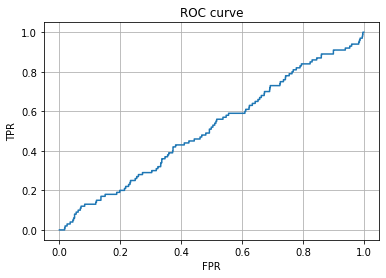

In [39]:
def plot(TPR, FPR):
    '''this function plot the ROC curve'''
    plt.plot(TPR,FPR)
    plt.title('ROC curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.grid(True)
    plt.show()

print(AUC)
plot(tpr,fpr)

In [57]:
import numpy as np
from tqdm import tqdm
import seaborn as sns
df_b=np.loadtxt('5_b.csv',delimiter=',', dtype=str)
df_b=df_b[1:,:].astype('float64')
df_b=df_b[np.argsort(df_b[:,1])][::-1]
print(df_b)#main Data

y_actual=df_b[:,0].copy()
y_proba=df_b[:,1].copy()
len(y_actual)

[[1.         0.59529418]
 [1.         0.5948084 ]
 [1.         0.59219787]
 ...
 [0.         0.10016508]
 [0.         0.1001608 ]
 [0.         0.10000141]]


10100

In [58]:
y_proba[y_proba>0.5]=1
y_proba[y_proba==0.5]=1
y_proba[y_proba<0.5]=0

In [63]:
def confusion_matrix(y_actual,y_predicted):
    '''This function returns the confusion matrix
    '''
    TP=0
    FP=0
    TN=0
    FN=0
    for x in range(len(y_actual)):
        if y_actual[x]==1:
            if y_predicted[x]==1:
                TP+=1
            else:
                FN+=1
        if y_actual[x]==0:
            if y_predicted[x]==0:
                TN+=1
            else:
                FP+=1
    #print('TP={},FP={},TN={},FN={}'.format(TP,FP,TN,FN))
    return([TN,FN],[FP,TP])

X=confusion_matrix(y_actual,y_proba)
print(X)

([9761, 45], [239, 55])


In [60]:
def array(sorted_array,prob_index,actual_y_index ):#pcolumn_name is a string with the name of the column with probabilities
    '''numpy code
    '''
    tpr_array=[]
    fpr_array=[]
    proba=sorted_array[:,prob_index]
    for p in tqdm(proba):
        y_actual=sorted_array[:,actual_y_index]
        y_predicted=proba.copy()
        y_predicted[y_predicted>p]=1
        y_predicted[y_predicted==p]=1
        y_predicted[y_predicted<p]=0
        cm=confusion_matrix(y_actual,y_predicted)
        TN,FN=cm[0]
        FP,TP=cm[1]
        TPR=TP/((TP+FN))
        FPR=FP/((TN +FP))
        tpr_array.append(TPR)
        fpr_array.append(FPR)
    return(tpr_array,fpr_array)

sorted_df=df_b.copy()
tpr,fpr=array(sorted_df,1,0)
AUC=np.trapz(tpr,fpr)

100%|████████████████████████████████████████████████████████████████████████████| 10100/10100 [02:00<00:00, 83.60it/s]


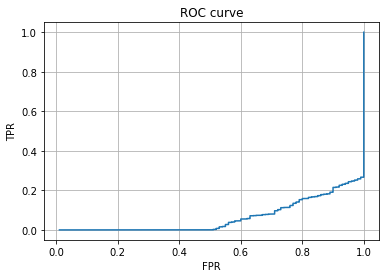

0.9377570000000001


In [61]:
import matplotlib.pyplot as plt
def plot(TPR, FPR):
    '''this function plot the ROC curve'''
    plt.plot(TPR,FPR)
    plt.title('ROC curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.grid(True)
    plt.show()

plot(tpr,fpr)
print(np.trapz(tpr,fpr))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [5]:
df_a=pd.read_csv('5_a.csv')


In [7]:

def all_TPR_FPR(df_original):
    '''this functions gives all the TPR and FPR'''
    TPR_list = []
    FPR_list = []

    df_sorted = df_original.sort_values(by=['proba'], ascending=False)

    unique_probability_values = df_sorted['proba'].unique()
    
    for value in tqdm(unique_probability_values):
        df_sorted['y_predicted'] = np.where(df_sorted['proba'] >= value, 1, 0)
        tpr_fpr_arr = individual_TPR_FPR(df_sorted)
        TPR_list.append(tpr_fpr_arr[0])
        FPR_list.append(tpr_fpr_arr[1])

    return TPR_list, FPR_list

def ROC_curve(TPR, FPR):
    '''this function plot the ROC curve'''
    plt.plot(TPR,FPR)
    plt.title('ROC curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.grid(True)
    plt.show()


TPR_a, FPR_a = all_TPR_FPR(df_a)
ROC_curve(TPR_a, FPR_a)
AUC_a = np.trapz(TPR_a, FPR_a)
print('The ROC-AUC Score for 5_a.csv: ',round(AUC_a,6))

  0%|                                                                                        | 0/10100 [00:00<?, ?it/s]


NameError: name 'individual_TPR_FPR' is not defined